# 手撕MLP（待背诵）

MLP 是 Multi-Layer Perceptron 的缩写，中文翻译为 多层感知机。

您可以将其理解为最基础、最经典的一种全连接神经网络（Fully Connected Neural Network）。

核心结构：
一个 MLP 通常由以下几个部分堆叠而成：

输入层（Input Layer）: 接收原始数据。
一个或多个隐藏层（Hidden Layers）:
每个隐藏层都由一个**线性变换（Linear Transformation）和一个非线性激活函数（Non-linear Activation Function）**组成。
线性变换：就是一个普通的矩阵乘法加上一个偏置（y = Wx + b），在 PyTorch 中由 nn.Linear 层实现。它负责对数据进行加权组合和维度变换。
非线性激活函数：如 ReLU, Sigmoid, Tanh, GELU 等。这是神经网络能够学习复杂、非线性关系的关键。如果没有激活函数，多层线性变换叠加起来本质上还是一次线性变换，网络就失去了深度学习的能力。
输出层（Output Layer）:
通常也是一个线性变换。
它后面可能会跟一个特定的激活函数，以匹配任务的需求（例如，对于分类任务，可能会使用 Softmax 来输出概率）。
简单来说，MLP 就是一系列 线性层 -> 激活函数 -> 线性层 -> 激活函数 ... 这样交替堆叠的结构。您在注意力机制代码中使用的 o_proj = nn.Linear(...) 本质上就是一个单层的 MLP。

## pytorch实现mlp

这个 MLP 的结构是：

输入维度: input_size
隐藏层: Linear(input_size -> hidden_size) -> ReLU
输出层: Linear(hidden_size -> output_size)
1. PyTorch 实现 (继承 nn.Module)
这种方式利用了 PyTorch 的自动求导和优化器，是实际应用中的标准做法。

In [ ]:
import torch
import torch.nn as nn

# 严格遵循您的代码风格
class MLP0924(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super().__init__()

        # step1 定义第一个线性层和激活函数
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        
        # step2 定义第二个线性层 (输出层)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # x shape: (batch_size, input_size)

        # step1 通过第一个线性层
        x = self.fc1(x)
        # step2 应用非线性激活函数
        x = self.relu(x)
        # step3 通过输出层得到最终结果
        output = self.fc2(x)

        return output

# ----------------- 测试 PyTorch MLP -----------------
# 定义超参数
batch_size, input_size, hidden_size, output_size = 4, 10, 32, 5

# 创建一个随机输入张量
x = torch.rand(batch_size, input_size)

# 实例化模型
mlp_pytorch = MLP0924(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
mlp_pytorch.eval() # 切换到评估模式

# 前向传播
output_pytorch = mlp_pytorch(x)

print("--- PyTorch MLP 测试 ---")
print(f"输入形状: {x.shape}")
print(f"输出形状: {output_pytorch.shape}\n")
print(f"PyTorch MLP 输出:\n{output_pytorch}\n")

 ## NumPy 实现mlp (手动实现所有计算和参数)
 这种方式能帮助我们更深刻地理解神经网络的底层数学原理，包括前向传播、权重初始化等。这里我们只实现前向传播部分。

In [ ]:
import numpy as np

# 严格遵循您的代码风格
class NumpyMLP0924:
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        
        # step1 初始化第一层的权重和偏置
        # 使用 Xavier/Glorot 初始化，这是一个很好的实践
        limit1 = np.sqrt(6 / (input_size + hidden_size))
        self.W1 = np.random.uniform(-limit1, limit1, (input_size, hidden_size))
        self.b1 = np.zeros((1, hidden_size)) # 偏置初始化为0

        # step2 初始化第二层的权重和偏置
        limit2 = np.sqrt(6 / (hidden_size + output_size))
        self.W2 = np.random.uniform(-limit2, limit2, (hidden_size, output_size))
        self.b2 = np.zeros((1, output_size))

    def relu(self, x: np.ndarray) -> np.ndarray:
        # ReLU 激活函数的 NumPy 实现
        return np.maximum(0, x)

    def forward(self, x: np.ndarray) -> np.ndarray:
        # x shape: (batch_size, input_size)

        # step1 通过第一个线性层 (矩阵乘法 + 偏置)
        # x @ W1 结果是 (batch_size, hidden_size)
        hidden_input = x @ self.W1 + self.b1
        
        # step2 应用非线性激活函数
        hidden_output = self.relu(hidden_input)

        # step3 通过输出层得到最终结果
        # hidden_output @ W2 结果是 (batch_size, output_size)
        output = hidden_output @ self.W2 + self.b2
        
        return output

# ----------------- 测试 NumPy MLP -----------------
# 使用与 PyTorch 相同的超参数
# batch_size, input_size, hidden_size, output_size = 4, 10, 32, 5

# 创建一个随机输入数组
# 注意：PyTorch 的 rand 是 0-1 均匀分布，NumPy 的 rand 也是
x_np = np.random.rand(batch_size, input_size)

# 实例化模型
mlp_numpy = NumpyMLP0924(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# 前向传播
output_numpy = mlp_numpy.forward(x_np)

print("--- NumPy MLP 测试 ---")
print(f"输入形状: {x_np.shape}")
print(f"输出形状: {output_numpy.shape}\n")
print(f"NumPy MLP 输出:\n{output_numpy}\n")

# 注意力及原理

### 第一重境界 简化版本

In [ ]:
### 第一重境界 简化版本
import math
import torch
import torch.nn as nn

class SelfAttentionV1_zwx(nn.Module):
    def __init__(self, hidden_size: int = 384) -> None:
        super().__init__()
        self.hidden_size = hidden_size

        self.query_proj = nn.Linear(hidden_size, hidden_size)
        self.key_proj = nn.Linear(hidden_size, hidden_size)
        self.value_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X):
        # X shape is batch_size, seq_len, hidden_size

        # 计算 Q, K, V shape (batch_size, seq_len, hidden_size)
        Q = self.query_proj(X)
        K = self.key_proj(X)
        V = self.value_proj(X)

        # 计算注意力分数
        attention_scores = torch.matmul(Q, K.transpose(-1,-2))
        # 为什么要开根号 为了防止两个张量值太大 过softmax 太大值会让softmaxt退化成argmax 其他位置无限接近0 引入梯度消失
        attention_scores = attention_scores / math.sqrt(self.hidden_size)

        # 计算注意力权重 softmax
        attention_weights = torch.softmax(attention_scores, dim=-1)
        print(f"attention_weights: {attention_weights}")

        # 计算输出
        output = torch.matmul(attention_weights, V)
        return output

X = torch.rand(2, 3, 4)
att = SelfAttentionV1_zwx(hidden_size=4)
output = att.forward(X)
### 第一重境界 简化版本

attention_weights: tensor([[[0.3057, 0.2994, 0.3949],
         [0.3264, 0.3046, 0.3690],
         [0.3047, 0.3053, 0.3900]],

        [[0.3115, 0.2893, 0.3992],
         [0.3230, 0.3042, 0.3728],
         [0.3155, 0.3048, 0.3797]]], grad_fn=<SoftmaxBackward0>)


## 第二重：效率优化

In [ ]:
### 第二重：效率优化 在模型较小情况起一定加速效果
import math
import torch
import torch.nn as nn

class SelfAttentionV2_zwx(nn.Module):
    def __init__(self, hidden_size: int = 384) -> None:
        super().__init__()

        self.hidden_size = hidden_size
        # 使用一个线性层来同时计算 Q, K, V
        self.proj = nn.Linear(hidden_size, hidden_size * 3)
    
    def forward(self, X):
        # X shape is (batch_size, seq_len, hidden_size)

        # X * proj shape is (batch_size, seq_len, hidden_size * 3)
        QKV = self.proj(X)  # (batch_size, seq_len, hidden_size * 3)
        # split成Q, K, V
        Q, K, V = torch.split(QKV, self.hidden_size, dim=-1)


        # 计算注意力分数. i行j列 表示第i个query对第j个key的注意力分数
        attention_scores = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.hidden_size)
        # 计算注意力权重 softmax
        attention_weights = torch.softmax(attention_scores, dim=-1)
        print(f"attention_weights: {attention_weights}")
        # 计算输出
        # output = torch.matmul(attention_weights, V)
        output = attention_weights @ V  # 使用@运算符代替torch.matmul,  @运算符在PyTorch中是矩阵乘法的简写
        # @运算符在PyTorch中是矩阵乘法的简写
        return output

X = torch.rand(2, 3, 4)
att = SelfAttentionV2_zwx(hidden_size=4)
output = att.forward(X)
print(f"output: {output}")


attention_weights: tensor([[[0.3630, 0.3182, 0.3188],
         [0.3577, 0.3166, 0.3258],
         [0.3443, 0.3257, 0.3299]],

        [[0.3535, 0.3525, 0.2940],
         [0.3415, 0.3375, 0.3210],
         [0.3468, 0.3487, 0.3045]]], grad_fn=<SoftmaxBackward0>)
output: tensor([[[ 0.5711, -0.2580,  0.1322, -0.5423],
         [ 0.5695, -0.2575,  0.1294, -0.5420],
         [ 0.5666, -0.2572,  0.1255, -0.5438]],

        [[ 0.6525, -0.2908,  0.3068, -0.3388],
         [ 0.6523, -0.2973,  0.3047, -0.3280],
         [ 0.6521, -0.2928,  0.3050, -0.3350]]], grad_fn=<UnsafeViewBackward0>)


## 第三重：加入一些细节

### 1 dropout 位置 加在哪里合适？ 阅读源码后发现
### 2 attention_mask 对<pad>位置的处理
### 3 multi-head attention有个output projection 跟面试官确认是否要写output矩阵映射（可选）

In [ ]:
#1 dropout 位置 加在哪里合适？ 阅读源码后发现在乘V之前做dropout,而不是在乘V之后做dropout
#2 attention_mask 对<pad>位置的处理
#3 multi-head attention有个output projection 跟面试官确认是否要写output矩阵映射（可选）

class SelfAttentionV3(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.hidden_size = hidden_size

        self.proj = nn.Linear(hidden_size, hidden_size * 3)
        self.attention_dropout = nn.Dropout(dropout_rate)  # 添加dropout

        # 可选
        self.output_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, attention_mask=None):
        # X shape is (batch_size, seq_len, hidden_size)

        QKV = self.proj(X)  # (batch_size, seq_len, hidden_size * 3)
        Q, K , V = torch.split(QKV, self.hidden_size, dim=-1)

        # 计算注意力分数  shape is （batch_size, seq_len, seq_len）
        attention_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.hidden_size)
        # attention_scores shape is (batch_size, seq_len, seq_len) 与attention_scores 一致
        if attention_mask is not None:
            # 假设 attention_mask shape is (batch_size, seq_len, seq_len)
            attention_scores = attention_scores.masked_fill(
                attention_mask == 0, # 这个条件为true时，补充为 float('-inf')
                # float('-inf')  # 将<pad>位置的分数设为负无穷
                float("-1e20")
            )
        # 计算注意力权重softmax  shape is （batch_size, seq_len, seq_len）
        attention_weights = torch.softmax(attention_scores, dim=-1)
        print(f"attention_weights: {attention_weights}")
        
        # 之前理解是在attention_weights乘V之后再做dropout
        # 但源码是在attention_weights上做dropout
        attention_weights = self.attention_dropout(attention_weights)
        print(f"after dropout attention_weights: {attention_weights}")

        # 计算输出 attention_result is （batch_size, seq_len, hidden_size）
        attention_result = attention_weights @ V  # 使用@运算符代替torch.matmul

        # 可选 用output_proj矩阵做映射. （batch_size, seq_len, hidden_size） * (hidden_size, hidden_size) -> (batch_size, seq_len, hidden_size)
        output = self.output_proj(attention_result)
        return output

# x shape is (batch_size 2 , seq_len 3, hidden_size 4)
X = torch.rand(2, 3, 4)

# mask now shape is batch_size 2 , seq_len 3 ,  mask shape 需要attention_weights保持一致  need shape is (batch_size 2 , seq_len 3, seq_len 3)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
])
print(f"mask: {mask.shape}")

# mask = mask.unsqueeze(2).expand(-1, -1, mask.size(1))
mask = mask.unsqueeze(1).repeat(1, mask.size(1), 1)
print(f"mask unsqueeze: {mask.shape}")

att = SelfAttentionV3(hidden_size=4, dropout_rate=0.1)
output = att.forward(X, attention_mask=mask)
print(f"output: {output}")

mask: torch.Size([2, 3])
mask unsqueeze: torch.Size([2, 3, 3])
attention_weights: tensor([[[1.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000],
         [1.0000, 0.0000, 0.0000]],

        [[0.5023, 0.4977, 0.0000],
         [0.5027, 0.4973, 0.0000],
         [0.5046, 0.4954, 0.0000]]], grad_fn=<SoftmaxBackward0>)
after dropout attention_weights: tensor([[[1.1111, 0.0000, 0.0000],
         [1.1111, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000]],

        [[0.5581, 0.5530, 0.0000],
         [0.5585, 0.5526, 0.0000],
         [0.5607, 0.5504, 0.0000]]], grad_fn=<MulBackward0>)
output: tensor([[[ 0.3345, -0.3791, -0.5506, -0.6473],
         [ 0.3345, -0.3791, -0.5506, -0.6473],
         [ 0.0415, -0.3756, -0.3563, -0.4812]],

        [[ 0.1615, -0.3538, -0.4132, -0.4711],
         [ 0.1615, -0.3538, -0.4132, -0.4711],
         [ 0.1614, -0.3538, -0.4131, -0.4711]]], grad_fn=<ViewBackward0>)


In [ ]:
# 加入dropout 和 mask
import math
import torch
import torch.nn as nn

class SelfAttentionV3_zwx_1(nn.Module):
    def __init__(self,hidden_size: int = 384, dropout_rate: float = 0.1):
        super().__init__()
        self.hidden_size = hidden_size
        self.dropout = nn.Dropout(dropout_rate)
        self.proj = nn.Linear(hidden_size, hidden_size * 3)

        # 可选的输出映射
        self.output_proj = nn.Linear(hidden_size, hidden_size)
    
    # X shape is (bsize, seq_len, hidden_size)
    def forward(self, X, attention_mask=None):
        # 计算 Q, K, V
        QKV = self.proj(X)
        # (bsize, seq_len, hidden_size)
        Q, K, V = torch.split(QKV, self.hidden_size, dim=-1)

        # 计算注意力分数
        # (bsize, seq_len, seq_len)
        attention_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.hidden_size)

        # 处理attention_mask  (bsize, seq_len, seq_len) 与 attention_scores 一致
        if attention_mask:
            attention_scores = attention_scores.masked_fill(attention_mask == 0, float("-1e20"))
        
        # 计算注意力权重
        # (bsize, seq_len, seq_len)
        attention_weights = torch.softmax(attention_scores, dim=-1)

        # 添加dropout
        attention_weights = self.dropout(attention_weights)

        # 计算att输出 (bsize, seq_len, seq_len) * (bsize, seq_len, hidden_size) -> (bsize, seq_len, hidden_size)
        att_output = attention_weights @ V

        # 可选的输出映射
        output = self.output_proj(att_output)
        return output
        
X = torch.rand(2, 3, 4)
# (2,3)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
])
print(f"mask: {mask.shape}")
# (2, 1, 3) -> (2, 3, 3) 按行扩展
# mask1 = mask.unsqueeze(dim=1).repeat(1, mask.size(1), 1)
# print(f"mask1: {mask1}")
# print(f"mask1 shape: {mask1.shape}")

# mask2 = mask.unsqueeze(dim=1).repeat(1, 1, mask.size(1))
# print(f"mask2: {mask2}")
# print(f"mask2 shape: {mask2.shape}")

# mask3 = mask.unsqueeze(dim=-1).repeat(1, mask.size(1), 1)
# print(f"mask3: {mask3}")
# print(f"mask3 shape: {mask3.shape}")

mask4 = mask.unsqueeze(dim=-1)
print(f"mask4 unsqueeze : {mask4}")
print(f"mask4 shape: {mask4.shape}")
# mask4 = mask4.repeat(1, 1, mask.size(1))
mask4 = mask4.repeat(1, mask.size(1), 1)
print(f"mask4: {mask4}")
print(f"mask4 shape: {mask4.shape}")

# mask2 shape is (2, 3, 3) 需要跟attention_weights保持一致
# print(f"mask unsqueeze: {mask.shape}")


mask: torch.Size([2, 3])
mask4 unsqueeze : tensor([[[1],
         [1],
         [1]],

        [[1],
         [1],
         [0]]])
mask4 shape: torch.Size([2, 3, 1])
mask4: tensor([[[1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [1],
         [1],
         [0]]])
mask4 shape: torch.Size([2, 9, 1])


### 第四重 self-attention最终版 集成所有改进

In [ ]:
import math
import torch
import torch.nn as nn

class SelfAttentionV3_zwx_2(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1) -> None:
        super().__init__()
        self.hidden_size = hidden_size

        # 优化1 用一个线性层来同时计算 Q, K, V
        self.proj = nn.Linear(hidden_size, hidden_size * 3)
        # 最初版本
        # self.query_proj = nn.Linear(hidden_size, hidden_size)
        # self.key_proj = nn.Linear(hidden_size, hidden_size)
        # self.value_proj = nn.Linear(hidden_size, hidden_size)

        # 优化2 引入dropout层
        self.dropout = nn.Dropout(dropout_rate)

        # 优化3 引入掩码mask mask shape 必须与attention_scores一致 (batch_size, seq_len, seq_len)
        self.mask = mask

        # 优化4 可选的输出映射
        self.output_proj = nn.Linear(hidden_size, hidden_size)


    
    def forward(self, X, mask=None):
        # X shape is batch_size seq_len hidden_size

        # 优化1 用一个线性层来同时计算 Q, K, V
        # QKV shape is (batch_size, seq_len, hidden_size * 3)
        QKV = self.proj(X) 
        # split成Q, K, V
        Q, K, V = torch.split(QKV, self.hidden_size, dim=-1)

        """ 最初版本
        # # 计算 Q, K, V shape (batch_size, seq_len, hidden_size)
        # Q = self.query_proj(X)
        # K = self.key_proj(X)
        # V = self.value_proj(X)
        """

        # 计算注意力分数
        # attention_scores = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.hidden_size）
        # attention_scores shape is (batch_size, seq_len, seq_len)
        attention_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.hidden_size)
        print(f"attention_scores: {attention_scores}")

        # 优化3 引入掩码mask
        if self.mask is not None:
            attention_scores = attention_scores.masked_fill(
                self.mask == 0,  # 将mask为0的位置设为负无穷
                float("-1e20")
            )
        print(f"attention_scores masked: {attention_scores}")

        # 计算注意力权重 softmax
        attention_weights = torch.softmax(attention_scores, dim=-1)
        print(f"attention_weights: {attention_weights}")

        # 优化2 引入dropout层 在注意力权重上应用dropout
        attention_weights = self.dropout(attention_weights)
        

        # 计算输出
        # output = torch.matmul(attention_weights, V)
        # output shape is (batch_size, seq_len, hidden_size)
        output = attention_weights @ V  # 使用@运算符代替torch.matmul

        # 优化4 可选的输出映射
        if self.output_proj is not None:
            output = self.output_proj(output)

        return output
X = torch.rand(2, 3, 4)
# mask shape is (batch_size, seq_len, seq_len) 需要与attention_weights保持一致
# 随机生成一个（2，3，3）的mask矩阵 [0, 2)之间的整数 即0或1
# mask = torch.randint(0, 2, (2, 3, 3))

## 手动构造一个mask矩阵（比较麻烦不建议）
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
])
# print(f"mask start: {mask}")
# print(f"mask shape: {mask.shape}")
# #(2, 1, 3) -> (2, 3, 3) 按行扩展
mask = mask.unsqueeze(dim=1).repeat(1, 3, 1)
# print(f"mask after : {mask}")
# print(f"mask shape: {mask.shape}")

att = SelfAttentionV3_zwx_2(hidden_size=4,dropout_rate=0.1)
output = att.forward(X, mask=mask)
# print(f"output: {output}")


attention_scores: tensor([[[-0.0942, -0.1686, -0.2448],
         [ 0.1006,  0.1596,  0.1429],
         [-0.0094, -0.0296, -0.0919]],

        [[-0.1837, -0.1607, -0.1843],
         [ 0.0281,  0.0717,  0.0330],
         [-0.2005, -0.1771, -0.2015]]], grad_fn=<DivBackward0>)
attention_scores masked: tensor([[[-9.4217e-02, -1.6865e-01, -2.4485e-01],
         [ 1.0062e-01,  1.5962e-01,  1.4289e-01],
         [-9.4237e-03, -2.9558e-02, -9.1932e-02]],

        [[-1.8373e-01, -1.6073e-01, -1.0000e+20],
         [ 2.8130e-02,  7.1696e-02, -1.0000e+20],
         [-2.0050e-01, -1.7709e-01, -1.0000e+20]]],
       grad_fn=<MaskedFillBackward0>)
attention_weights: tensor([[[0.3586, 0.3329, 0.3085],
         [0.3222, 0.3418, 0.3361],
         [0.3447, 0.3379, 0.3174]],

        [[0.4942, 0.5058, 0.0000],
         [0.4891, 0.5109, 0.0000],
         [0.4941, 0.5059, 0.0000]]], grad_fn=<SoftmaxBackward0>)


In [ ]:
# 0810重写
import math
import torch
import torch.nn as nn


class SelfAttentionV4(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1) -> None:
        super().__init__()

        self.hidden_size = hidden_size

        # 优化2 引入dropout层
        self.dropout = nn.Dropout(dropout_rate)

        #优化1 使用三个线性层来分别计算 Q, K, V
        self.proj = nn.Linear(hidden_size, hidden_size * 3)
        # self.query_proj = nn.Linear(hidden_size, hidden_size)
        # self.key_proj = nn.Linear(hidden_size, hidden_size)
        # self.value_proj = nn.Linear(hidden_size, hidden_size)

        # 优化4 可选的输出映射
        self.output_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, mask=None):
        # X (batch_size, seq_len, hidden_size)

        #优化1 使用三个线性层来分别计算 Q, K, V
        QKV = self.proj(X)
        Q,K,V = torch.split(QKV, self.hidden_size, dim=-1)

        # 计算 Q, K, V shape (batch_size, seq_len, hidden_size)
        # Q = self.query_proj(X)
        # K = self.key_proj(X)
        # V = self.value_proj(X)

        # 计算注意力分数
        # attention_scores = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.hidden_size)
        attention_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.hidden_size)

        # 优化3 引入掩码mask
        # mask shape attention_scores shape相同
        if mask is not None:
            attention_scores = attention_scores.masked_fill(
                mask == 0,  # 将mask为0的位置设为负无穷
                float("-1e20")
            )

        # 计算注意力权重
        attention_weights = torch.softmax(attention_scores, dim=-1)
        print(f"attention_weights: {attention_weights}")

        # 优化2 引入dropout层 在注意力权重上应用dropout
        attention_weights = self.dropout(attention_weights)

        # 计算输出
        # output = torch.matmul(attention_weights, V)
        output = attention_weights @ V
        print(f"output before output_proj: {output}")

        # 优化4 可选的输出映射
        if self.output_proj is not None:
            output = self.output_proj(output)
        print(f"output after output_proj: {output}")
        return output

X = torch.rand(2, 3, 4)
# 优化3 引入掩码mask
# mask = torch.randint(0, 2, (2, 3, 3))
# print(f"mask shape: {mask.shape}")
# print(f"mask: {mask}")

# (2, 3) -> (2, 1, 3) -> (2, 3, 3)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
])
mask = mask.unsqueeze(dim=1).repeat(1, 3, 1)
print(f"mask shape: {mask.shape}")
print(f"mask: {mask}")

att = SelfAttentionV4(hidden_size=4)
output = att.forward(X, mask=mask)
print(f"output: {output}")

mask shape: torch.Size([2, 3, 3])
mask: tensor([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 0],
         [1, 1, 0],
         [1, 1, 0]]])
attention_weights: tensor([[[0.3622, 0.3077, 0.3301],
         [0.3607, 0.3093, 0.3301],
         [0.3603, 0.3103, 0.3294]],

        [[0.5053, 0.4947, 0.0000],
         [0.5079, 0.4921, 0.0000],
         [0.5101, 0.4899, 0.0000]]], grad_fn=<SoftmaxBackward0>)
output before output_proj: tensor([[[-0.9632,  0.9878,  0.3867,  0.4941],
         [-0.7470,  0.7589,  0.3244,  0.4223],
         [-0.5269,  0.5798,  0.1742,  0.2240]],

        [[-0.7480,  0.7963,  0.3518,  0.4355],
         [-0.7485,  0.7960,  0.3523,  0.4360],
         [-0.3194,  0.4193,  0.1218,  0.1627]]], grad_fn=<UnsafeViewBackward0>)
output after output_proj: tensor([[[ 0.4574, -0.5878, -0.2454, -0.6424],
         [ 0.3723, -0.5593, -0.2273, -0.6098],
         [ 0.2732, -0.5003, -0.0907, -0.5798]],

        [[ 0.3783, -0.5607, -0.2290, -0.6149],
         [ 0.37

## 多头注意力机制 (Multi-Head Attention)

### 原理介绍

多头注意力机制是Transformer架构的核心组件，它通过以下步骤工作：

1. **线性变换**: 将输入通过三个线性层分别得到Query(Q)、Key(K)、Value(V)
2. **多头分割**: 将Q、K、V分割成多个头，每个头的维度为 d_k = d_model / num_heads
3. **缩放点积注意力**: 对每个头计算 Attention(Q,K,V) = softmax(QK^T/√d_k)V
4. **连接**: 将所有头的输出连接起来
5. **线性变换**: 通过最终的线性层得到输出

### 数学公式

- **缩放点积注意力**: Attention(Q,K,V) = softmax(QK^T/√d_k)V
- **多头注意力**: MultiHead(Q,K,V) = Concat(head_1, ..., head_h)W^O
- **其中**: head_i = Attention(QW_i^Q, KW_i^K, VW_i^V)

### 代码实现

In [ ]:
import math
import torch
import torch.nn as nn

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, head_nums: int = 2, dropout_rate: float = 0.1) -> None:
        super().__init__()

        self.hidden_size = hidden_size
        self.head_nums = head_nums
        # 每个头的大小（纬度） 此时hidden_size必须能被head_nums整除 且 hidden_size = head_nums * head_size
        self.head_size = hidden_size // head_nums 

        self.dropout = nn.Dropout(dropout_rate)

        # shape is (hidden_size, hidden_size) 等于 (hidden_size, head_nums * head_size)
        self.query_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        self.key_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        self.value_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        self.output_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)  # 可选的输出映射

        

    def forward(self, X, mask=None):
        # x shape is b, s, h
        batch_size, seq_len, _ = X.shape
        # 计算 Q, K, V shape is (batch_size, seq_len, head_nums * head_size)
        Q = self.query_proj(X)
        K = self.key_proj(X)    
        V = self.value_proj(X)

        # Q, K, V shape is (batch_size, seq_len, head_nums * head_size) split成多个头.  
        # (batch_size, seq_len, head_nums * head_size) -> (batch_size, seq_len, head_nums, head_size) -> (batch_size, head_nums, seq_len, head_size)
        Q = Q.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1, 2)  
        K = K.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1, 2)
        # Q, K, V shape is (batch_size, head_nums, seq_len, head_size)

        # 计算注意力分数 attention_scores shape is  (batch_size, head_nums, seq_len, seq_len)
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)

        # 优化 引入mask shape is (batch_size, head_nums, seq_len, seq_len)
        if mask is not None:
            att_scores = att_scores.masked_fill(mask == 0, float("-1e20"))
        
        # 计算注意力权重
        att_weights = torch.softmax(att_scores, dim=-1)

        # 优化 引入dropout层 随机丢弃一些注意力权重
        att_weights = self.dropout(att_weights)
        print(f"att_weights: {att_weights}")

        output = att_weights @ V  # (batch_size, head_nums, seq_len, head_size)
        print(f"output before output_proj: {output}")
    

        # 计算输出  (batch_size, head_nums, seq_len, head_size) -> (b, s, h)
        # att_weights = att_weights.transpose(1, 2).contiguous().view(batch_size, seq_len, self.head_nums * self.head_size)
        
        # .view() 是一个非常高效的操作，它也不移动数据，只是创建一个指向相同数据的新“视图”，但具有不同的形状。
        # .view() 改变形状的逻辑，是建立在“数据在内存里就是一整块”这个假设之上的。它只需要根据新的形状，重新计算一套步长信息，就能正确地索引到内存中的数据。
        #如果数据本身在内存中就是“跳跃”存储的（像 transpose 之后那样），那么 .view() 的简单步长计算逻辑就会完全失效，它无法正确地将非连续的内存块映射到一个新的形状上。
        # 这里需要使用 contiguous 来确保数据在内存中是连续的
        # 检查张量在内存中是否已经是连续的。如果是，它就什么都不做，直接返回原张量。如果不是，它会开辟一块新的内存空间，将非连续的数据按照连续的方式复制到这块新内存中，然后返回这个新的、连续的张量。
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) # -1表示自动计算维度

        # 过output_proj矩阵映射 shape is (batch_size, head_nums, hidden_size)
        output = self.output_proj(output)

        return output

X = torch.rand(2, 3, 4)  # 假设输入是一个batch_size为2，序列长度为3，隐藏层大小为4的张量

# mask shape is (batch_size, seq_len, seq_len) 需要与attention_weights保持一致

# (2, 3) -> (2, 1, 1, 3) -> (2, 2, 3, 3)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
])
mask = mask.view(2, 1, 1, 3).expand(2, 2, 3, 3)
print(f"mask shape: {mask.shape}")
print(f"mask: {mask}")

att = MultiHeadSelfAttention(hidden_size=4, head_nums=2)
output = att.forward(X, mask=mask)
print(f"output: {output}")


mask shape: torch.Size([2, 2, 3, 3])
mask: tensor([[[[1, 1, 1],
          [1, 1, 1],
          [1, 1, 1]],

         [[1, 1, 1],
          [1, 1, 1],
          [1, 1, 1]]],


        [[[1, 1, 0],
          [1, 1, 0],
          [1, 1, 0]],

         [[1, 1, 0],
          [1, 1, 0],
          [1, 1, 0]]]])
att_weights: tensor([[[[0.3691, 0.3703, 0.3717],
          [0.3728, 0.3701, 0.0000],
          [0.0000, 0.3649, 0.3716]],

         [[0.3614, 0.3794, 0.3703],
          [0.3621, 0.0000, 0.0000],
          [0.3602, 0.3809, 0.3700]]],


        [[[0.5477, 0.5634, 0.0000],
          [0.5490, 0.5622, 0.0000],
          [0.5625, 0.0000, 0.0000]],

         [[0.5664, 0.0000, 0.0000],
          [0.5650, 0.5461, 0.0000],
          [0.5563, 0.5548, 0.0000]]]], grad_fn=<MulBackward0>)
output before output_proj: tensor([[[[-0.0399,  0.6761],
          [-0.0263,  0.5071],
          [-0.0096,  0.4667]],

         [[-0.3840, -0.0913],
          [-0.1615, -0.0584],
          [-0.3839, -0.0911]]],


 

###  8.10 苏州人工智能有限公司面试

In [ ]:
# 8.10 苏州人工智能有限公司面试： 使用pytorch实现multi-head attention，不需要考虑mask。

import math
import torch
import torch.nn as nn

class Multi_head_self_attention_111(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate : float = 0.1,head_nums: int = 5) -> None:
        super().__init__()
        self.hidden_size = hidden_size
        self.head_nums = head_nums

        self.dropout = nn.Dropout(dropout_rate)

        self.head_size = hidden_size // head_nums

        self.query_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        self.key_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        self.value_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
       
        self.output_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)

    def forward(self, X):
        # x shape is b, s, h
        batch_size, seq_len, _ = X.size()

        # batch_size, seq_len , hidden_size
        Q = self.query_proj(X)
        K = self.key_proj(X)
        V = self.value_proj(X)

        # 需要转成 b head_nums, sel_len, head_size
        Q = Q.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1,2)
        K = Q.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1,2)
        V= Q.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1,2)

        # 计算注意力分数
        # b head_nums, seq_len, seq_len
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)

        att_weights = torch.softmax(att_scores,dim=-1)

        # 中间输出  # b head_nums, seq_len, seq_len * 
        output = att_weights @ V

        # 转格式 # batch_size, seq_len , seq_len # b head_nums, sel_len, head_size

        # b  seq_len,head_nums, head_size - > # batch_size, seq_len , hidden_size
        result = output.transpose(1,2).contiguous().view(batch_size,seq_len, -1)

        # output_proj
        result = self.output_proj(result)

        return result


### 8.20日 重写多头注意力机制(包含mask，dropout)

In [ ]:
# 8.20日 重写多头注意力机制
import math
import torch
import torch.nn as nn

class multi_head_att(nn.Module):
    def __init__(self, hidden_size: int = 384, head_nums: int = 2, dropout_rate : float = 0.1) -> None:
        # 注意super后面有()
        super().__init__()

        self.hidden_size = hidden_size
        self.head_nums = head_nums
        # 这里假设 可以整除
        self.head_size = hidden_size // head_nums

        # 优化3
        self.qkv_proj = nn.Linear(hidden_size, hidden_size * 3)
        # self.q_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        # self.k_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        # self.v_proj = nn.Linear(hidden_size, self.head_nums * self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

        self.dropout = nn.Dropout(dropout_rate)

    
    def forward(self, X, mask):
        # x shape is (bs, sq, hidden_size)
        batch_size, seq_len, _ = X.size()

        
        # 优化3 X(bs, sq, hidden_size) -> QKV(bs, sq, hidden_size * 3)
        QKV = self.qkv_proj(X)
        Q, K, V = QKV.chunk(3,dim=-1) # (bs, sq, hidden_size * 3) -> 3 * (bs, sq, hidden_size)
        # Q shape is (bs, sq, hidden_size)
        # Q = self.q_proj(X)
        # K = self.k_proj(X)
        # V = self.v_proj(X)

        # (bs, sq, hidden_size) -> (bs, head_nums, sq, head_size)
        Q = Q.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1, 2)

        # 计算注意力分数 (bs, head_nums, seq_len, seq_len)
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)

        # 优化2 mask
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20')
            )

        # 计算注意力权重
        att_weights = torch.softmax(att_scores, dim=-1)

        # 优化1 可引入dropout 随机丢弃一些权重防止过拟合
        att_weights = self.dropout(att_weights)

        # 中间输出 (bs, head_nums, seq_len, seq_len) * (bs, head_nums, seq_len, head_size) -> (bs, head_nums, seq_len, head_size)
        output = att_weights @ V

        # 计算优化 可以用pytorch2.0以上scaled_dot_product_attention方法直接来计算
        # 当前的代码，虽然逻辑清晰，但在GPU上执行时，会分解成多个独立的步骤（一次矩阵乘法、一次缩放、一次mask、一次softmax、一次dropout、又一次矩阵乘法）。
        # 每一步都需要从GPU的显存中读取数据，计算，再写回显存。这种频繁的读写（I/O）操作，尤其是在处理巨大的注意力分数矩阵 att_scores 时，会成为性能瓶颈。
        """
        为了解决这个问题，PyTorch 2.0 及以上版本引入了一个革命性的函数：torch.nn.functional.scaled_dot_product_attention。

        它的原理是什么？

        这个函数将缩放 (Scale) -> Mask -> Softmax -> Dropout -> V值加权 这整个注意力计算的核心链条，**融合（Fuse）**成了一个单一的、高度优化的CUDA算子。

        最重要的是，它的底层会自动调用当前最高效的实现，比如FlashAttention。

        FlashAttention的魔法：
        FlashAttention是一种“IO感知 (IO-aware)”的算法。它巧妙地将输入Q, K, V切分成小块（Tiling），在GPU的高速缓存（SRAM）中完成计算，从而避免了在显存（HBM）中
        显式地生成和读写那个巨大的 (batch_size, num_heads, seq_len, seq_len) 的注意力分数矩阵。

        这会带来什么好处？

        速度大幅提升：减少了大量的显存读写，计算速度得到极大提升，尤其是在序列长度（seq_len）很长时。
        显存占用大幅降低：因为不需要在内存中实例化完整的注意力分数矩阵，所以显存占用更少，允许你使用更长的序列或更大的批次。
        """
        # output = F.scaled_dot_product_attention(
        #     Q, K, V,
        #     attn_mask=mask, # 假设传入的mask已经是正确的布尔格式和形状
        #     dropout_p=self.dropout_rate if self.training else 0.0,
        # )

        # 需要把output处理成(bs, seq_len, hidden_size) 注意contiguous是contiguous()
        output = output.transpose(1,2).contiguous().view(batch_size,seq_len,-1)

        # 过o_proj
        output = self.o_proj(output)

        return output






### 9.11日 重写多头注意力机制(包含mask，dropout)

In [ ]:
import math
import torch
import torch.nn as nn

class multi_head_att_0910(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 4, dropout_rate: float = 0.1):
        super().__init__()
        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num # 假设能整除

        self.q_proj = nn.Linear(hidden_size, head_num * self.head_size)
        self.k_proj = nn.Linear(hidden_size, head_num * self.head_size)
        self.v_proj = nn.Linear(hidden_size, head_num * self.head_size)

        self.o_proj = nn.Linear(hidden_size, hidden_size)

        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, X, mask):
        # x shape is (batch_size, seq_len, hidden_size)
        batch_size, seq_len, _ = X.shape # 或者X.size()
        
        # 计算得到Q K V 三个矩阵， Q K V shape is (batch_size, seq_len, hidden_size)
        Q = self.q_proj(X)
        K = self.k_proj(X)
        V = self.v_proj(X)

        # Q K V变化形状(bs, sq, hidden_size) -> (bs, head_nums, sq, head_size)
        # (bs, sq, hidden_size) -> (bs, sq, head_nums, head_size) -> (bs, head_nums, sq, head_size)
        # Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)
        Q = Q.reshape(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)
        # K = K.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)
        K = K.reshape(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)
        # V = V.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)
        V = V.reshape(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)

        # 计算注意力分数 att_scores shape is (bs, head_nums, sq, sq)
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)

        # 优化1 引入mask
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20')
            )

        # 计算注意力权重 att_weights shape is (bs, head_nums, sq, sq)
        att_weights = torch.softmax(att_scores, dim=-1)

        # 优化2 引入dropout
        att_weights = self.dropout(att_weights)
        print(f"att_weights: {att_weights}")

        # 中间输出 output shape is (bs, head_nums, sq, head_size)
        output = att_weights @ V
        # output = torch.matmul(att_weights, V)
        
        # 把output转成与输入X一样的形状 (batch_size, seq_len, hidden_size)
        # output = output.transpose(1,2).contiguous().view(batch_size,seq_len,-1)
        output = output.transpose(1,2).reshape(batch_size,seq_len,-1)

        # 最后 用output_proj矩阵做映射
        output = self.o_proj(output)

        return output, att_weights

# 1. 定义超参数
batch_size = 2
seq_len = 3
hidden_size = 4
head_num = 2

# 2. 假设输入是一个batch_size==2, seq_len==3, hidden_size==4的张量
X = torch.rand(2, 3, 4)
print(f"输入 X 的形状: {X.shape}\n")

# 3. 创建正确的 Mask
# 原始的padding mask (batch_size, seq_len)
# 样本0: [1, 1, 1] -> 无padding
# 样本1: [1, 1, 0] -> 最后一个token是padding
padding_mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
], dtype=torch.float32)
# 将padding mask扩展到与注意力分数相同的形状 (batch_size, head_num, seq_len, seq_len)
# att_scores 维度	mask_for_attention 维度	比较结果	广播行为
# -1 (最后一个维度)	seq_len	seq_len	相等，匹配成功。
# -2	seq_len	1	1 vs seq_len，匹配成功。
# -3	head_num	1	1 vs head_num，匹配成功。
# -4 (第一个维度)	batch_size	batch_size	相等，匹配成功。
mask_for_attention = padding_mask.view(batch_size, 1, 1, seq_len)

print(f"用于注意力计算的 Mask 形状: {mask_for_attention.shape}")
print(f"Mask 内容:\n{mask_for_attention}\n")

# 4. 实例化并测试多头注意力机制
att = multi_head_att_0910(hidden_size=4, head_num=2)
att.eval() 
output, att_weights = att.forward(X, mask=mask_for_attention)
print(f"output: {output}")

输入 X 的形状: torch.Size([2, 3, 4])

用于注意力计算的 Mask 形状: torch.Size([2, 1, 1, 3])
Mask 内容:
tensor([[[[1., 1., 1.]]],


        [[[1., 1., 0.]]]])

att_weights: tensor([[[[0.3008, 0.3506, 0.3485],
          [0.3325, 0.3351, 0.3324],
          [0.3328, 0.3347, 0.3325]],

         [[0.3009, 0.3419, 0.3572],
          [0.3268, 0.3365, 0.3367],
          [0.3398, 0.3348, 0.3254]]],


        [[[0.4968, 0.5032, 0.0000],
          [0.4784, 0.5216, 0.0000],
          [0.4791, 0.5209, 0.0000]],

         [[0.4903, 0.5097, 0.0000],
          [0.4864, 0.5136, 0.0000],
          [0.4805, 0.5195, 0.0000]]]], grad_fn=<SoftmaxBackward0>)
output: tensor([[[ 0.3571, -0.1720,  0.6537, -0.0488],
         [ 0.3611, -0.1653,  0.6605, -0.0518],
         [ 0.3645, -0.1648,  0.6594, -0.0545]],

        [[ 0.3675, -0.1495,  0.6818, -0.0676],
         [ 0.3681, -0.1490,  0.6810, -0.0638],
         [ 0.3673, -0.1489,  0.6814, -0.0616]]], grad_fn=<ViewBackward0>)


### 9.11日 多头注意力机制scaled_dot_product_attention版本

In [ ]:
### 优化版

import math
import torch
import torch.nn as nn
from torch.nn import functional as F

class MultiHeadAttentionOptimized(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()
        
        # 增加一个断言，使代码更健壮
        assert hidden_size % head_num == 0, "hidden_size must be divisible by head_num"

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num

        # 优化1：合并Q, K, V投影
        self.qkv_proj = nn.Linear(hidden_size, hidden_size * 3)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

        # 优化2：不再需要 nn.Dropout 层，只需保存概率值
        self.dropout_rate = dropout_rate
    
    def forward(self, X: torch.Tensor, mask: torch.Tensor = None) -> torch.Tensor:
        # X shape: (batch_size, seq_len, hidden_size)
        # 错误1修正：.shape 是属性，不是方法
        batch_size, seq_len, _ = X.shape
        
        # (bs, sq, hidden_size) -> (bs, sq, hidden_size * 3)
        qkv = self.qkv_proj(X)
        # (bs, sq, hidden_size * 3) -> 3 * (bs, sq, hidden_size)
        Q, K, V = qkv.chunk(3, dim=-1)

        # (bs, sq, hidden_size) -> (bs, head_num, sq, head_size)
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)

        # 优化2：使用PyTorch 2.0的高效融合算子
        # 它一步完成了 缩放、mask、softmax、dropout、与V相乘
        # 注意：mask需要是布尔类型，且形状需要能被广播
        output = F.scaled_dot_product_attention(
            Q, K, V,
            attn_mask=mask,
            dropout_p=self.dropout_rate if self.training else 0.0, # dropout只在训练时生效
        )
        
        # output shape: (bs, head_num, sq, head_size)
        # 恢复形状: (bs, sq, hidden_size)
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, self.hidden_size)

        # 最终的线性投影
        output = self.o_proj(output)

        return output

# 1. 定义超参数
batch_size = 2
seq_len = 3
hidden_size = 4
head_num = 2
dropout_rate = 0.1

# 2. 定义输入张量
x = torch.rand(batch_size, seq_len, hidden_size)
print(f"输入 x 的形状: {x.shape}\n")
print(f"输入 x 的内容:\n{x}\n")

# 3. 定义mask (batch_size, seq_len) 并将shape拓展至 (batch_size, 1, 1,seq_len) 能与att_weight进行广播 （batch_size, head_num, seq_len, seq_len)
padding_mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0],
], dtype=torch.float32)
padding_mask = padding_mask.view(batch_size, 1, 1,seq_len)

# 4. 定义MHA
mha = MultiHeadAttentionOptimized(hidden_size=hidden_size,head_num=head_num, dropout_rate=dropout_rate)
mha.eval() # 添加.eval()以在测试时禁用dropout
output = mha.forward(X=x, mask=padding_mask)
print(f"output is {output}\n")


输入 x 的形状: torch.Size([2, 3, 4])

输入 x 的内容:
tensor([[[0.8676, 0.4367, 0.6648, 0.0612],
         [0.2303, 0.6124, 0.0042, 0.3901],
         [0.1437, 0.8854, 0.7475, 0.3092]],

        [[0.9614, 0.1250, 0.6275, 0.0188],
         [0.4292, 0.5965, 0.4241, 0.4473],
         [0.8948, 0.7837, 0.5100, 0.2543]]])

output is tensor([[[ 0.2538,  0.4569, -0.0370, -0.2080],
         [ 0.2551,  0.4577, -0.0394, -0.2072],
         [ 0.2554,  0.4574, -0.0388, -0.2076]],

        [[ 0.2980,  0.4221, -0.0064, -0.2151],
         [ 0.2983,  0.4230, -0.0077, -0.2142],
         [ 0.2983,  0.4226, -0.0070, -0.2147]]], grad_fn=<ViewBackward0>)



## 多查询注意力 (Multi-Query Attention, MQA) 

MQA 的核心是：**有多个 Query 头，但 Key 和 Value 头只有一个，被所有 Query 头共享**。

**改动点**：

1. key_proj 和 value_proj 的输出维度不再是 hidden_size，而只是单个头的维度 head_size。
2. 在 forward 中，K 和 V 不再需要被分割成 head_nums 个头，因为它们本身就只有一个头。我们需要对它们进行 repeat 操作，以匹配 Query 头的数量。

In [ ]:
import math
import torch
import torch.nn as nn

class MultiQueryAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1, head_nums: int = 6):
        super().__init__()
        
        # assert hidden_size % head_nums == 0, "hidden_size must be divisible by head_nums"

        self.hidden_size = hidden_size
        self.head_nums = head_nums # Query 头的数量
        self.head_size = hidden_size // head_nums

        self.dropout = nn.Dropout(dropout_rate)

        # --- MQA 改动点 1: K 和 V 的投影层变小 ---
        self.query_proj = nn.Linear(hidden_size, hidden_size)
        # K 和 V 只有一个头，所以输出维度是 head_size
        self.key_proj = nn.Linear(hidden_size, self.head_size)
        self.value_proj = nn.Linear(hidden_size, self.head_size)
       
        self.output_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X):
        # X shape is (batch_size, seq_len, hidden_size)
        batch_size, seq_len, _ = X.size()

        # step1. 线性投影 Q shape: (batch_size, seq_len, hidden_size)
        Q = self.query_proj(X)
        # K 和 V 的 shape: (batch_size, seq_len, head_size)
        K = self.key_proj(X)
        V = self.value_proj(X)

        # step2. Q 分割成多头，K 和 V 扩展以匹配 Q
        # Q shape: (batch_size, head_nums, seq_len, head_size)
        Q = Q.view(batch_size, seq_len, self.head_nums, self.head_size).transpose(1, 2)
        
        # --- MQA 改动点 2: 扩展 K 和 V ---
        # K shape: (batch_size, seq_len, head_size) -> (batch_size, 1, seq_len, head_size)
        # V shape: (batch_size, seq_len, head_size) -> (batch_size, 1, seq_len, head_size)
        # 增加一个维度以进行广播或重复
        K = K.unsqueeze(1) # 也可用 K = K.reshape(batch_size, 1, seq_len, self.head_size)
        V = V.unsqueeze(1)
        # PyTorch 的广播机制会自动处理，但为了清晰也可以显式 repeat
        # K = K.repeat(1, self.head_nums, 1, 1) # (batch_size, head_nums, seq_len, head_size)
        # V = V.repeat(1, self.head_nums, 1, 1) # (batch_size, head_nums, seq_len, head_size)

        # 3. 计算注意力 (这部分代码与 MHA 完全相同)
        att_scores = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.head_size)
        att_weights = torch.softmax(att_scores, dim=-1)
        att_weights = self.dropout(att_weights)

        output = torch.matmul(att_weights, V)

        # 4. 拼接多头并进行输出投影 (这部分代码与 MHA 完全相同)
        result = output.transpose(1, 2).contiguous().view(batch_size, seq_len, self.hidden_size)
        result = self.output_proj(result)

        return result

In [ ]:
# 9.11 手写mqa 多查询注意力
import math
import torch
import torch.nn as nn

class MultiQueryAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()
        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num # 假设可以整除

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, self.head_size)
        self.v_proj = nn.Linear(hidden_size, self.head_size)

        self.o_proj = nn.Linear(hidden_size, hidden_size)

        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 Q shape is (batch_size, seq_len, hidden_size)
        Q = self.q_proj(X)
        # K, V shape is (batch_size, seq_len, head_size)
        K = self.k_proj(X)
        V = self.v_proj(X)

        #step2 变化 Q K V
        # 变换Q shape to  (batch_size, head_num ,seq_len, head_size)
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        # 变化 K V shape to  (batch_size, 1, seq_len, head_size)
        # K = K.reshape(batch_size, 1, seq_len, self.head_size)
        K = K.unsqueeze(1)
        V = V.unsqueeze(1)

        #step3 计算
        # 计算注意力权重 att_scores/weights shape is (batch_size, head_num ,seq_len, seq_len)
        att_scores = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20')
            )

        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"att_weights is: \n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        # 计算输出 output shape is (batch_size, head_num ,seq_len, head_size)
        output = torch.matmul(att_weights, V)
        # 转为  (batch_size, seq_len, hidden_size)
        output = output.transpose(1, 2).reshape(batch_size, seq_len, -1)
        output = self.o_proj(output)

        return output

### 测试
#1 定义超参数
batch_size = 2
seq_len = 3
hidden_size = 4
head_num = 2
dropout_rate = 0.1

#2 定义输出张量
x = torch.rand(batch_size, seq_len, hidden_size)

#3 定义mask (batch_size, seq_len)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0]
])
# 将mask 调整到att_weight (bs, head_num, seq_len, seq_len)
padding_mask = mask.reshape(batch_size, 1, 1, seq_len) # 可以广播

#4 定义mqa对象 执行
mqa = MultiQueryAttention(hidden_size=hidden_size, head_num=head_num, dropout_rate=dropout_rate)
output = mqa.forward(X=x, mask= padding_mask)
print(f"output is: \n{output}\n")

att_weights is: 
tensor([[[[0.3402, 0.3250, 0.3348],
          [0.3452, 0.3196, 0.3352],
          [0.3489, 0.3175, 0.3335]],

         [[0.3313, 0.3350, 0.3337],
          [0.3261, 0.3412, 0.3327],
          [0.3262, 0.3407, 0.3331]]],


        [[[0.5081, 0.4919, 0.0000],
          [0.5147, 0.4853, 0.0000],
          [0.5077, 0.4923, 0.0000]],

         [[0.4958, 0.5042, 0.0000],
          [0.4967, 0.5033, 0.0000],
          [0.4916, 0.5084, 0.0000]]]], grad_fn=<SoftmaxBackward0>)

output is: 
tensor([[[-0.3859, -0.6087, -0.3099,  0.3305],
         [-0.4993, -0.7270, -0.3562,  0.1818],
         [-0.4993, -0.7268, -0.3566,  0.1817]],

        [[-0.6663, -0.8529, -0.4236, -0.1375],
         [-0.5827, -0.9031, -0.3992,  0.1662],
         [-0.5826, -0.9031, -0.3990,  0.1662]]], grad_fn=<ViewBackward0>)



##  分组查询注意力 (Grouped-Query Attention, GQA) 

GQA 是 MHA 和 MQA 的折中。**多个 Query 头被分成几组，组内的 Query 头共享同一组 Key 和 Value 头。**

**改动点**：

1. 增加一个新的参数 kv_head_nums 来表示 K/V 头的总数（也就是分组数）。
2. key_proj 和 value_proj 的输出维度是 kv_head_nums * head_size。
3. 在 forward 中，K 和 V 被分割成 kv_head_nums 个头，然后每个 K/V 头需要被重复 repeat_n 次，以匹配该组内的 Query 头。

In [ ]:
import math
import torch
import torch.nn as nn

class GroupedQueryAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1, q_head_nums: int = 6, kv_head_nums: int = 2):
        super().__init__()
        
        assert hidden_size % q_head_nums == 0, "hidden_size must be divisible by q_head_nums"
        assert q_head_nums % kv_head_nums == 0, "q_head_nums must be divisible by kv_head_nums"

        self.hidden_size = hidden_size
        self.q_head_nums = q_head_nums # Query 头的数量
        self.kv_head_nums = kv_head_nums # Key/Value 头的数量 (即分组数)
        self.head_size = hidden_size // q_head_nums
        
        # 每个 K/V 头需要被重复的次数
        self.repeat_n = q_head_nums // kv_head_nums

        self.dropout = nn.Dropout(dropout_rate)

        # --- GQA 改动点 1: K 和 V 的投影层维度基于 kv_head_nums ---
        self.query_proj = nn.Linear(hidden_size, hidden_size)
        self.key_proj = nn.Linear(hidden_size, self.kv_head_nums * self.head_size)
        self.value_proj = nn.Linear(hidden_size, self.kv_head_nums * self.head_size)
       
        self.output_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X):
        batch_size, seq_len, _ = X.size()

        # 1. 线性投影
        Q = self.query_proj(X)
        K = self.key_proj(X)
        V = self.value_proj(X)

        # 2. Q, K, V 分割成多头
        # Q shape: (batch_size, q_head_nums, seq_len, head_size)
        Q = Q.view(batch_size, seq_len, self.q_head_nums, self.head_size).transpose(1, 2)
        # K shape: (batch_size, kv_head_nums, seq_len, head_size)
        K = K.view(batch_size, seq_len, self.kv_head_nums, self.head_size).transpose(1, 2)
        # V shape: (batch_size, kv_head_nums, seq_len, head_size)
        V = V.view(batch_size, seq_len, self.kv_head_nums, self.head_size).transpose(1, 2)

        # --- GQA 改动点 2: 扩展 K 和 V 以匹配 Q 的分组 ---
        # [b, kv, s, h] -> [b, kv, 1, s, h] -> [b, kv, r, s, h] -> [b, q, s, h]
        K = K.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.q_head_nums, seq_len, self.head_size)
        V = V.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.q_head_nums, seq_len, self.head_size)

        # 3. 计算注意力 (这部分代码与 MHA 完全相同)
        att_scores = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.head_size)
        att_weights = torch.softmax(att_scores, dim=-1)
        att_weights = self.dropout(att_weights)

        output = torch.matmul(att_weights, V)

        # 4. 拼接多头并进行输出投影 (这部分代码与 MHA 完全相同)
        result = output.transpose(1, 2).contiguous().view(batch_size, seq_len, self.hidden_size)
        result = self.output_proj(result)

        return result

In [ ]:
import math
import torch
import torch.nn as nn

class GroupQueryAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, q_head_num: int = 6, kv_head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.q_head_num = q_head_num
        self.kv_head_num = kv_head_num

        self.head_size = hidden_size // q_head_num

        # 每个 K/V 头需要被重复的次数
        self.repeat_n = q_head_num // kv_head_num

        self.q_proj = nn.Linear(hidden_size, hidden_size) # hidden_size = q_head_num * head_size
        self.k_proj = nn.Linear(hidden_size, kv_head_num * self.head_size)
        self.v_proj = nn.Linear(hidden_size, kv_head_num * self.head_size)

        self.o_proj = nn.Linear(hidden_size, hidden_size)

        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        # step1 得到最初Q K V
        Q = self.q_proj(X) # (batch_size, seq_len, hidden_size)
        K = self.k_proj(X) # (batch_size, seq_len, kv_head_num * head_size)
        V = self.v_proj(X) # (batch_size, seq_len, kv_head_num * head_size)

        # step2 变化Q K V
        #Q (batch_size, seq_len, hidden_size) to (batch_size, q_head_nums, seq_len, head_size)
        Q = Q.view(batch_size, seq_len, self.q_head_num, self.head_size).transpose(1, 2)
        #K V (batch_size, seq_len, kv_head_num * head_size) to (batch_size, kv_head_nums, seq_len, head_size)
        K = K.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2)

        # step3 扩展 K 和 V 以匹配 Q 的分组, (batch_size, kv_head_nums, seq_len, head_size) to (batch_size, kv_head_nums, 1 to n, seq_len, head_size) to (batch_size, q_head_nums, seq_len, head_size)
        K = K.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.q_head_num, seq_len, self.head_size)
        V = V.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.q_head_num, seq_len, self.head_size)
        
        # step4 计算 att_weights
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20')
            )
        # att_weights shape is (batch_size, q_head_nums, seq_len, seq_len) 
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"att_weights is: \n{att_weights}\n")
        att_weights = torch.dropout(att_weights)

        # output shape is (batch_size, q_head_nums, seq_len, head_size)
        output = att_weights @ V
        output = output.transpose(1,2).view(batch_size, seq_len, self.hidden_size)
        # 过映射矩阵
        output = self.output_proj(output)

        return output





## mha mqa gpa整合

In [ ]:
### 手撕self-attention, mha, mqa, gqa
import math
import torch
import torch.nn as nn
class SelfAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1):
        super().__init__()
        
        self.hidden_size = hidden_size
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, hidden_size)
        self.v_proj = nn.Linear(hidden_size, hidden_size)
    
    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 shape is (batch_size, seq_len, hidden_size)
        Q = self.q_proj(X)
        K = self.k_proj(X)
        V = self.v_proj(X)

        #step2 计算注意力分数  (batch_size, seq_len, seq_len) # 概念点：这里的d_k就是hidden_size
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.hidden_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-inf')
            )
        # Softmax(x_i) = exp(x_i) / sum(exp(x_j))
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"att_weights after dropout is: \n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step3 计算输出
        output = att_weights @ V # (batch_size, seq_len, hidden_size)
        return output

class MultiHeadAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num # 这里假设可以整除
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, self.head_num * self.head_size)
        self.k_proj = nn.Linear(hidden_size, self.head_num * self.head_size)
        self.v_proj = nn.Linear(hidden_size, self.head_num * self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 拿到Q K V  shape is （batch_size, seq_len, self.head_num * self.head_size）
        Q = self.q_proj(X)
        K = self.k_proj(X)
        V = self.v_proj(X)

        #step2 reshape Q K V to （batch_size, self.head_num, seq_len, self.head_size）
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)
        K = K.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)
        V = V.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1,2)

        #step3 计算注意力权重 shape is （batch_size, self.head_num, seq_len, seq_len）
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None: # 添加掩码
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20')
            )
        att_weights = torch.softmax(att_scores,dim=-1)
        print(f"att_weights is: \n {att_weights} \n")
        att_weights = self.dropout(att_weights)
    
        #step4 计算输出 
        output = att_weights @ V # output shape is（batch_size, self.head_num, seq_len, self.head_size）
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) # output shape is（batch_size, seq_len, hidden_size）
        # output = output.transpose(1, 2).reshape(batch_size, seq_len, -1) # output shape is（batch_size, seq_len, hidden_size）
        output = self.o_proj(output)

        return output

# mqa与mha的区别在于 k/v_proj 的shape 从(hidden_size, head_num * self.head_size)变成(hidden_size, self.head_size)
# 这样Q shape is (hidden_size, head_num ,seq_len, head_size) K,V shape is (hidden_size, seq_len, self.head_size)
# 因此在计算 Q @ K转置，softmax后乘V，需要将K,V扩充一个维度至 (hidden_size, head_num, seq_len, self.head_size)
class MultiQueryAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num    #假设能整除
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, head_num * self.head_size)
        self.k_proj = nn.Linear(hidden_size, self.head_size)
        self.v_proj = nn.Linear(hidden_size, self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 得到初始Q K V
        Q = self.q_proj(X) # batch_size, seq_len, head_num * head_size
        K = self.k_proj(X) # batch_size, seq_len, head_size
        V = self.v_proj(X) # batch_size, seq_len, head_size

        #step2 Q K V 变化形状
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2) # batch_size, head_num, seq_len, head_size
        K = K.unsqueeze(1) # batch_size, 1, seq_len, head_size 
        V = V.unsqueeze(1) # batch_size, 1, seq_len, head_size
        # 上述已经可以广播了 下面repeat写不写都行
        # K = K.repeat(1,1,self.head_num,1) # batch_size, head_num, seq_len, head_size
        # V = V.repeat(1,1,self.head_num,1) # batch_size, head_num, seq_len, head_size 

        #step3 计算注意力 batch_size, head_num, seq_len, seq_len 
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20'),
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"att_weights is: \n{att_weights}\n")
        att_weights = self.dropout(att_weights)
        print(f"att_weights after dropout is: \n{att_weights}\n")

        #step4 计算输出 batch_size, head_num, seq_len, head_size 
        output = att_weights @ V
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1)
        # output = output.transpose(1, 2).reshape(batch_size, seq_len, -1)
        output = self.o_proj(output)

        return output


# GQA 是 MHA 和 MQA 的折中。**多个 Query 头被分成几组，组内的 Query 头共享同一组 Key 和 Value 头。**
# **改动点**：
# 1. 增加一个新的参数 kv_head_nums 来表示 K/V 头的总数（也就是分组数）。
# 2. key_proj 和 value_proj 的输出维度是 kv_head_nums * head_size。
# 3. 在 forward 中，K 和 V 被分割成 kv_head_nums 个头，然后每个 K/V 头需要被重复 repeat_n 次，以匹配该组内的 Query 头。
class GroupQueryAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 6, kv_head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.kv_head_num = kv_head_num
        # assert hidden_size % head_num == 0, "hidden_size 必须能被 head_num 整除"
        # assert head_num % kv_head_num == 0, "head_num 必须能被 kv_head_num 整除"
        self.head_size = hidden_size // head_num # 假设能整除
        self.repeat_n = head_num // kv_head_num # 假设能整除
        self.dropout = nn.Dropout(dropout_rate)
        
        self.q_proj = nn.Linear(hidden_size, head_num * self.head_size)
        self.k_proj = nn.Linear(hidden_size, kv_head_num * self.head_size)
        self.v_proj = nn.Linear(hidden_size, kv_head_num * self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 得到原始Q K V 
        Q = self.q_proj(X) # batch_size, seq_len, head_num * self.head_size
        K = self.k_proj(X) # batch_size, seq_len, kv_head_num * self.head_size
        V = self.v_proj(X) # batch_size, seq_len, kv_head_num * self.head_size
        
        #step2 Q K V 形状变化
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2) # batch_size, self.head_num, seq_len, self.head_size
        K = K.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2) # batch_size, self.kv_head_num, seq_len, self.head_size
        V = V.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2) # batch_size, self.kv_head_num, seq_len, self.head_size
        K = K.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.head_num, seq_len, self.head_size) # (batch_size, kv_head_nums, seq_len, head_size) to (batch_size, kv_head_nums, 1 to n, seq_len, head_size) to (batch_size, q_head_nums, seq_len, head_size)
        V = V.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.head_num, seq_len, self.head_size) # batch_size, self.head_num, seq_len, self.head_size

        #step3 计算注意力权重 # batch_size, self.head_num, seq_len, self.seq_len
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20')
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"att_weights is: \n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step4 计算输出
        output = att_weights @ V # # batch_size, self.head_num, seq_len, self.head_size
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) # batch_size, seq_len, hidden_size
        # output = output.transpose(1, 2).reshape(batch_size, seq_len, -1) # batch_size, seq_len, hidden_size
        output = self.o_proj(output)

        return output


### 测试
#1 定义超参数
batch_size = 2
seq_len = 3
hidden_size = 4
head_num = 4
dropout_rate = 0.1

#2 定义输入张量X
input_tensor = torch.rand(batch_size, seq_len, hidden_size)
print(f"输入张量X: \n{input_tensor}\n")

#3 定义掩码mask shape is (batch_size, seq_len)
padding_mask = torch.tensor([
    [1,1,1],
    [1,1,0]
])
padding_mask = padding_mask.view(batch_size, 1, 1, seq_len) #shape is (batch_size, 1, 1, seq_len) 与att_weights通过广播计算

# 定义注意力
self_att = SelfAttention(hidden_size=hidden_size,dropout_rate=dropout_rate)
self_att.eval()
# 修正2：mask的形状应为(batch_size, 1, seq_len)
# self_att_mask = padding_mask.view(batch_size, 1, seq_len)
self_att_mask = padding_mask.reshape(batch_size, 1, seq_len)
self_att_output = self_att.forward(X=input_tensor, mask= padding_mask)
print(f"self_att_output is:\n{self_att_output}\n")

mha = MultiHeadAttention(hidden_size=hidden_size, head_num=head_num, dropout_rate=dropout_rate)
mha.eval() # 添加.eval()以在测试时禁用dropout
mha_output = mha.forward(X=input_tensor, mask= padding_mask)
print(f"mha_output is:\n{mha_output}\n")

mqa = MultiQueryAttention(hidden_size=hidden_size, head_num=head_num, dropout_rate=dropout_rate)
mqa.eval()
mqa_output = mqa.forward(X=input_tensor, mask = padding_mask)
print(f"mqa_output is:\n{mqa_output}\n")


kv_head_num = 2
gqa = GroupQueryAttention(hidden_size=hidden_size, head_num=head_num, kv_head_num = kv_head_num, dropout_rate=dropout_rate)
gqa.eval()
gqa_output = gqa.forward(X=input_tensor, mask = padding_mask)
print(f"gqa_output is:\n{gqa_output}\n")

输入张量X: 
tensor([[[0.1412, 0.1162, 0.7126, 0.4614],
         [0.2866, 0.6055, 0.6897, 0.6203],
         [0.3128, 0.4251, 0.1783, 0.7036]],

        [[0.9170, 0.3153, 0.5919, 0.3127],
         [0.7504, 0.9782, 0.7231, 0.6768],
         [0.0129, 0.7143, 0.0936, 0.7815]]])

att_weights after dropout is: 
tensor([[[[0.3462, 0.3364, 0.3174],
          [0.3444, 0.3407, 0.3149],
          [0.3462, 0.3374, 0.3164]],

         [[0.3146, 0.3506, 0.3348],
          [0.3099, 0.3555, 0.3346],
          [0.3478, 0.3392, 0.3130]]],


        [[[0.5072, 0.4928, 0.0000],
          [0.5027, 0.4973, 0.0000],
          [0.5064, 0.4936, 0.0000]],

         [[0.4730, 0.5270, 0.0000],
          [0.4657, 0.5343, 0.0000],
          [0.5063, 0.4937, 0.0000]]]], grad_fn=<SoftmaxBackward0>)

self_att_output is:
tensor([[[[ 0.3206,  0.2994, -0.1120, -0.0141],
          [ 0.3214,  0.2996, -0.1113, -0.0138],
          [ 0.3207,  0.2995, -0.1118, -0.0140]],

         [[ 0.5606,  0.2237, -0.0440, -0.1378],
          [ 

## mha，mqa，gqa三者主要区别

In [ ]:
# 假设 query 的形状一直是 [Batch, Seq, 16, 64] (16个头)

# 1. MHA (Multi-Head Attention)
# Key 和 Value 的头数 = Query 的头数 = 16
# 形状匹配，直接算
scores = torch.matmul(Q, K.transpose(-2, -1)) 

# 2. MQA (Multi-Query Attention)
# Key 和 Value 只有 1 个头: [Batch, Seq, 1, 64]
# 计算前需要广播 (Broadcast/Repeat) 到 16 个头
K_expanded = K.repeat(1, 1, 16, 1) 
scores = torch.matmul(Q, K_expanded.transpose(-2, -1))

# 3. GQA (Grouped-Query Attention) - 现在的标准
# 假设分为 4 组 (Group=4)，每组 4 个 Query 头共享 1 个 KV 头
# Query: [Batch, Seq, 16, 64]
# Key:   [Batch, Seq, 4, 64]  <-- 只有 4 个头
# 计算前，把 Key 的每个头重复 4 次，凑成 16 个
K_expanded = K.repeat_interleave(4, dim=2) # 变成 [Batch, Seq, 16, 64]
scores = torch.matmul(Q, K_expanded.transpose(-2, -1))

In [ ]:
import torch
import torch.nn as nn
import math

class MultiHeadAttention1218(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num # 假设能整除
        self.dropout = nn.Dropout(dropout_rate)

        # (hidden_size, hidden_size) 可理解为  (hidden_size, head_num * head_size) 
        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, hidden_size)
        self.v_proj = nn.Linear(hidden_size, hidden_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)
    
    def forward(self, x: torch.Tensor, mask: torch.Tensor = None) -> torch.Tensor:
        batch_size, seq_len, _ = x.shape # 或x.size()

        # step1 get Q K V (batch_size, seq_len, hidden_size)
        Q = self.q_proj(x)
        K = self.k_proj(x)
        V = self.v_proj(x)

        # step2 对 Q K V 进行变换 得到(batch_size, head_num, seq_len, head_size)
        Q = Q.view(batch_size, seq_len, head_num, head_size).transpose(1, 2)
        K = K.view(batch_size, seq_len, head_num, head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, head_num, head_size).transpose(1, 2)

        # step3 计算注意力分数 (batch_size, head_num, seq_len, seq_len)
        att_scores = torch.matmul(Q, K.transpose(-1, -2)) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float("-1e20")
            )
        
        # step4 计算注意力权重
        att_weight = torch.softmax(att_scores, dim=-1)
        att_weight = self.dropout(att_weight)

        # step5 计算输出
        output = att_weight @ V # (batch_size, head_num, seq_len, head_size)
        output = output.transpose(1,2).contiguous().view(batch_size, seq_len, -1)
        return self.o_proj(output)


### 测试
#1 定义超参数
batch_size = 2
seq_len = 3
hidden_size = 4
head_num = 4
dropout_rate = 0.1

#2 定义输入张量X
input_tensor = torch.rand(batch_size, seq_len, hidden_size)
print(f"输入张量X: \n{input_tensor}\n")

#3 定义掩码mask shape is (batch_size, seq_len)
padding_mask = torch.tensor([
    [1,1,1],
    [1,1,0]
])
padding_mask = padding_mask.view(batch_size, 1, 1, seq_len) #shape is (batch_size, 1, 1, seq_len) 与att_weights通过广播计算

# 定义注意力
# self_att = SelfAttention(hidden_size=hidden_size,dropout_rate=dropout_rate)
# self_att.eval()
# # 修正2：mask的形状应为(batch_size, 1, seq_len)
# # self_att_mask = padding_mask.view(batch_size, 1, seq_len)
# self_att_mask = padding_mask.reshape(batch_size, 1, seq_len)
# self_att_output = self_att.forward(X=input_tensor, mask= padding_mask)
# print(f"self_att_output is:\n{self_att_output}\n")

mha = MultiHeadAttention(hidden_size=hidden_size, head_num=head_num, dropout_rate=dropout_rate)
mha.eval() # 添加.eval()以在测试时禁用dropout
mha_output = mha.forward(X=input_tensor, mask= padding_mask)
print(f"mha_output is:\n{mha_output}\n")

# mqa = MultiQueryAttention(hidden_size=hidden_size, head_num=head_num, dropout_rate=dropout_rate)
# mqa.eval()
# mqa_output = mqa.forward(X=input_tensor, mask = padding_mask)
# print(f"mqa_output is:\n{mqa_output}\n")


# kv_head_num = 2
# gqa = GroupQueryAttention(hidden_size=hidden_size, head_num=head_num, kv_head_num = kv_head_num, dropout_rate=dropout_rate)
# gqa.eval()
# gqa_output = gqa.forward(X=input_tensor, mask = padding_mask)
# print(f"gqa_output is:\n{gqa_output}\n")
    

输入张量X: 
tensor([[[0.1307, 0.2871, 0.6568, 0.1038],
         [0.2629, 0.0838, 0.5372, 0.9169],
         [0.5031, 0.4962, 0.1501, 0.1438]],

        [[0.6125, 0.8114, 0.1959, 0.0951],
         [0.3272, 0.2501, 0.9048, 0.2866],
         [0.2318, 0.6021, 0.5441, 0.8314]]])

att_weights is: 
 tensor([[[[0.3277, 0.3324, 0.3398],
          [0.3276, 0.3324, 0.3400],
          [0.3227, 0.3316, 0.3457]],

         [[0.3316, 0.3346, 0.3339],
          [0.3497, 0.3222, 0.3281],
          [0.3115, 0.3486, 0.3399]],

         [[0.2954, 0.3992, 0.3054],
          [0.2970, 0.3963, 0.3067],
          [0.2967, 0.3968, 0.3065]],

         [[0.3376, 0.3276, 0.3349],
          [0.3385, 0.3263, 0.3352],
          [0.3305, 0.3372, 0.3323]]],


        [[[0.5496, 0.4504, 0.0000],
          [0.5227, 0.4773, 0.0000],
          [0.5286, 0.4714, 0.0000]],

         [[0.5203, 0.4797, 0.0000],
          [0.4918, 0.5082, 0.0000],
          [0.4851, 0.5149, 0.0000]],

         [[0.4626, 0.5374, 0.0000],
          [0.

## mla（待背诵）
multi head latent attention
MHLA 的核心思想是，在标准的 Multi-Head Attention (MHA) 基础上，引入一个可学习的、与输入无关的**“潜（Latent）”Query 向量**，这个 Latent Query 先与输入的 Key 和 Value 进行交互，对信息进行“压缩”和“提炼”，然后再让原始的输入 Query 与这个被提炼过的压缩信息进行第二次注意力计算。

代码解释和关键点
__init__:
新增了一个 latent_len 参数，它决定了信息被压缩到的序列长度。这是一个超参数。
最核心的新增部分是 self.latent_q = nn.Parameter(...)。这是一个可学习的张量，它独立于输入 x，在训练过程中会像其他权重一样被更新。它的作用就是充当一个“信息提取器”，提取的是当前输入 x 中 Key (K) 和 Value (V) 所包含的信息。。

forward - 阶段 1 (信息压缩):
我们只使用输入的 x 来生成 Key (K) 和 Value (V)。
我们拿出可学习的 latent_q，并将其扩展（.expand()）到与当前批次大小 batch_size 匹配，然后像处理普通 Q 一样进行 view 和 transpose。
进行第一次注意力计算 latent_Q @ K。这里的注意力分数矩阵形状是 (B, H, latent_len, seq_len)，它的物理意义是：每个潜（latent）查询，对输入的每个词（key）的关注程度。
第一次注意力的输出 att_weights_latent @ V 得到了一个形状为 (B, H, latent_len, D_h) 的新张量，我们称之为 latent_K 和 latent_V。它就是原始 V 中信息的加权提炼和压缩版本。

forward - 阶段 2 (主注意力计算):
现在我们才用输入的 x 来生成真正的 Query (Q)。
进行第二次注意力计算 Q @ latent_K。这里的注意力分数矩阵形状是 (B, H, seq_len, latent_len)，它的物理意义是：输入的每个词（query），对压缩后的每个潜信息点（latent key）的关注程度。
这样，原始的 Query 不再需要关注整个冗长的输入序列，而只需要关注 latent_len 个被提炼过的信息点，从而大大降低了计算复杂度，尤其是在序列很长时。
最终的输出 att_weights_main @ latent_V 的计算和 MHA 完全一样，得到最终结果。

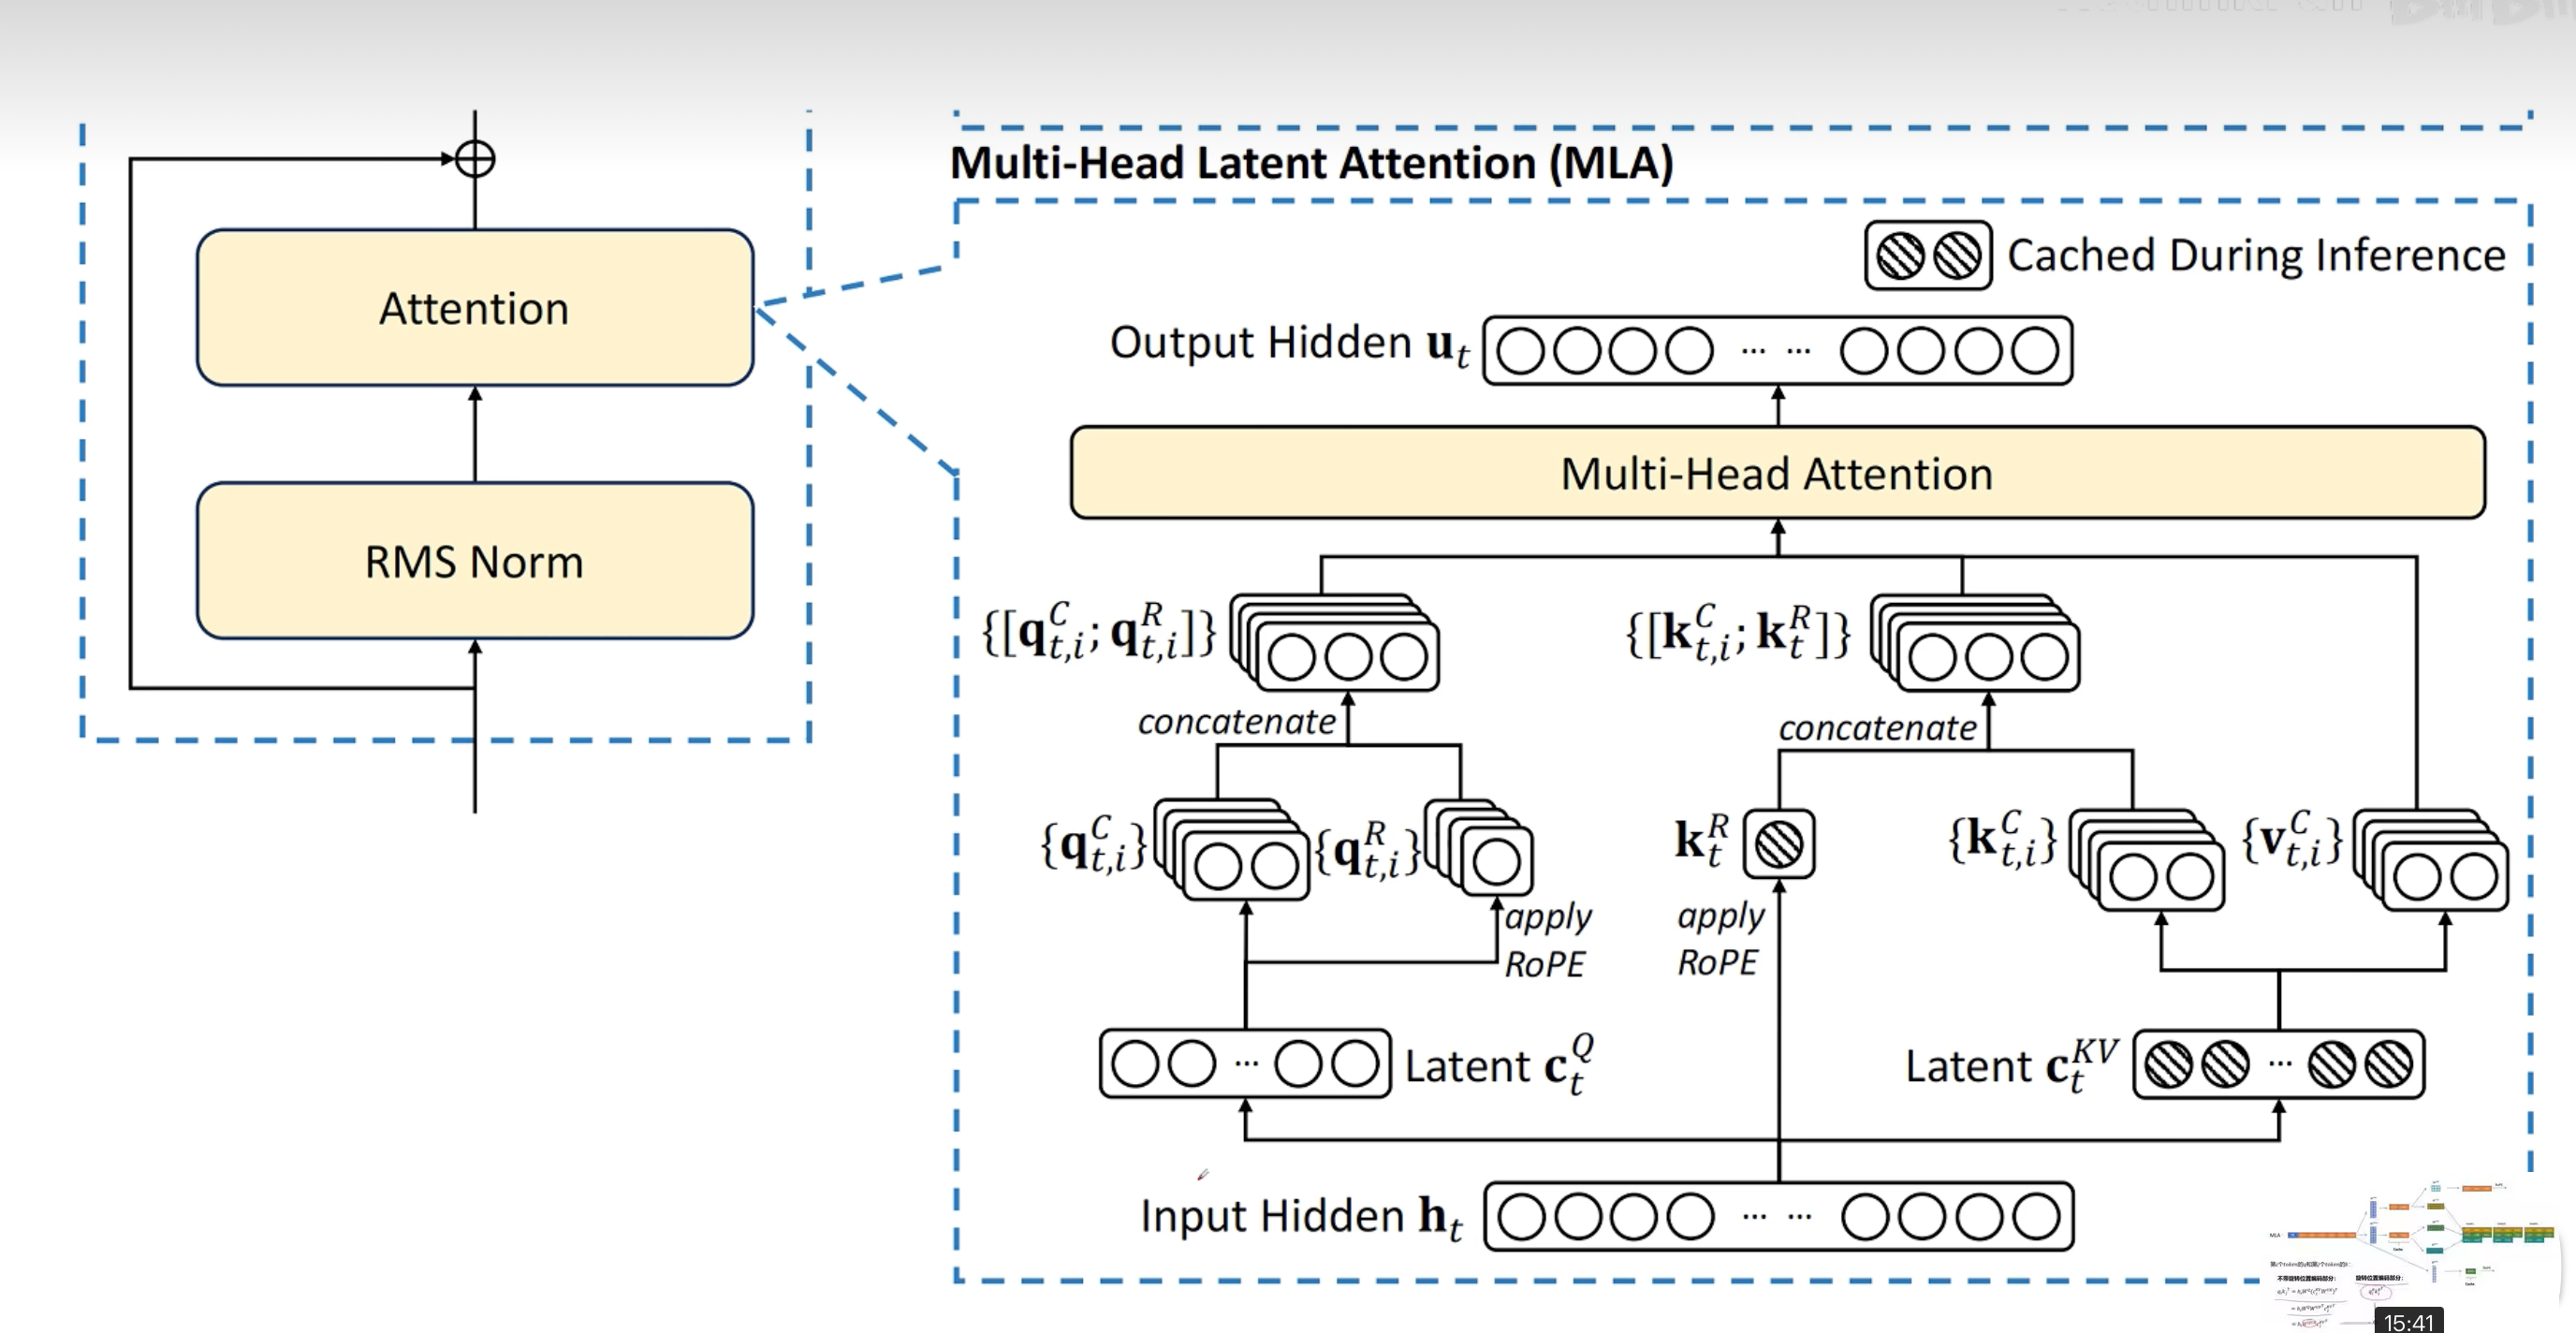

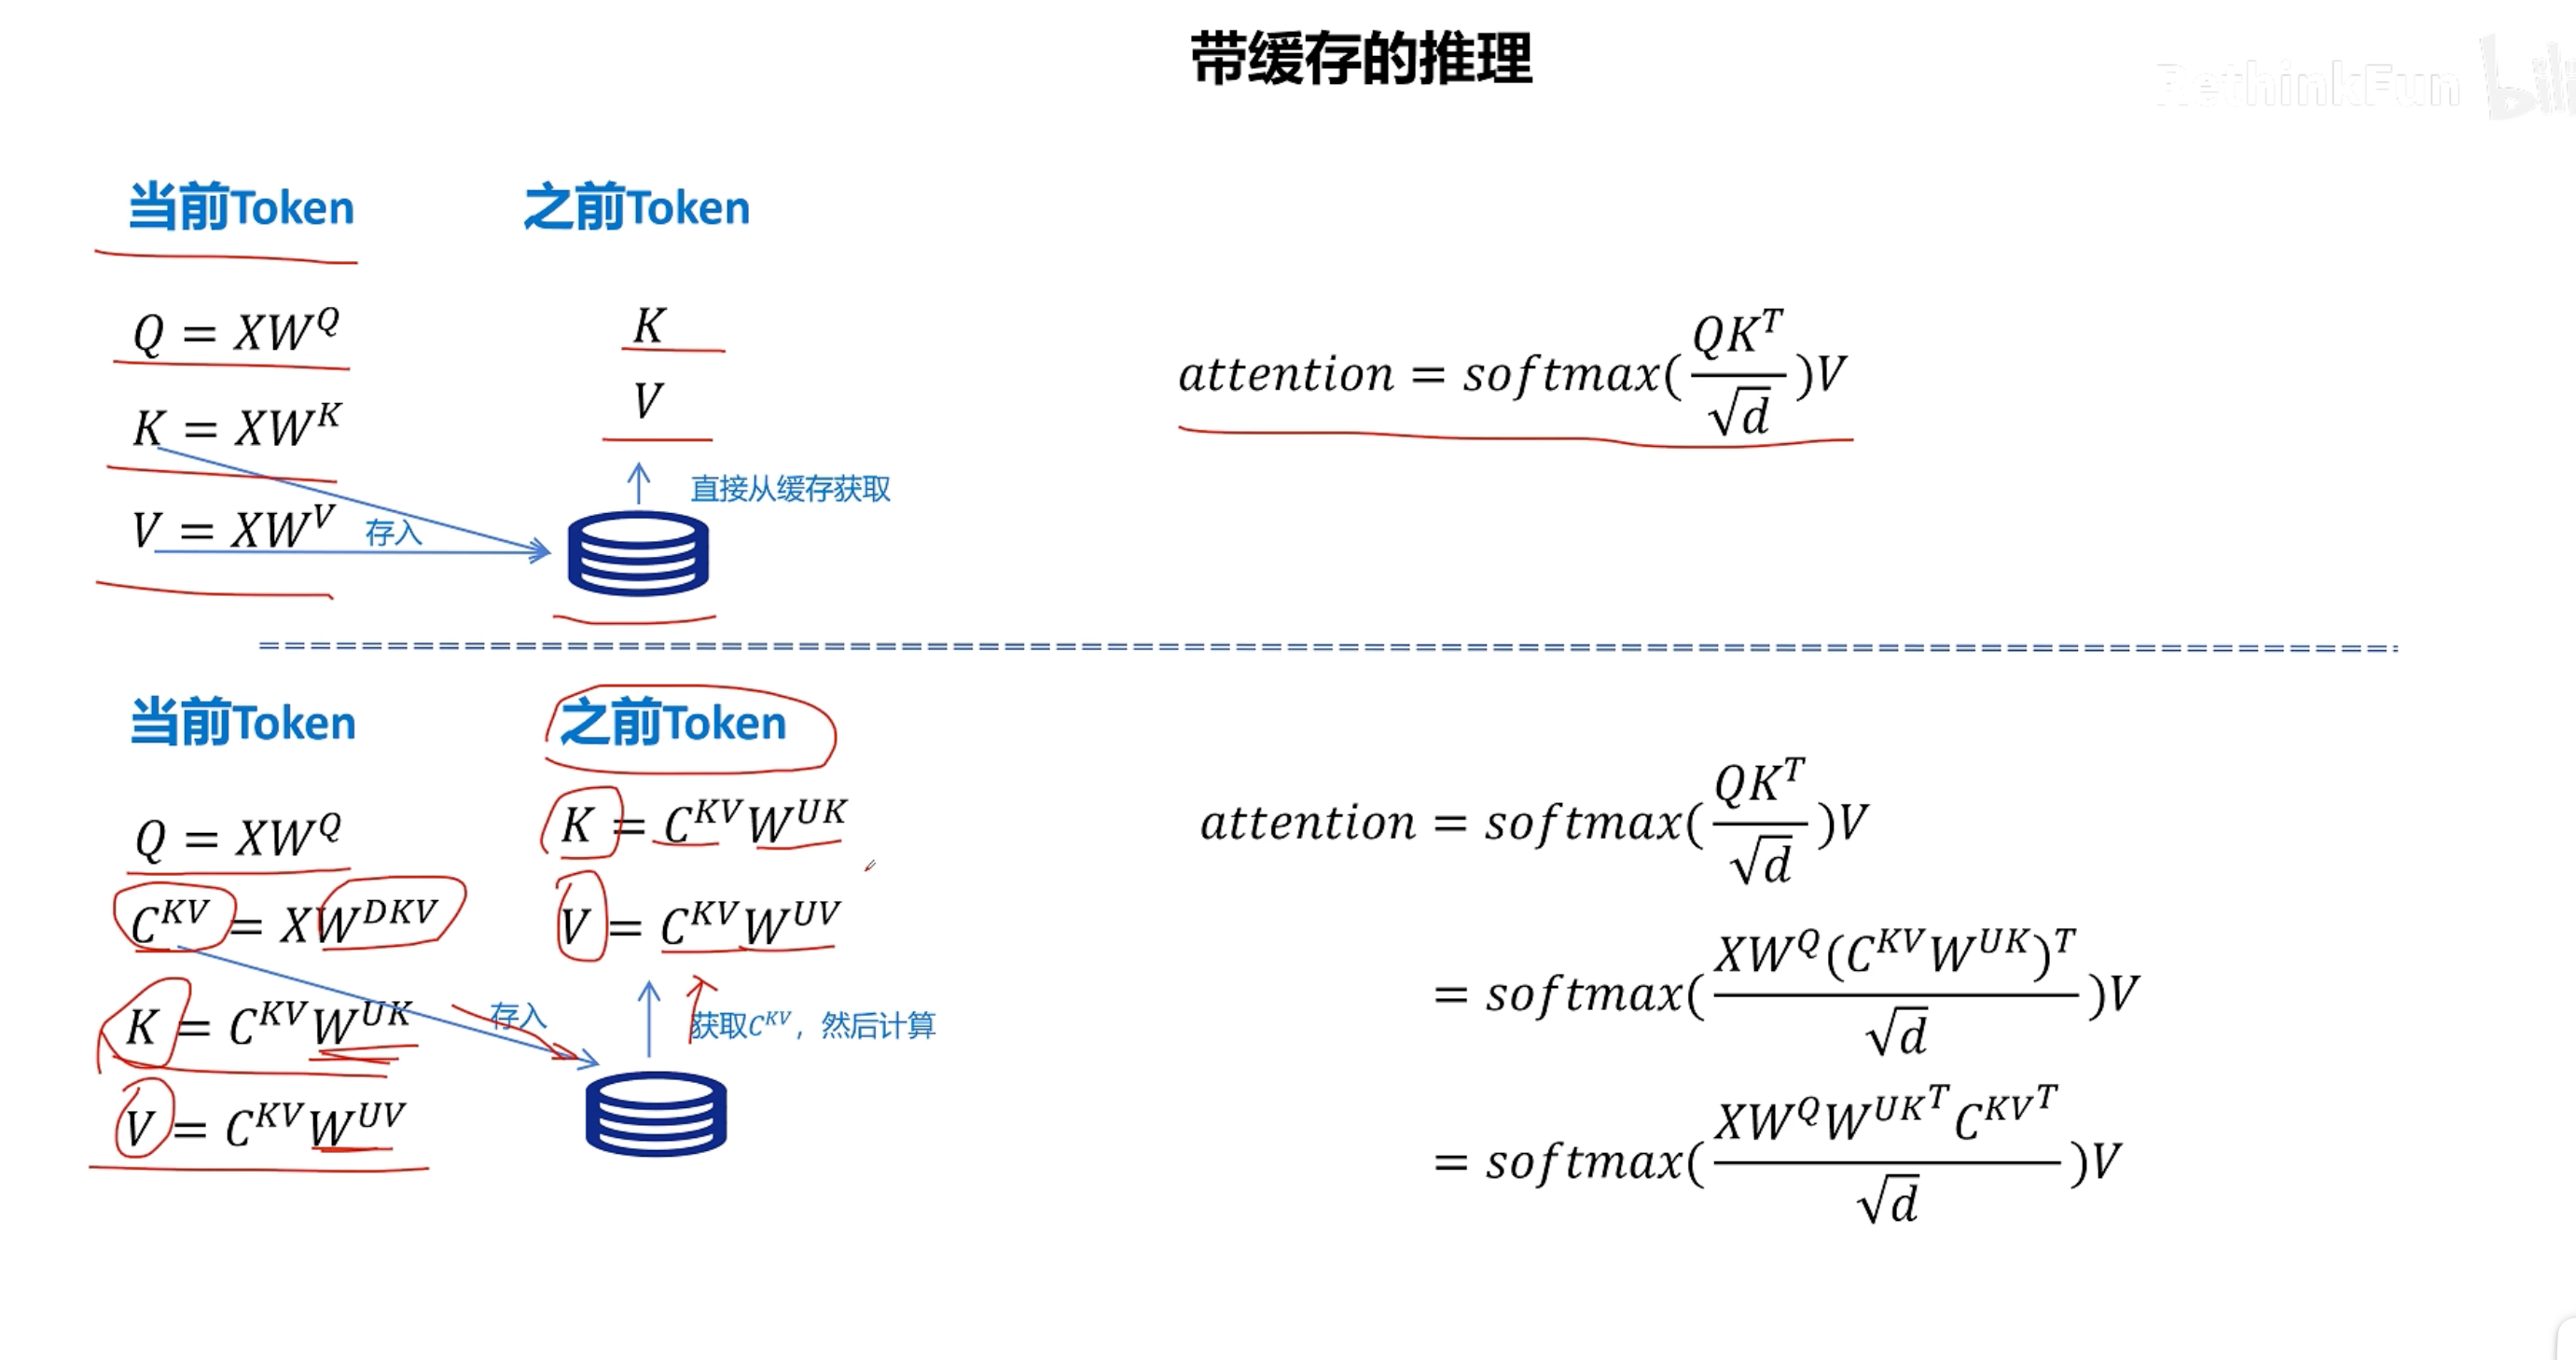

In [ ]:
class MultiHeadLatentAttention(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, latent_len: int = 64, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num # 假设能整除
        self.latent_len = latent_len # 压缩后的序列长度
        self.dropout = nn.Dropout(dropout_rate)

        # 核心：定义一个可学习的 Latent Query
        self.latent_q = nn.Parameter(torch.randn(1, latent_len, hidden_size))

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, hidden_size)
        self.v_proj = nn.Linear(hidden_size, hidden_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)
    
    def forward(self, x, mask=None):
        batch_size, seq_len, _ = x.shape

        # --- 阶段 1: Latent Query 与输入的 K/V 交互，压缩信息 ---

        # step1.1 得到原始K, V矩阵 shape is (batch_size, seq_len, hidden_size)
        # 注意：在 MHLA 中，第一阶段我们只关心输入的 K 和 V
        K = self.k_proj(x)
        V = self.v_proj(x)

        # step1.2 reshape K, V to (batch_size, head_num, seq_len, head_size)
        K = K.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)

        # step1.3 准备 Latent Query
        # latent_q shape (1, latent_len, hidden_size) -> (batch_size, latent_len, hidden_size)
        latent_Q = self.latent_q.expand(batch_size, -1, -1, -1) # 扩展 batch 维度
        # (batch_size, latent_len, hidden_size) -> (batch_size, latent_len, head_num, head_size) ->  (batch_size, head_num, latent_len, head_size)
        latent_Q = latent_Q.view(batch_size, self.latent_len, self.head_num, self.head_size).transpose(1, 2)

        # step1.4 第一次注意力计算: Latent Q 注意 K/V
        # att_scores shape: (batch_size, head_num, latent_len, seq_len)
        att_scores_latent = latent_Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            # mask shape (batch_size, 1, 1, seq_len) 可以被广播到 (B, head_num, latent_len, seq_len)
            att_scores_latent = att_scores_latent.masked_fill(
                mask == 0,
                float('-1e9')
            )
        att_weights_latent = torch.softmax(att_scores_latent, dim=-1)
        att_weights_latent = self.dropout(att_weights_latent)

        # step1.5 得到压缩后的 K 和 V (Latent KV)
        # latent_K/V shape: (batch_size, head_num, latent_len, head_size)
        latent_K = att_weights_latent @ V
        latent_V = latent_K # 在 DeepSeek 的实现中，压缩后的 K 和 V 是相同的

        # --- 阶段 2: 原始 Query 与压缩后的 Latent K/V 交互 ---

        # step2.1 得到原始Q矩阵 shape is (batch_size, seq_len, hidden_size)
        Q = self.q_proj(x)
        
        # step2.2 reshape Q to (batch_size, head_num, seq_len, head_size)
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)

        # step2.3 第二次注意力计算: 原始 Q 注意 Latent K/V
        # att_scores shape: (batch_size, head_num, seq_len, latent_len)
        att_scores_main = Q @ latent_K.transpose(-1, -2) / math.sqrt(self.head_size)
        # 注意：这里的 mask 是针对 latent_len 的，通常在 MHLA 中第二阶段不使用 padding mask
        att_weights_main = torch.softmax(att_scores_main, dim=-1)
        print(f"mhla_main_att_weights is:\n{att_weights_main}\n")
        att_weights_main = self.dropout(att_weights_main)

        # step2.4 计算最终输出
        # output shape: (batch_size, head_num, seq_len, head_size)
        output = att_weights_main @ latent_V 
        # output shape: (batch_size, seq_len, hidden_size)
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) 
        output = self.o_proj(output)

        return output

### ------------------测试mhla---------------------
batch_size, seq_len, hidden_size, head_num, latent_len = 2, 8, 16, 2, 4
x = torch.rand(batch_size, seq_len, hidden_size)

# 构造一个 padding mask
mask = torch.ones(batch_size, seq_len, dtype=torch.bool)
mask[1, 5:] = 0 # 第二个样本的最后3个token被mask掉
# unsqueeze() 用于广播
mask = mask.unsqueeze(1).unsqueeze(2) # from (batch_size, seq_len) to (batch_size, 1, 1, seq_len)

# 定义mhla
mhla = MultiHeadLatentAttention(hidden_size=hidden_size, head_num=head_num, latent_len=latent_len)
mhla.eval()
mhla_output = mhla(x, mask)
print(f"mhla_output is:\n{mhla_output}\n")
print(f"MHLA 输出维度: {mhla_output.shape}")

mhla_main_att_weights is:
tensor([[[[0.2503, 0.2500, 0.2500, 0.2497],
          [0.2501, 0.2501, 0.2496, 0.2502],
          [0.2499, 0.2502, 0.2501, 0.2499],
          [0.2499, 0.2501, 0.2496, 0.2503],
          [0.2505, 0.2500, 0.2497, 0.2497],
          [0.2499, 0.2503, 0.2499, 0.2499],
          [0.2500, 0.2500, 0.2501, 0.2500],
          [0.2501, 0.2501, 0.2499, 0.2498]],

         [[0.2498, 0.2500, 0.2499, 0.2503],
          [0.2501, 0.2499, 0.2500, 0.2500],
          [0.2495, 0.2508, 0.2500, 0.2498],
          [0.2501, 0.2502, 0.2498, 0.2499],
          [0.2505, 0.2499, 0.2500, 0.2496],
          [0.2494, 0.2504, 0.2500, 0.2502],
          [0.2490, 0.2514, 0.2500, 0.2497],
          [0.2494, 0.2501, 0.2501, 0.2504]]],


        [[[0.2513, 0.2492, 0.2498, 0.2496],
          [0.2510, 0.2495, 0.2498, 0.2497],
          [0.2512, 0.2489, 0.2503, 0.2495],
          [0.2508, 0.2498, 0.2496, 0.2498],
          [0.2504, 0.2497, 0.2500, 0.2498],
          [0.2504, 0.2500, 0.2497, 0.2500],


## 手撕softmax

In [ ]:
def manual_softmax(self, x, dim=-1):
    #step1: 为了数值稳定性，减去每个向量中的最大值
    #x 是 att_scores 它的shape is (batch_size, head_num, seq_len, seq_len)
    max_val = torch.max(x, dim=dim, keepdim=True)[0] # torch.max 返回 (values, indices)，我们只需要values
    x_stabilized = x - max_val

    #step2: 计算分子 exp(x_i - max(x))
    numerator = torch.exp(x_stabilized)

    #step3: 计算分母 sum(exp(x_j - max(x)))
    # denominator shape: (batch_size, head_num, seq_len, 1)
    denominator = torch.sum(numerator, dim=dim, keepdim=True)

    #step4: 返回softmax结果
    return numerator / denominator

In [ ]:
# 9.15重写self-att mha mqa gqa
import math
import torch
import torch.nn

class SelfAttention0915(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, hidden_size)
        self.v_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1  shape is (batch_size, seq_len, hidden_size)
        Q = self.q_proj(X)
        K = self.k_proj(X)
        V = self.v_proj(X)

        #step2 计算注意力分数
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.hidden_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-inf')
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"self-att att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step3 计算输出 shape is (batch_size, seq_len, hidden_size)
        output = att_weights @ V
        return output

class MultiHeadAttention0915(nn.Module):
    def __init__(self, hidden_size: int =384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num # 假设可以整除
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, self.head_num * self.head_size)
        self.k_proj = nn.Linear(hidden_size, self.head_num * self.head_size)
        self.v_proj = nn.Linear(hidden_size, self.head_num * self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 拿到原始Q K V shape is (batch_size, seq_len, self.head_num * self.head_size)
        Q = self.q_proj(X)
        K = self.k_proj(X)
        V = self.v_proj(X)

        #step2 reshape Q K V to (batch_size, self.head_num, seq_len, self.head_size)
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)

        #step3 计算注意力 (batch_size, self.head_num, seq_len, seq_len)
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-inf')
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"mha att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step4 计算输出 
        output = att_weights @ V # (batch_size, self.head_num, seq_len, self.head_size)
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) # (batch_size, seq_len, self.head_num * self.head_size)
        output = self.o_proj(output)
        return output

# q有head_num个，而k v均只有1个
class MultiQueryAttention0915(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, head_num * self.head_size)
        self.k_proj = nn.Linear(hidden_size, self.head_size)
        self.v_proj = nn.Linear(hidden_size, self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 拿到原始Q K V
        Q = self.q_proj(X) # batch_size, seq_len, head_num * self.head_size
        K = self.k_proj(X) # batch_size, seq_len, self.head_size
        V = self.v_proj(X) # batch_size, seq_len, self.head_size

        #step2 reshape Q K V
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2) # batch_size, head_num, seq_len, self.head_size
        K = K.unsqueeze(1) # batch_size, 1, seq_len, self.head_size 符合广播条件
        V = V.unsqueeze(1) # batch_size, 1, seq_len, self.head_size 符合广播条件

        #step3 计算注意力   batch_size, head_num, seq_len, seq_len
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-inf')
            )
        att_weights = torch.softmax(att_scores,dim = -1)
        print(f"mqa att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step4 计算输出 batch_size, head_num, seq_len, head_size
        output = att_weights @ V
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1)
        output = self.o_proj(output)
        return output

class GroupedQueryAttention0915(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 6, kv_head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = self.hidden_size // self.head_num # 假设可以整除
        self.kv_head_num = kv_head_num
        self.repeat_n = head_num // kv_head_num # 假设可以整除 这里head_num表示的是q的head_num 
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, head_num * self.head_size)
        self.k_proj = nn.Linear(hidden_size, kv_head_num * self.head_size)
        self.v_proj = nn.Linear(hidden_size, kv_head_num * self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)
    
    def forward(self, X, mask):
        batch_size, seq_len, _ = X.shape

        #step1 拿到原始Q K V
        Q = self.q_proj(X) # batch_size, seq_len, head_num * self.head_size
        K = self.k_proj(X) # batch_size, seq_len, kv_head_num * self.head_size
        V = self.v_proj(X) # batch_size, seq_len, kv_head_num * self.head_size

        #step2 reshape Q K V
        # batch_size, head_num, seq_len, self.head_size
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        # batch_size, kv_head_num, seq_len, self.head_size
        K = K.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2)
        # (batch_size, kv_head_num, seq_len, self.head_size)  to (batch_size, head_num, seq_len, self.head_size)
        # 假设我们的GQA参数如下，这能让我们清晰地看到分组：

        # Query 头总数 q_head_num = 4 个 (Q0, Q1, Q2, Q3)
        # Key/Value 头总数 kv_head_num = 2 个 (K0, K1)
        # 重复次数 repeat_n = 4 / 2 = 2 次
        # GQA的目标:
        # Q0, Q1 共享 K0
        # Q2, Q3 共享 K1
        # 期望的最终K头排列: [K0, K0, K1, K1]
        
        #下面变化是正确的 得到了 [K0, K0, K1, K1] 的排列
        K = K.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.head_num, seq_len, self.head_size)
        V = V.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.head_num, seq_len, self.head_size)
        
        # 下面变化是错的 得到的是 [K0, K1, K0, K1] 的排列
        #K = K.unsqueeze(1).repeat(1, self.repeat_n, 1, 1, 1).view(batch_size, self.head_num, seq_len, self.head_size)


        #step3 计算注意力  batch_size, head_num, seq_len, seq_len
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-inf')
            )
        att_weights = torch.softmax(att_scores,dim=-1)
        print(f"gqa att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step4 计算输出
        output = att_weights @ V # (batch_size, head_num, seq_len, self.head_size)
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) # (batch_size, seq_len, hidden_size)
        output = self.o_proj(output)

        return output

### 测试
#1 定义超参数
batch_size = 2
seq_len = 3
hidden_size = 4
head_num = 2
dropout_rate = 0.1

#2 定义输入张量
input_x = torch.rand(batch_size, seq_len, hidden_size)
print(f"input_x is \n{input_x}\n")

#3 定义掩码 掩码shape与att_weights要一致 一开始 (batch_size, seq_len)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0]
])
# self-att的mask
self_att_mask = mask.unsqueeze(1) # shape now is (batch_size, 1 ,seq_len) 可通过广播与att_weight计算 但这样计算是否正确？

# mha mqa gqa的mask
padding_mask = mask.view(batch_size, 1, 1, seq_len) # mask = mask.unsqueeze(1).unsqueeze(1)

# 4 定义注意力对象并输出结果
self_att = SelfAttention0915(hidden_size=hidden_size,dropout_rate=dropout_rate)
self_att.eval() # 切换评估模型 禁用dropout
self_att_output = self_att.forward(input_x, mask=self_att_mask)
print(f"self-att output is:\n{self_att_output}\n")

mha = MultiHeadAttention0915(hidden_size=hidden_size,head_num=head_num,dropout_rate=dropout_rate)
mha.eval()
mha_output = mha.forward(X=input_x, mask=padding_mask)
print(f"mha_output is:\n{mha_output}\n")

mqa = MultiQueryAttention0915(hidden_size=hidden_size,head_num=head_num,dropout_rate=dropout_rate)
mqa.eval()
mqa_output = mqa.forward(X=input_x, mask=padding_mask)
print(f"mqa_output is:\n{mqa_output}\n")

head_num = 4
kv_head_num = 2
gqa = GroupedQueryAttention0915(hidden_size=hidden_size,head_num=head_num, kv_head_num=kv_head_num ,dropout_rate=dropout_rate)
gqa.eval()
gqa_output = gqa.forward(X=input_x, mask=padding_mask)
print(f"gqa_output is:\n{gqa_output}\n")
        

input_x is 
tensor([[[0.1103, 0.1669, 0.5977, 0.7058],
         [0.0293, 0.6216, 0.6751, 0.1604],
         [0.4893, 0.8704, 0.0781, 0.7399]],

        [[0.2091, 0.8871, 0.8915, 0.0737],
         [0.3108, 0.8129, 0.1412, 0.0222],
         [0.0295, 0.7888, 0.0354, 0.4003]]])

self-att att_weights is:
tensor([[[0.3297, 0.3276, 0.3428],
         [0.3360, 0.3322, 0.3317],
         [0.3362, 0.3018, 0.3619]],

        [[0.4808, 0.5192, 0.0000],
         [0.4808, 0.5192, 0.0000],
         [0.4711, 0.5289, 0.0000]]], grad_fn=<SoftmaxBackward0>)

self-att output is:
tensor([[[-0.0867,  0.2148, -0.0399,  0.3708],
         [-0.0837,  0.2178, -0.0401,  0.3684],
         [-0.0927,  0.2107, -0.0389,  0.3729]],

        [[-0.0731,  0.1575, -0.0086,  0.4351],
         [-0.0731,  0.1575, -0.0086,  0.4351],
         [-0.0736,  0.1559, -0.0061,  0.4360]]], grad_fn=<UnsafeViewBackward0>)

mha att_weights is:
tensor([[[[0.3206, 0.3047, 0.3747],
          [0.3210, 0.3022, 0.3768],
          [0.3197, 0.3007, 

In [ ]:
# 9.24重写 mha mqa gqa
import torch
import torch.nn as nn
import math

class SelfAttention0924(nn.Module):
    def __init__(self, hidden_size: int = 384, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, hidden_size)
        self.v_proj = nn.Linear(hidden_size, hidden_size)
        
    def forward(self, x, mask=None):
        # x shape is (batch_size, seq_len, hidden_size)
        batch_size, seq_len, _ = x.shape

        #step1 拿到Q K V (batch_size, seq_len, hidden_size)
        Q = self.q_proj(x)
        K = self.k_proj(x)
        V = self.v_proj(x)

        #step2 计算注意力分数
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(hidden_size) #(batch_size, seq_len, seq_len)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e20')
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step3 计算输入
        output = att_weights @ V
        return output


### ------------------测试self-att--------------------------
batch_size, seq_len, hidden_size = 2, 3, 4
x = torch.rand(batch_size, seq_len, hidden_size)
#掩码shape与att_weights要一致 一开始 (batch_size, seq_len)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0]
], dtype=torch.bool) #dtype=torch.bool 节省内存
mask = mask.unsqueeze(1) #  (batch_size, 1, seq_len)可通过广播与att_weight计算 但这样计算是否正确？
#定义self-att
self_att = SelfAttention0924(hidden_size=hidden_size)
self_att.eval()
self_att_output = self_att(x=x,mask=mask)
print(f"self_att_output is:\n{self_att_output}\n")



class MultiHeadAttention0924(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num # 假设可以整除
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, hidden_size)
        self.v_proj = nn.Linear(hidden_size, hidden_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)
    
    def forward(self, x, mask=None):
        batch_size, seq_len, _ = x.shape

        #step1 得到原始Q K V矩阵 shape is (batch_size, seq_len, hidden_size)
        Q = self.q_proj(x)
        K = self.k_proj(x)
        V = self.v_proj(x)

        #step2 reshape Q K V to (batch_size, head_num, seq_len, head_size)
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2)

        #step3 计算注意力分数 (batch_size, head_num, seq_len, seq_len)
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e9')
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"multi_att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step4 计算输出
        #(batch_size, head_num, seq_len, head_size)
        output = att_weights @ V 
        #(batch_size, seq_len, hidden_size)
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) 
        output = self.o_proj(output)

        return output

### ------------------测试mha---------------------
batch_size, seq_len, hidden_size, head_num = 2, 3, 4, 2
x = torch.rand(batch_size, seq_len, hidden_size)
# mask shape 要等于att_weights (batch_size, head_num, seq_len, seq_len)
mask = torch.tensor([ 
    [1, 1, 1],
    [1, 1, 0]
], dtype=torch.bool)
# unsqueeze() 不依赖于知道具体的维度大小，因此更灵活
# mask = mask.view(batch_size, 1, 1, seq_len)
mask = mask.unsqueeze(1).unsqueeze(2) # from (batch_size, seq_len) to (batch_size, 1, 1, seq_len) 可广播
# 定义mha
mha = MultiHeadAttention0924(hidden_size=hidden_size,head_num=head_num)
mha.eval()
mha_output = mha(x, mask)
print(f"mha_output is:\n{mha_output}\n")


class GroupedQueryAttention0924(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 6, kv_head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num #假设能整除
        self.kv_head_num = kv_head_num
        self.repeat_n = head_num // kv_head_num #假设能整除
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, self.kv_head_num * self.head_size)
        self.v_proj = nn.Linear(hidden_size, self.kv_head_num * self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)

    def forward(self, x, mask=None):
        batch_size, seq_len, _ = x.shape

        #step1 获得初始Q K V
        Q = self.q_proj(x) # batch_size, seq_len, head_num * head_size
        K = self.k_proj(x) # batch_size, seq_len, self.kv_head_num * self.head_size
        V = self.v_proj(x) # batch_size, seq_len, self.kv_head_num * self.head_size

        #step2 reshape Q K V
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2) # (batch_size, head_num, seq_len, head_size)
        K = K.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2) # (batch_size, kv_head_num, seq_len, head_size)
        V = V.view(batch_size, seq_len, self.kv_head_num, self.head_size).transpose(1, 2) # (batch_size, kv_head_num, seq_len, head_size)
        
        # === 核心修正 1: 使用更高效的方式扩展 K 和 V ===
        # K: (batch_size, kv_head_num, seq_len, head_size) -> (batch_size, head_num, seq_len, head_size)
        K = K.repeat_interleave(self.repeat_n, dim=1)
        V = V.repeat_interleave(self.repeat_n, dim=1)
        # K = K.unsqueeze(2).repeat(1, 1,self.repeat_n, 1, 1).view(batch_size, self.head_num, seq_len, self.head_size)
        # V = V.unsqueeze(2).repeat(1, 1, self.repeat_n, 1, 1).view(batch_size, self.head_num, seq_len, self.head_size)



        #step3 计算注意力分数
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size) # (batch_size, head_num, seq_len, seq_len)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e9')
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"gqa_att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step4 计算输出
        output = att_weights @ V # batch_size, seq_len, head_num * head_size
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1)
        output = self.o_proj(output)

        return output

### ------------------------------测试gqa------------------------
batch_size, seq_len, hidden_size, head_num, kv_head_num = 2, 3, 12, 6, 2
x=torch.rand(batch_size, seq_len, hidden_size)

#mask shape 与 att_weight一致 (batch_size, head_num, seq_len, seq_len)
mask = torch.tensor([
    [1, 1, 1],
    [1, 1, 0]
], dtype=torch.bool)
mask = mask.unsqueeze(1).unsqueeze(2) # (batch_size, 1, 1, seq_len) 可以广播与 att_weight计算

# 定义gqa
gqa = GroupedQueryAttention0924(hidden_size=hidden_size,head_num=head_num,kv_head_num=kv_head_num)
gqa.eval()
gqa_output = gqa(x=x,mask=mask)
print(f"gqa_output is:\n{gqa_output}\n")



class MultiQueryAttention0924(nn.Module):
    def __init__(self, hidden_size: int = 384, head_num: int = 2, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.head_num = head_num
        self.head_size = hidden_size // head_num #假设能整除
        self.dropout = nn.Dropout(dropout_rate)

        self.q_proj = nn.Linear(hidden_size, hidden_size)
        self.k_proj = nn.Linear(hidden_size, self.head_size)
        self.v_proj = nn.Linear(hidden_size, self.head_size)
        self.o_proj = nn.Linear(hidden_size, hidden_size)
    
    def forward(self, x, mask = None):
        batch_size, seq_len, _ = x.shape

        #step1 获得原始Q K V
        Q = self.q_proj(x) # batch_size, seq_len, hidden_size
        K = self.k_proj(x) # batch_size, seq_len, head_size
        V = self.v_proj(x) # batch_size, seq_len, head_size

        #step2 reshape Q K V
        Q = Q.view(batch_size, seq_len, self.head_num, self.head_size).transpose(1, 2) # (batch_size, head_num, seq_len, head_size)
        K = K.unsqueeze(1) # (batch_size, 1, seq_len, head_size) 可广播
        V = V.unsqueeze(1)

        #step3 计算注意力分数 (batch_size, head_num, seq_len, seq_len)
        att_scores = Q @ K.transpose(-1, -2) / math.sqrt(self.head_size)
        if mask is not None:
            att_scores = att_scores.masked_fill(
                mask == 0,
                float('-1e9')
            )
        att_weights = torch.softmax(att_scores, dim=-1)
        print(f"mqa_att_weights is:\n{att_weights}\n")
        att_weights = self.dropout(att_weights)

        #step4 计算输出
        output = att_weights @ V # (batch_size, head_num, seq_len, head_size)
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, -1) # batch_size, seq_len, hidden_size
        output = self.o_proj(output)

        return output

### ----------------------------测试mqa-----------------------------
batch_size, seq_len, hidden_size, head_num = 2, 3, 4, 2

x = torch.rand(batch_size, seq_len, hidden_size)
# mask最终shape要与att_scores一致 
mask = torch.tensor([ #now is （batch_size, seq_len）
    [1, 1, 1],
    [1, 1, 0]
])
mask = mask.unsqueeze(1).unsqueeze(2) # (batch_size, 1, 1, seq_len)

#定义mqa
mqa = MultiQueryAttention0924(hidden_size=hidden_size,head_num=head_num)
mqa.eval()
mqa_output = mqa(x,mask)
print(f"mqa_output is:\n{mqa_output}\n")
        






att_weights is:
tensor([[[0.3327, 0.3468, 0.3205],
         [0.3395, 0.3332, 0.3273],
         [0.3313, 0.3379, 0.3308]],

        [[0.5270, 0.4730, 0.0000],
         [0.5004, 0.4996, 0.0000],
         [0.5298, 0.4702, 0.0000]]], grad_fn=<SoftmaxBackward0>)

self_att_output is:
tensor([[[ 0.1120, -0.0564,  0.5825,  0.1663],
         [ 0.1120, -0.0518,  0.5819,  0.1744],
         [ 0.1121, -0.0529,  0.5818,  0.1729]],

        [[ 0.3178, -0.1446,  0.4617,  0.3809],
         [ 0.3144, -0.1310,  0.4558,  0.3925],
         [ 0.3182, -0.1460,  0.4623,  0.3796]]], grad_fn=<UnsafeViewBackward0>)

multi_att_weights is:
tensor([[[[0.3311, 0.3458, 0.3232],
          [0.3336, 0.3398, 0.3267],
          [0.3307, 0.3480, 0.3213]],

         [[0.3304, 0.3385, 0.3312],
          [0.3319, 0.3366, 0.3315],
          [0.3309, 0.3374, 0.3317]]],


        [[[0.4645, 0.5355, 0.0000],
          [0.5126, 0.4874, 0.0000],
          [0.4881, 0.5119, 0.0000]],

         [[0.4959, 0.5041, 0.0000],
          [0.

## FlashAttention Online Softmax

| 变量  | 数学含义                    |
| --- | ----------------------- |
| `m` | 当前看到的最大 score（数值稳定）     |
| `d` | 当前 ∑ exp(score − m)     |
| `o` | 当前 ∑ exp(score − m) · V |


In [ ]:
import numpy as np

def flash_attention_single_query(Q, K, V):
    """
    FlashAttention（单个 Query 的教学版实现）

    参数：
    Q: (d,)        —— 单个 query 向量
    K: (N, d)      —— N 个 key
    V: (N, d_v)    —— N 个 value

    返回：
    O: (d_v,)      —— attention 输出
    """

    # ========= 初始化 Online Softmax 状态 =========
    m = -np.inf                    # 当前全局 max
    d = 0.0                        # 当前 softmax 分母
    o = np.zeros(V.shape[1])       # 输出向量（未归一化）

    # ========= 模拟 block-wise 处理 =========
    # 真实 FlashAttention：这里是一个 K/V block
    for j in range(K.shape[0]):
        # 1️⃣ 计算 attention score（QK）
        score = np.dot(Q, K[j])    # 标量

        # 2️⃣ 更新 max（数值稳定核心）
        m_new = max(m, score)

        # 3️⃣ 如果 max 变大，旧状态要“整体缩放”
        scale = np.exp(m - m_new)

        # 4️⃣ 更新 softmax 分母
        d = d * scale + np.exp(score - m_new)

        # 5️⃣ 更新输出向量（关键！）
        o = o * scale + np.exp(score - m_new) * V[j]

        # 6️⃣ 提交状态
        m = m_new

        print(
            f"Step {j}: "
            f"score={score:.4f}, "
            f"m={m:.4f}, "
            f"d={d:.4f}, "
            f"o={o}"
        )

    # ========= 最终归一化 =========
    O = o / d
    return O

# [xxxxxxxxxxx]
# gpu block talbe kvcache

100亿个数乱重 109  int 64 
显存32mb  4*1024*1024  250
排序中位数  50亿


堆  4*1024*1024*1024 

桶排  8 93  1999999999999
 250
[1, 1000] [1001, 1050]

# 
[x] [x] [x]

【 x 】 [ x x ] [x x x]

<> 

import numpy as np

de f flash_attention_single_query_debug(Q, K, V):
    m = -np.inf   # running max：当前看到的最大 Q·K
    d = 0.0       # running sum：∑ exp(score - m)
    o = np.zeros(V.shape[1])  # running output numerator：∑ exp(score - m) * V

    print("=" * 100)
    print(f"Query Q = {Q}")
    print("解释：我们要计算 Softmax(QK^T) @ V")
    print("       即 O = (∑ exp(Q·K_j) * V_j) / (∑ exp(Q·K_j))")
    print("=" * 100)

    for j in range(K.shape[0]):
        score = np.dot(Q, K[j])  # Q · K_j

        # 新的最大值（数值稳定关键）
        m_new = max(m, score)

        # 如果 max 变大，旧结果要整体缩放
        scale = np.exp(m - m_new)

        # 当前项在新 max 下的指数值
        exp_score = np.exp(score - m_new)

        # 更新 softmax 分母
        d_new = d * scale + exp_score

        # 更新 softmax 分子（带 V）
        o_new = o * scale + exp_score * V[j]

        print(f"[Step {j}] 处理第 {j} 个 Key-Value")
        print(f"K[{j}] = {K[j]}")
        print(f"V[{j}] = {V[j]}")
        print(f"score = Q · K[{j}] = {score:.6f}")

        print(f"\n【数值稳定处理】")
        print(f"之前最大值 m_prev = {m:.6f}")
        print(f"当前 score        = {score:.6f}")
        print(f"新的最大值 m_new = max(m_prev, score) = {m_new:.6f}")

        print(f"\n【指数修正】")
        print(f"scale = exp(m_prev - m_new)")
        print(f"      = exp({m:.6f} - {m_new:.6f})")
        print(f"      = {scale:.6e}")

        print(f"exp(score - m_new)")
        print(f"= exp({score:.6f} - {m_new:.6f})")
        print(f"= {exp_score:.6e}")

        print(f"\n【分母更新（Softmax sum）】")
        print(f"d_new = d_prev * scale + exp(score - m_new)")
        print(f"      = {d:.6e} * {scale:.6e} + {exp_score:.6e}")
        print(f"      = {d_new:.6e}")

        print(f"\n【分子更新（Softmax * V）】")
        print(f"o_new = o_prev * scale + exp(score - m_new) * V[{j}]")
        print(f"      = {o} * {scale:.6e} + {exp_score:.6e} * {V[j]}")
        print(f"      = {o_new}")

        print("-" * 100)

        m, d, o = m_new, d_new, o_new

    O = o / d
    print("\n✅ Final Output")
    print("O = o / d")
    print(f"  = {o} / {d:.6e}")
    print(f"  = {O}")
    print("=" * 100)
    return O


# 测试用例1
Q = np.array([1.0])
K = np.array([[5.0], [1.0], [0.0]])
V = np.array([[10.0], [1.0], [1.0]])
flash_attention_single_query_debug(Q, K, V)




Query Q = [1.]
解释：我们要计算 Softmax(QK^T) @ V
       即 O = (∑ exp(Q·K_j) * V_j) / (∑ exp(Q·K_j))
[Step 0] 处理第 0 个 Key-Value
K[0] = [5.]
V[0] = [10.]
score = Q · K[0] = 5.000000

【数值稳定处理】
之前最大值 m_prev = -inf
当前 score        = 5.000000
新的最大值 m_new = max(m_prev, score) = 5.000000

【指数修正】
scale = exp(m_prev - m_new)
      = exp(-inf - 5.000000)
      = 0.000000e+00
exp(score - m_new)
= exp(5.000000 - 5.000000)
= 1.000000e+00

【分母更新（Softmax sum）】
d_new = d_prev * scale + exp(score - m_new)
      = 0.000000e+00 * 0.000000e+00 + 1.000000e+00
      = 1.000000e+00

【分子更新（Softmax * V）】
o_new = o_prev * scale + exp(score - m_new) * V[0]
      = [0.] * 0.000000e+00 + 1.000000e+00 * [10.]
      = [10.]
----------------------------------------------------------------------------------------------------
[Step 1] 处理第 1 个 Key-Value
K[1] = [1.]
V[1] = [1.]
score = Q · K[1] = 1.000000

【数值稳定处理】
之前最大值 m_prev = 5.000000
当前 score        = 1.000000
新的最大值 m_new = max(m_prev, score) = 5.000000

【指数修正】
scale = exp(

array([9.78002879])

# 手撕归一化Norm

## LayerNorm

In [ ]:
import torch
import torch.nn as nn

class LayerNorm(nn.Module):
    def __init__(self, hidden_size, eps=1e-6):
        """
        hidden_size: 输入张量最后一个维度的大小
        eps: 防止除零错误的一个小常数
        """
        super().__init__()
        # super(LayerNorm, self).__init__() # 这个与super().__init__() 两者是完全等价的，没有任何区别。 前者python2写法 需要指定当前类名和实例对象self

        # 缩放参数 初始化为1意味着在训练刚开始时，归一化后的数据不会被缩放 保持其标准方差，这是一个很好的起点。
        self.gamma = nn.Parameter(torch.ones(hidden_size)) # nn.Parameter的作用是向 nn.Module 声明：“这是一个需要学习和更新的模型参数”。  torch.ones(hidden_size)创建一个长度为 hidden_size 的一维向量，每个元素用浮点数1.0来填充。例如 hidden_size=4，它会创建 tensor([1., 1., 1., 1.])。
        # 平移参数  初始化为0意味着在训练刚开始时，归一化后的数据不会被平移
        self.beta = nn.Parameter(torch.zeros(hidden_size)) # 这里torch.zeros(hidden_size)的作用是什么 创建一个长度为 hidden_size 的一维向量 浮点数 0.0来填充所有元素，torch.zeros与上面的torch.ones有什么区别？
        
        self.eps = eps
    
    def forward(self, x):
        """
        前向传播函数。
        参数:
        x: 输入张量，形状为 [batch_size, seq_len, hidden_size]。
        返回:
        归一化后的张量，形状同输入张量。
        """
        #1 计算均值
        mean = x.mean(-1, keepdim=True) # 哪种常见需要传keepdim=True 任何你需要保持原始张量维度数以便进行后续广播运算的场景都需要。
        # 哪种常景不需要？不需要 keepdim=True:
            # 计算损失函数: 当你计算一个批次的平均损失时，你最终想要得到一个标量（0维张量），所以你会一路归约下去，不需要保留维度。例如 loss = loss_fn(preds, labels).mean()。
            # 计算分类准确率: 当你比较预测和标签，然后求和计算正确个数时，你通常是在把维度降低。
            # 当你只是想得到一个聚合后的统计值，并且不再需要它与原始张量进行广播运算时。
                    
        #2 手动计算有偏方差 (variance)
        # var = x.var(-1, keepdim=True, unbiased=False) 
        var = ((x - mean)**2).mean(-1, keepdim=True)

        #3 底层是Z-score标准化，其目的是将一个任意分布的数据转换成一个均值为0，标准差为1的标准正态分布（或近似标准正态分布）。
        x_norm = (x - mean) / torch.sqrt(var + self.eps) # 经过这一步 x_norm.mean() 的结果将非常接近 0。 x_norm.std() 的结果将非常接近 1。
        # 缩放和平移
        return self.gamma * x_norm + self.beta
    
# 测试LayerNorm
x = torch.rand(2, 3, 4)
layer_norm = LayerNorm(4)
output = layer_norm(x)
print(output)


tensor([[[ 0.7460,  1.1752, -1.2901, -0.6310],
         [-0.0334, -0.0989, -1.3446,  1.4769],
         [ 0.5421, -1.7232,  0.7307,  0.4504]],

        [[ 1.4763, -0.8092,  0.3530, -1.0201],
         [-1.3614,  0.8095, -0.5423,  1.0941],
         [ 1.6962, -0.8819, -0.4894, -0.3249]]], grad_fn=<AddBackward0>)


## RMSNorm

In [ ]:
import torch
import torch.nn as nn

class RMSNorm(nn.Module):
    def __init__(self, hidden_size, eps = 1e-6):
        super().__init__()

        self.gamma = nn.Parameter(torch.ones(hidden_size)) # 缩放参数
        self.eps = eps
    
    def forward(self, x):
        """
        前向传播函数。
        参数:
        x: 输入张量，形状为 [batch_size, seq_len, d_model]。
        返回:
        归一化后的张量，形状同输入张量。
        """ 

        # layernorm
        # mean = x.mean(-1, keepdim=True)
        # var = ((x - mean) ** 2).mean(-1,keepdim=True)
        # x_norm = x - mean / torch.sqrt(var + 1e-6)
        # 计算均方根平方 
        # var = ((x - mean)**2).mean(-1, keepdim=True) 方差计算
        rms = (x**2).mean(-1,keepdim=True) + self.eps # x.pow(2) 等价于 x**2 和 x*x
        # 标准化
        x_norm = x / torch.sqrt(rms) # torch.sqrt(rms)为均方根
        # 缩放
        return self.gamma * x_norm

## 测试RMSNorm
torch.rand(2, 3, 4)
rms_norm = RMSNorm(4)
rms_norm.eval() # 推理模式
output = rms_norm(x)
print(output)

tensor([[[1.6432, 0.6845, 0.8468, 0.3379],
         [1.3268, 0.1373, 1.3067, 0.7165],
         [0.4415, 1.3126, 1.2019, 0.7984]],

        [[1.1336, 0.8362, 1.0997, 0.8979],
         [0.1364, 0.3574, 1.4772, 1.2929],
         [0.7212, 0.7283, 0.4032, 1.6694]]], grad_fn=<MulBackward0>)


## BatchNorm(待背诵)
BatchNorm 与 LayerNorm 最核心的区别在于归一化的维度：
LayerNorm：在每个样本内部，对特征维度（hidden_size）进行归一化。
BatchNorm：在一个批次（Batch）内部，对**每个特征通道（Channel）**进行归一化。
此外，BatchNorm 在训练和推理（评估）模式下的行为是不同的，这需要在实现中体现出来。


代码解释和关键点
__init__:
num_features: 这是 BatchNorm 的核心参数，它代表需要归一化的特征/通道的数量。
gamma 和 beta: 与 LayerNorm 类似，但它们的维度是 (num_features)，因为归一化是按特征进行的。
register_buffer(): 这是 BatchNorm 实现中一个非常重要的部分。running_mean 和 running_var 存储了在整个训练过程中学到的全局均值和方差。我们使用 register_buffer 来告诉 PyTorch：
这两个张量是模型状态的一部分（需要和模型一起保存、加载，并移动到 GPU/CPU）。
但它们不是需要梯度更新的可训练参数。

forward:
形状调整: gamma 和 beta 的形状是 (C,)，而输入 x 可能是 (N, C)、(N, C, L) 或 (N, C, H, W)。为了能使用广播机制，我们需要将 gamma 和 beta 的形状调整为 (1, C, 1, ...)，使其维度数量与 x 匹配。
self.training: 这是一个从 nn.Module 继承的布尔属性。当你调用 model.train() 时它为 True，调用 model.eval() 时它为 False。我们用它来区分训练和评估两种不同的行为。

训练模式 (if self.training:):
计算当前小批次（mini-batch）的均值和方差。注意 dim 参数是 [0] + list(range(2, x.dim()))，这意味着我们在除了 C 所在维度（dim=1）之外的所有维度上进行计算。
使用一个**滑动平均（moving average）**公式来更新 running_mean 和 running_var。momentum 参数控制了新批次统计量对全局统计量的影响程度。
使用当前批次的 batch_mean 和 batch_var 对输入 x 进行归一化。

评估模式 (else:):
不计算当前批次的均值和方差。
直接使用在整个训练过程中累积下来的 running_mean 和 running_var 来对输入 x 进行归一化。这保证了在推理时，即使只有一个样本，也能得到稳定一致的归一化结果。
缩放与平移: 最后的 gamma * norm + beta 步骤与 LayerNorm 完全相同。

In [ ]:
import torch
import torch.nn as nn

class BatchNorm0924(nn.Module):
    def __init__(self, num_features: int, eps: float = 1e-5, momentum: float = 0.1):
        super().__init__()

        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        
        # 可学习的缩放参数 gamma 和平移参数 beta
        self.gamma = nn.Parameter(torch.ones(num_features))
        self.beta = nn.Parameter(torch.zeros(num_features))

        # 用于在推理时使用的全局统计量（均值和方差）
        # register_buffer 确保这些张量是模型状态的一部分，会被保存和加载，但不是可训练的参数
        self.register_buffer('running_mean', torch.zeros(num_features))
        self.register_buffer('running_var', torch.ones(num_features))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # BatchNorm 通常处理 (N, C, ...) 形状的输入，N是批次大小, C是特征/通道数
        # 这里我们假设输入是 (N, C) 或 (N, C, L) 或 (N, C, H, W)
        # 我们需要调整 gamma 和 beta 的形状以进行广播
        shape = [1, self.num_features] + [1] * (x.dim() - 2)
        gamma = self.gamma.view(*shape)
        beta = self.beta.view(*shape)

        # 判断当前是训练模式还是评估模式
        if self.training:
            # --- 训练模式 ---
            # 在除了通道 C 以外的所有维度上计算均值和方差
            dims = [0] + list(range(2, x.dim()))
            
            # step1 计算当前批次的均值
            batch_mean = x.mean(dim=dims, keepdim=True)
            # step2 计算当前批次的方差
            batch_var = x.var(dim=dims, unbiased=False, keepdim=True)

            # step3 更新全局的均值和方差（滑动平均）
            # 这部分操作不参与梯度计算
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * batch_mean.squeeze()
                self.running_var = (1 - self.momentum) * self.running_var + self.momentum * batch_var.squeeze()

            # step4 使用当前批次的统计量进行归一化
            norm = (x - batch_mean) / torch.sqrt(batch_var + self.eps)
            
        else:
            # --- 评估模式 ---
            # step1 & 2 & 3: 直接使用训练阶段累积的全局统计量进行归一化
            norm = (x - self.running_mean.view(*shape)) / torch.sqrt(self.running_var.view(*shape) + self.eps)

        # step5 缩放与平移
        y = gamma * norm + beta

        return y

# ----------------- 测试 -----------------
# 假设我们处理的是 2D 数据 (例如 MLP 的隐藏层)
# N = Batch Size, C = num_features (hidden_size)
N, C = 4, 10
x_train = torch.randn(N, C)
x_eval = torch.randn(N, C)

batch_norm = BatchNorm0924(num_features=C)

# --- 模拟训练过程 ---
print("--- 训练模式 ---")
batch_norm.train() # 切换到训练模式
bn_output_train = batch_norm(x_train)
print(f"训练模式输出的形状: {bn_output_train.shape}")
# 检查一下训练后 running_mean 和 running_var 是否被更新
print(f"更新后的 running_mean (不再是全0):\n{batch_norm.running_mean}\n")
print(f"更新后的 running_var (不再是全1):\n{batch_norm.running_var}\n")

# --- 模拟评估/推理过程 ---
print("--- 评估模式 ---")
batch_norm.eval() # 切换到评估模式
bn_output_eval = batch_norm(x_eval)
print(f"评估模式输出的形状: {bn_output_eval.shape}\n")

# 检查一下评估模式下，每一列（每个特征）的均值和方差
# 注意：输出的均值不为0，方差不为1，因为它们是被gamma和beta变换过的
# 但归一化后的norm张量的均值和方差会接近于使用running_mean和running_var计算的结果
print("评估模式输出:\n", bn_output_eval)

--- 训练模式 ---
训练模式输出的形状: torch.Size([4, 10])
更新后的 running_mean (不再是全0):
tensor([-0.0637,  0.0313, -0.0131,  0.0132, -0.0003, -0.0389, -0.0292, -0.0448,
        -0.0015,  0.0079])

更新后的 running_var (不再是全1):
tensor([1.0606, 1.1503, 0.9439, 0.9757, 0.9680, 0.9245, 1.0873, 0.9519, 0.9694,
        1.0526])

--- 评估模式 ---
评估模式输出的形状: torch.Size([4, 10])

评估模式输出:
 tensor([[-0.9935,  0.4541, -0.1888,  0.4831,  0.0212,  0.8973, -0.1185, -0.1339,
          0.1194, -0.3368],
        [ 1.5605, -0.6268, -0.6184,  0.6494, -0.4860, -1.1439, -0.0395,  0.8271,
         -0.2830,  0.0423],
        [ 0.5936, -0.8351, -1.4645, -0.6631, -1.1272, -1.5671, -0.2047,  0.2030,
         -0.4834,  0.2603],
        [ 0.6254, -1.0918, -0.1911, -0.6551,  1.0817, -0.1674,  0.3150, -0.5298,
         -0.5727,  2.2961]], grad_fn=<AddBackward0>)


In [ ]:
# 练习 此处代码可随意更改
import torch
import torch.nn

class LayerNorm(nn.Module):
    def __init__(self, hidden_size, eps=1e-6):
        super().__init__()

        self.gamma = nn.Parameter(torch.ones(hidden_size)) # 缩放参数
        self.beta = nn.Parameter(torch.zeros(hidden_size)) # 平移参数
        self.eps = eps
    
    def forward(self, x):
        # x shape is (batch_size, seq_len, hidden_size)
        
        #1 计算均值
        mean = x.mean(-1, keepdim=True)
        #2 计算方差
        var = ((x - mean) ** 2).mean(-1, keepdim=True)
        #3 归一化
        x_norm = (x - mean) / torch.sqrt(var + self.eps)
        #4 缩放和平移
        return self.gamma * x_norm + self.beta

class RMSNorm(nn.Module): #rms 均方根
    def __init__(self, hidden_size, eps=1e-6):
        super().__init__()

        self.gamma = nn.Parameter(torch.ones(hidden_size)) # 缩放参数
        self.eps = eps
    
    def forward(self, x):
        # x shape is (batch_size, seq_len, hidden_size)
        rms = torch.sqrt((x * x).mean(-1, keepdim=True) + self.eps)
        x_norm = x / rms
        return self.gamma * x_norm
    
# 测试
x = torch.rand(2, 3, 4)
rms_norm = RMSNorm(4)
rms_norm.eval() # 推理模式
rms_output = rms_norm(x)
print(f"rms_output is:\n{rms_output}\n")

layer_norm = LayerNorm(4)
layer_norm.eval()
layer_output = layer_norm(x)
print(f"layer_output is:\n{layer_output}\n")


rms_output is:
tensor([[[1.1415, 0.6173, 0.8538, 1.2598],
         [1.1064, 0.8772, 0.3761, 1.3656],
         [0.7098, 1.7117, 0.1545, 0.7364]],

        [[0.4453, 0.9508, 1.3737, 1.0052],
         [1.3451, 0.5197, 0.4161, 1.3219],
         [1.0141, 0.4736, 1.0469, 1.2851]]], grad_fn=<MulBackward0>)

layer_output is:
tensor([[[ 0.6918, -1.3996, -0.4560,  1.1638],
         [ 0.4808, -0.1486, -1.5247,  1.1925],
         [-0.2111,  1.5763, -1.2017, -0.1635]],

        [[-1.5078,  0.0214,  1.3005,  0.1859],
         [ 1.0229, -0.8770, -1.1155,  0.9696],
         [ 0.1994, -1.6210,  0.3097,  1.1120]]], grad_fn=<AddBackward0>)



In [ ]:
# 9.24重写 LayerNorm 与 RMSNorm

class LayerNorm0924(nn.Module):
    def __init__(self, hidden_size: int = 384, eps: float = 1e-9):
        super().__init__()
        
        self.gamma = nn.Parameter(torch.ones(hidden_size))
        self.beta = nn.Parameter(torch.zeros(hidden_size))
        self.eps = eps
    
    def forward(self, x):
        #step1 计算均值
        mean = x.mean(-1, keepdim=True)
        #step2 计算方差 每个元素减去均值的平方的平均
        var = ((x - mean) ** 2).mean(-1, keepdim=True)
        #step3 归一化 每个元素减去均值 除以方差+极小值开根号
        norm = (x - mean) / torch.sqrt(var + self.eps)
        #step4 缩放与平移
        y = self.gamma * norm + self.beta

        return y

class RMSNorm0924(nn.Module):
    def __init__(self, hidden_size: int = 384, eps: float = 1e-9):
        super().__init__()

        self.gamma = nn.Parameter(torch.ones(hidden_size))
        self.eps = eps
    
    def forward(self, x):
        #step1 计算 均方根 rms
        rms = torch.sqrt((x ** 2).mean(-1, keepdim=True) + self.eps)
        #step2 结果
        return self.gamma * (x / rms)

# 测试
x = torch.rand(2, 3, 4)
layer_norm = LayerNorm0924(4)
layer_norm_output = layer_norm(x)
print(f"layer_norm_output is:\n{layer_norm_output}\n")

rms_norm = RMSNorm0924(4)
rms_norm_output = rms_norm(x)
print(f"rms_norm_output is:\n{rms_norm_output}\n")


layer_norm_output is:
tensor([[[-0.1697, -1.4869,  0.3877,  1.2688],
         [-1.6939,  0.2525,  0.8396,  0.6018],
         [-1.2735,  0.6993,  1.2156, -0.6414]],

        [[-0.3371, -0.6204, -0.7547,  1.7123],
         [-0.5650,  1.6799, -0.9018, -0.2131],
         [-0.1604, -0.8418, -0.6744,  1.6766]]], grad_fn=<AddBackward0>)

rms_norm_output is:
tensor([[[0.9197, 0.5717, 1.0669, 1.2997],
         [0.3210, 1.0237, 1.2357, 1.1498],
         [0.1126, 1.2201, 1.5100, 0.4675]],

        [[0.4858, 0.2892, 0.1960, 1.9084],
         [0.7917, 1.4466, 0.6934, 0.8943],
         [0.7192, 0.3220, 0.4196, 1.7897]]], grad_fn=<MulBackward0>)



# 手撕前馈网络FFN（待背诵）

## ReLU FFN 和 SwiGLU FFN

In [ ]:
# 9.17 手撕 ReLU FFN 和 SwiGLU FFN
import torch
import torch.nn as nn
import torch.nn.functional as F # 引入 functional 库，通常用于无参数的函数

# =============================================================================
# 1. 标准的 ReLU FFN (Feed-Forward Network)
# 结构: Linear -> ReLU -> Linear
# =============================================================================
class ReLUFFN(nn.Module):
    def __init__(self, hidden_size: int, intermediate_size: int, dropout_rate: float = 0.1):
        """
        hidden_size: 输入和输出的维度 (d_model)
        intermediate_size: 中间隐藏层的维度 (通常是 hidden_size 的 4 倍)
        dropout_rate: Dropout 的概率
        """
        super().__init__()

        # 第一个线性层，将维度从 hidden_size 扩展到 intermediate_size
        self.fc1 = nn.Linear(hidden_size, intermediate_size)
        # 第二个线性层，将维度从 intermediate_size 压缩回 hidden_size
        self.fc2 = nn.Linear(intermediate_size, hidden_size)
        # Dropout 层
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        """
        前向传播函数。
        参数:
        x: 输入张量，形状为 [batch_size, seq_len, hidden_size]。
        返回:
        处理后的张量，形状同输入张量。
        """
        # x shape is (batch_size, seq_len, hidden_size)

        # step1: 通过第一个线性层进行扩展
        # (batch_size, seq_len, hidden_size) -> (batch_size, seq_len, intermediate_size)
        intermediate = self.fc1(x)
        
        # step2: 应用ReLU激活函数
        activated = F.relu(intermediate)

        # step3: 通过第二个线性层进行压缩
        # (batch_size, seq_len, intermediate_size) -> (batch_size, seq_len, hidden_size)
        output = self.fc2(activated)
        
        # step4: 应用Dropout
        output = self.dropout(output)
        
        return output

# =============================================================================
# 2. SwiGLU FFN (Swish Gated Linear Unit)
# 结构: (Linear_gate(x) * Swish(Linear_up(x))) -> Linear_down
# =============================================================================
class SwiGLUFFN(nn.Module):
    def __init__(self, hidden_size: int, intermediate_size: int, dropout_rate: float = 0.1):
        """
        hidden_size: 输入和输出的维度 (d_model)
        intermediate_size: 中间隐藏层的维度。
                         注意：为了保持与ReLU FFN参数量近似，这里的 intermediate_size 
                         通常是 hidden_size * 4 * (2/3)，因为SwiGLU有两个并行的线性层。
        dropout_rate: Dropout 的概率
        """
        super().__init__()

        # SwiGLU 需要两个并行的线性层用于门控
        # 1. 用于计算“门”的线性层
        self.gate_proj = nn.Linear(hidden_size, intermediate_size)
        # 2. 用于计算“值”的线性层
        self.up_proj = nn.Linear(hidden_size, intermediate_size)
        # 第三个线性层，用于将门控后的结果压缩回 hidden_size
        self.down_proj = nn.Linear(intermediate_size, hidden_size)
        
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        """
        前向传播函数。
        参数:
        x: 输入张量，形状为 [batch_size, seq_len, hidden_size]。
        返回:
        处理后的张量，形状同输入张量。
        """
        # x shape is (batch_size, seq_len, hidden_size)

        # step1: 分别通过 gate 和 up 线性层
        # (batch_size, seq_len, hidden_size) -> (batch_size, seq_len, intermediate_size)
        gate = self.gate_proj(x)
        up = self.up_proj(x)
        
        # step2: 对 gate 应用Swish激活函数 (f(x) = x * sigmoid(x))
        # F.silu 是 PyTorch 中 Swish 函数的官方实现
        activated_gate = F.silu(gate)
        
        # step3: 将激活后的门与 up 的结果逐元素相乘
        activated = activated_gate * up
        
        # step4: 通过 down 线性层进行压缩
        # (batch_size, seq_len, intermediate_size) -> (batch_size, seq_len, hidden_size)
        output = self.down_proj(activated)

        # step5: 应用Dropout
        output = self.dropout(output)

        return output

### 测试
if __name__ == '__main__':
    # 1. 定义超参数和输入
    batch_size = 2
    seq_len = 3
    hidden_size = 4
    # ReLU FFN 的中间层维度通常是 hidden_size * 4
    relu_intermediate_size = hidden_size * 4
    # SwiGLU FFN 的中间层维度通常是 hidden_size * 4 * (2/3) 以保持参数量近似
    # 这里为了简单，我们直接设置为一个可整除的数
    swiglu_intermediate_size = 8

    x = torch.rand(batch_size, seq_len, hidden_size)

    # 2. 测试 ReLU FFN
    print("--- Testing ReLU FFN ---")
    relu_ffn = ReLUFFN(
        hidden_size=hidden_size, 
        intermediate_size=relu_intermediate_size
    )
    relu_ffn.eval()
    relu_output = relu_ffn(x)
    print(f"Input shape: {x.shape}")
    print(f"ReLU FFN Output shape: {relu_output.shape}\n")
    assert relu_output.shape == x.shape

    # 3. 测试 SwiGLU FFN
    print("--- Testing SwiGLU FFN ---")
    swiglu_ffn = SwiGLUFFN(
        hidden_size=hidden_size, 
        intermediate_size=swiglu_intermediate_size
    )
    swiglu_ffn.eval()
    swiglu_output = swiglu_ffn(x)
    print(f"Input shape: {x.shape}")
    print(f"SwiGLU FFN Output shape: {swiglu_output.shape}\n")
    assert swiglu_output.shape == x.shape

--- Testing ReLU FFN ---
Input shape: torch.Size([2, 3, 4])
ReLU FFN Output shape: torch.Size([2, 3, 4])

--- Testing SwiGLU FFN ---
Input shape: torch.Size([2, 3, 4])
SwiGLU FFN Output shape: torch.Size([2, 3, 4])



##  ReLU/GeLU FFN 和 SwiGLU FFN

In [ ]:
## 9.24重写
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class ReLUFFN0924(nn.Module):
    def __init__(self, hidden_size: int = 8, intermediate_size: int = 4 * 8, dropout_rate: float = 0.1):
        super().__init__()

        self.dropout = nn.Dropout(dropout_rate)

        self.up_proj = nn.Linear(hidden_size, intermediate_size) # hidden_size 升维到 intermediate_size
        self.down_proj = nn.Linear(intermediate_size, hidden_size) # intermediate_size 降维到 hidden_size
    
    def forward(self, x):
        # x shape is (batch_size, seq_len, hidden_size)

        #step1升维 (batch_size, seq_len, hidden_size) ->  (batch_size, seq_len, intermediate_size)
        intermediate = self.up_proj(x) 

        #step2 激活  ReLU(x) = max(0, x)
        activated = F.relu(intermediate) # 将这里换成F.gelu(intermediate) 实现的就是gelu
        
        #------------------------------------------------------
        #step2 激活 (手动实现 ReLU)
        # 方法1: 使用 torch.maximum，最直观地反映 max(0, x)
        # activated = torch.maximum(torch.tensor(0.0), intermediate)

        # 方法2: 使用 F.threshold，这是 PyTorch 中一个更底层的操作
        # F.threshold(input, threshold, value) 会将 input 中 <= threshold 的元素替换为 value
        # activated = F.threshold(intermediate, threshold=0, value=0)
        
        # 方法3: 利用布尔掩码 (非常高效，也很常见)
        # # 创建一个和 intermediate 形状相同的布尔张量，元素为 True/False
        # mask = intermediate < 0
        # # 将所有为 True (即小于0) 的位置的元素乘以0 (即置为0)
        # activated = intermediate.clone() # 先克隆一份，避免原地修改
        # activated[mask] = 0
        #------------------------------------------------------

        #step3 降维 (batch_size, seq_len, intermediate_size) -> (batch_size, seq_len, hidden_size)
        output = self.down_proj(activated)
        
        #step4 dropout
        output = self.dropout(output)

        return output
    

class GeLUFNN0924(nn.Module):
    def __init__(self, hidden_size: int = 8, intermediate_size: int = 4 * 8, dropout_rate: float = 0.1):
        super().__init__()

        self.dropout = nn.Dropout(dropout_rate)
        
        self.up_proj = nn.Linear(hidden_size, intermediate_size) # 负责升维
        self.down_proj = nn.Linear(intermediate_size, hidden_size) # 负责降维
    
    def forward(self, x):
        # x shape is (batch_size, seq_len, hidden_size)

        #step1 升维
        intermediate = self.up_proj(x) # (batch_size, seq_len, hidden_size) -> (batch_size, seq_len, intermediate_size)

        #step2 激活
        activated = F.gelu(intermediate)
        #------------------------------------------------------
        #step2 手撕激活 (手动实现 GELU 的近似公式 - 若面试官要求的话)
        # 0.5 * x * (1 + tanh(sqrt(2/pi) * (x + 0.044715 * x^3)))
        # activated = 0.5 * intermediate * (1.0 + torch.tanh(
        #     math.sqrt(2.0 / math.pi) * (intermediate + 0.044715 * torch.pow(intermediate, 3))
        # ))
        
        # activated = 0.5 * x * (1 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))
        #------------------------------------------------------

        #step3 降维
        output = self.down_proj(activated)

        #step4 dropout
        output = self.dropout(output)

        return output

class SwiGLUFFN0924(nn.Module):
    def __init__(self, hidden_size: int = 8, intermediate_size: int = 4 * 8, dropout_rate: float = 0.1):
        super().__init__()

        self.dropout = nn.Dropout(dropout_rate)

        self.gate_proj = nn.Linear(hidden_size, intermediate_size)
        self.up_proj = nn.Linear(hidden_size, intermediate_size)
        self.down_proj = nn.Linear(intermediate_size,hidden_size)
    
    def forward(self, x):
        # x shape is (batch_size, seq_len, hidden_size)

        #step1: 分别通过 gate 和 up 线性层
        gate = self.gate_proj(x)
        up = self.up_proj(x)

        #step2: 对 gate 应用Swish激活函数 silu 是 (f(x) = x * sigmoid(x)) 的官方实现
        gated = F.silu(gate)
        #step2: 手动实现 f(x) = x * sigmoid(x)
        # gated = gate * torch.sigmoid(gate) # 方法1: 使用 torch.sigmoid() (推荐，最清晰)
        # gated = gate * 1 / (1 + torch.exp(-gate))  #方法2: 完全手撕 sigmoid 公式 1 / (1 + exp(-x))

        #step3: 将激活后的门与 up 的结果逐元素相乘
        activated = gated * up

        #step4: 降维
        output = self.down_proj(activated)
        output = self.dropout(output)

        return output


# 定义超参数和输入
batch_size, seq_len, hidden_size = 2, 3, 4
x = torch.rand(batch_size, seq_len, hidden_size)

# 测试relu
relu_intermediate_size = hidden_size * 4 # ReLU/GeLU FFN 的中间层维度通常是 hidden_size * 4
relu = ReLUFFN0924(hidden_size=hidden_size, intermediate_size=relu_intermediate_size)
relu_output = relu(x)
print(f"relu_output is:\n{relu_output}\n")

# 测试gelu
gelu_intermediate_size = hidden_size * 4 # ReLU/GeLU FFN 的中间层维度通常是 hidden_size * 4
gelu = GeLUFNN0924(hidden_size=hidden_size, intermediate_size=relu_intermediate_size)
gelu_output = gelu(x)
print(f"gelu_output is:\n{gelu_output}\n")

# 测试SwiGLU
# 为了保持与 ReLU/GELU 近似的参数量，intermediate_size 通常是 4*H*(2/3)
swiglu_intermediate_size = int(hidden_size * 4 * (2/3))
print(f"swiglu_intermediate_size is: {swiglu_intermediate_size}")
# swiglu_intermediate_size = 8  # 为了能整除，我们这里可以手动设置为一个合适的值，例如 8
swiglu = SwiGLUFFN0924(hidden_size=hidden_size, intermediate_size=relu_intermediate_size)
swiglu_output = swiglu(x)
print(f"swiglu_output is:\n{swiglu_output}\n")


/Users/zhouwenxing/Documents/Projects/Python/AI-Interview-Code/.venv/lib/python3.9/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


relu_output is:
tensor([[[-0.1872,  0.0800, -0.3968,  0.2375],
         [-0.2241,  0.1127, -0.3988,  0.1935],
         [-0.2526,  0.1654, -0.4351,  0.1565]],

        [[-0.1064,  0.1227, -0.3227,  0.3092],
         [-0.2926,  0.1079, -0.3365,  0.1712],
         [-0.2029,  0.0000, -0.3663,  0.2153]]], grad_fn=<MulBackward0>)

gelu_output is:
tensor([[[-0.0508, -0.0974, -0.0398,  0.1023],
         [-0.0694, -0.1785, -0.0722,  0.1115],
         [-0.0718, -0.2556, -0.0759, -0.0708]],

        [[-0.0549, -0.0225,  0.0700,  0.0352],
         [-0.1406, -0.3523, -0.0000, -0.0149],
         [-0.1323, -0.3113, -0.0478, -0.2213]]], grad_fn=<MulBackward0>)

swiglu_intermediate_size is: 10
swiglu_output is:
tensor([[[ 0.2726, -0.0000,  0.1658,  0.0098],
         [ 0.2734, -0.2074,  0.0000,  0.0130],
         [ 0.2721, -0.1748,  0.1792,  0.0101]],

        [[ 0.0000, -0.1414,  0.1189, -0.0159],
         [ 0.2648, -0.2729,  0.2126,  0.0437],
         [ 0.2551, -0.1843,  0.1301,  0.0000]]], grad_fn=<M

## GeLU FFN（待补充）

`GELU` 的数学公式更复杂，它涉及到高斯分布的**累积分布函数 (CDF)**，通常用 `erf` (误差函数) 来近似。

`GELU(x) = x * Φ(x)`
其中 `Φ(x)` 是标准正态分布的累积分布函数。

在实践中，它通常用以下公式来近似计算：
`GELU(x) ≈ 0.5 * x * (1 + tanh(sqrt(2/π) * (x + 0.044715 * x^3)))`

In [ ]:
class GeLUFNN(nn.Module):
    def __init__(self, hidden_size: int = 8, intermediate_size: int = 4 * 8, dropout_rate: float = 0.1):
        super().__init__()

        self.hidden_size = hidden_size
        self.intermediate_size = intermediate_size
        self.dropout = nn.Dropout(dropout_rate)
        
        self.fc1 = nn.Linear(hidden_size, intermediate_size) # 负责升维
        self.fc2 = nn.Linear(intermediate_size, hidden_size) # 负责降维
    
    def forward(self, x):
        # x shape is (batch_size, seq_len, hidden_size)

        #step1 升维
        intermediate = self.fc1(x) # (batch_size, seq_len, hidden_size) -> (batch_size, seq_len, intermediate_size)

        #step2 激活
        activate = F.gelu(intermediate)

        #step2 激活 (手动实现 GELU 的近似公式 - 若面试官要求的话)
        # 0.5 * x * (1 + tanh(sqrt(2/pi) * (x + 0.044715 * x^3)))
        activate = 0.5 * intermediate * (1.0 + torch.tanh(
            math.sqrt(2.0 / math.pi) * (intermediate + 0.044715 * torch.pow(intermediate, 3))
        ))

        #step3 降维
        output = self.fc2(activate)

        #step4 dropout
        output = self.dropout(output)

        return output

# 手撕损失函数

## 交叉熵损失函数


In [ ]:
"""
交叉熵损失函数PyTorch实现
Cross-Entropy Loss Function Implementation in PyTorch

作者: AI Assistant
日期: 2024
功能: 提供多种交叉熵损失函数的实现，包括标准交叉熵、带权重的交叉熵、标签平滑等
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Optional, Union, List


class CrossEntropyLoss(nn.Module):
    """
    标准交叉熵损失函数实现
    
    交叉熵损失函数是分类任务中最常用的损失函数之一，
    它衡量预测概率分布与真实标签分布之间的差异。
    
    数学公式: CE = -∑(y_i * log(p_i))
    其中 y_i 是真实标签的one-hot编码，p_i 是预测概率
    """
    
    def __init__(self, 
                 weight: Optional[torch.Tensor] = None,
                 reduction: str = 'mean',
                 label_smoothing: float = 0.0):
        """
        初始化交叉熵损失函数
        
        Args:
            weight (Optional[torch.Tensor]): 类别权重，用于处理类别不平衡问题
            reduction (str): 损失缩减方式，可选 'mean', 'sum', 'none'
            label_smoothing (float): 标签平滑参数，范围 [0, 1)
        """
        super(CrossEntropyLoss, self).__init__()
        self.weight = weight
        self.reduction = reduction
        self.label_smoothing = label_smoothing
        
    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        """
        前向传播计算交叉熵损失
        
        Args:
            input (torch.Tensor): 模型预测的logits，形状为 (N, C) 或 (N, C, ...)
            target (torch.Tensor): 真实标签，形状为 (N,) 或 (N, ...)
            
        Returns:
            torch.Tensor: 计算得到的交叉熵损失
        """
        return F.cross_entropy(input, target, 
                              weight=self.weight, 
                              reduction=self.reduction,
                              label_smoothing=self.label_smoothing)


class CustomCrossEntropyLoss(nn.Module):
    """
    自定义交叉熵损失函数实现
    
    从零开始实现交叉熵损失函数，用于深入理解其数学原理
    """
    
    def __init__(self, reduction: str = 'mean'):
        """
        初始化自定义交叉熵损失函数
        
        Args:
            reduction (str): 损失缩减方式
        """
        super(CustomCrossEntropyLoss, self).__init__()
        self.reduction = reduction
        
    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        """
        自定义交叉熵损失函数的前向传播
        
        Args:
            input (torch.Tensor): 模型预测的logits
            target (torch.Tensor): 真实标签
            
        Returns:
            torch.Tensor: 计算得到的交叉熵损失
        """
        # 应用softmax得到概率分布
        probabilities = F.softmax(input, dim=1)
        
        # 添加数值稳定性处理，避免log(0)
        probabilities = torch.clamp(probabilities, min=1e-8, max=1.0)
        
        # 计算负对数似然
        log_probabilities = torch.log(probabilities)
        
        # 获取目标类别的对数概率
        batch_size = input.size(0)
        target_log_probs = log_probabilities[range(batch_size), target]
        
        # 计算损失
        loss = -target_log_probs
        
        # 根据reduction参数处理损失
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:  # 'none'
            return loss


class WeightedCrossEntropyLoss(nn.Module):
    """
    带权重的交叉熵损失函数
    
    用于处理类别不平衡问题，给少数类别更高的权重
    """
    
    def __init__(self, 
                 class_weights: Union[List[float], torch.Tensor],
                 reduction: str = 'mean'):
        """
        初始化带权重的交叉熵损失函数
        
        Args:
            class_weights (Union[List[float], torch.Tensor]): 各类别的权重
            reduction (str): 损失缩减方式
        """
        super(WeightedCrossEntropyLoss, self).__init__()
        if isinstance(class_weights, list):
            self.class_weights = torch.tensor(class_weights, dtype=torch.float32)
        else:
            self.class_weights = class_weights
        self.reduction = reduction
        
    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        """
        带权重的交叉熵损失函数前向传播
        
        Args:
            input (torch.Tensor): 模型预测的logits
            target (torch.Tensor): 真实标签
            
        Returns:
            torch.Tensor: 计算得到的加权交叉熵损失
        """
        # 将权重移到与input相同的设备
        weights = self.class_weights.to(input.device)
        
        # 计算标准交叉熵损失
        loss = F.cross_entropy(input, target, reduction='none')
        
        # 应用权重
        weighted_loss = loss * weights[target]
        
        # 根据reduction参数处理损失
        if self.reduction == 'mean':
            return weighted_loss.mean()
        elif self.reduction == 'sum':
            return weighted_loss.sum()
        else:  # 'none'
            return weighted_loss


class FocalLoss(nn.Module):
    """
    Focal Loss实现
    
    Focal Loss是专门为处理类别不平衡问题而设计的损失函数，
    通过降低易分类样本的权重来关注难分类样本。
    
    数学公式: FL = -α(1-p_t)^γ * log(p_t)
    其中 p_t 是预测概率，α 是权重因子，γ 是聚焦参数
    """
    
    def __init__(self, 
                 alpha: Union[float, List[float]] = 1.0,
                 gamma: float = 2.0,
                 reduction: str = 'mean'):
        """
        初始化Focal Loss
        
        Args:
            alpha (Union[float, List[float]]): 权重因子
            gamma (float): 聚焦参数，控制难易样本的权重差异
            reduction (str): 损失缩减方式
        """
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        
    def forward(self, input: torch.Tensor, target: torch.Tensor) -> torch.Tensor:
        """
        Focal Loss前向传播
        
        Args:
            input (torch.Tensor): 模型预测的logits
            target (torch.Tensor): 真实标签
            
        Returns:
            torch.Tensor: 计算得到的Focal Loss
        """
        # 计算交叉熵损失
        ce_loss = F.cross_entropy(input, target, reduction='none')
        
        # 计算预测概率
        pt = torch.exp(-ce_loss)
        
        # 计算focal loss
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        
        # 根据reduction参数处理损失
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:  # 'none'
            return focal_loss


def calculate_class_weights(labels: torch.Tensor, 
                           num_classes: int,
                           method: str = 'balanced') -> torch.Tensor:
    """
    计算类别权重，用于处理类别不平衡问题
    
    Args:
        labels (torch.Tensor): 真实标签
        num_classes (int): 类别数量
        method (str): 权重计算方法，可选 'balanced', 'inverse'
        
    Returns:
        torch.Tensor: 计算得到的类别权重
    """
    # 统计每个类别的样本数量
    class_counts = torch.bincount(labels, minlength=num_classes).float()
    
    if method == 'balanced':
        # 平衡权重：总样本数 / (类别数 * 各类别样本数)
        total_samples = len(labels)
        weights = total_samples / (num_classes * class_counts)
        # 避免除零错误
        weights = torch.where(class_counts > 0, weights, 0.0)
    elif method == 'inverse':
        # 反比权重：1 / 各类别样本数
        weights = 1.0 / (class_counts + 1e-8)  # 添加小常数避免除零
    else:
        raise ValueError(f"不支持的权重计算方法: {method}")
    
    return weights


def test_cross_entropy_losses():
    """
    测试各种交叉熵损失函数的实现
    
    创建测试数据并验证各种损失函数的计算结果
    """
    print("=" * 60)
    print("交叉熵损失函数测试")
    print("=" * 60)
    
    # 设置随机种子确保结果可重现
    torch.manual_seed(42)
    
    # 创建测试数据
    batch_size = 4
    num_classes = 3
    
    # 模拟模型预测的logits
    logits = torch.randn(batch_size, num_classes)
    print(f"输入logits形状: {logits.shape}")
    print(f"输入logits:\n{logits}")
    
    # 模拟真实标签
    targets = torch.tensor([0, 1, 2, 0])
    print(f"真实标签: {targets}")
    
    # 1. 标准交叉熵损失
    print("\n1. 标准交叉熵损失:")
    ce_loss = CrossEntropyLoss()
    loss1 = ce_loss(logits, targets)
    print(f"标准交叉熵损失: {loss1.item():.4f}")
    
    # 2. 自定义交叉熵损失
    print("\n2. 自定义交叉熵损失:")
    custom_ce_loss = CustomCrossEntropyLoss()
    loss2 = custom_ce_loss(logits, targets)
    print(f"自定义交叉熵损失: {loss2.item():.4f}")
    
    # 3. 带权重的交叉熵损失
    print("\n3. 带权重的交叉熵损失:")
    class_weights = [1.0, 2.0, 1.5]  # 给类别1更高权重
    weighted_ce_loss = WeightedCrossEntropyLoss(class_weights)
    loss3 = weighted_ce_loss(logits, targets)
    print(f"带权重的交叉熵损失: {loss3.item():.4f}")
    
    # 4. Focal Loss
    print("\n4. Focal Loss:")
    focal_loss = FocalLoss(alpha=1.0, gamma=2.0)
    loss4 = focal_loss(logits, targets)
    print(f"Focal Loss: {loss4.item():.4f}")
    
    # 5. 标签平滑交叉熵损失
    print("\n5. 标签平滑交叉熵损失:")
    smooth_ce_loss = CrossEntropyLoss(label_smoothing=0.1)
    loss5 = smooth_ce_loss(logits, targets)
    print(f"标签平滑交叉熵损失: {loss5.item():.4f}")
    
    # 6. 计算类别权重
    print("\n6. 类别权重计算:")
    weights = calculate_class_weights(targets, num_classes, method='balanced')
    print(f"平衡权重: {weights}")
    
    # 验证与PyTorch内置函数的对比
    print("\n7. 与PyTorch内置函数对比:")
    pytorch_loss = F.cross_entropy(logits, targets)
    print(f"PyTorch内置交叉熵损失: {pytorch_loss.item():.4f}")
    print(f"自定义实现与PyTorch差异: {abs(loss2.item() - pytorch_loss.item()):.6f}")


def demonstrate_usage():
    """
    演示交叉熵损失函数的使用方法
    
    展示在实际项目中如何使用这些损失函数
    """
    print("\n" + "=" * 60)
    print("交叉熵损失函数使用演示")
    print("=" * 60)
    
    # 模拟一个简单的分类任务
    torch.manual_seed(123)
    
    # 创建模拟数据
    batch_size = 8
    num_classes = 5
    input_size = 10
    
    # 模拟一个简单的神经网络
    class SimpleClassifier(nn.Module):
        def __init__(self, input_size, num_classes):
            super(SimpleClassifier, self).__init__()
            self.fc1 = nn.Linear(input_size, 64)
            self.fc2 = nn.Linear(64, num_classes)
            self.relu = nn.ReLU()
            
        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.fc2(x)
            return x
    
    # 创建模型和数据
    model = SimpleClassifier(input_size, num_classes)
    x = torch.randn(batch_size, input_size)
    y = torch.randint(0, num_classes, (batch_size,))
    
    # 前向传播
    logits = model(x)
    
    print(f"模型输出logits形状: {logits.shape}")
    print(f"真实标签: {y}")
    
    # 使用不同的损失函数
    losses = {}
    
    # 标准交叉熵
    ce_loss = CrossEntropyLoss()
    losses['标准交叉熵'] = ce_loss(logits, y)
    
    # 带权重的交叉熵（模拟类别不平衡）
    weights = [1.0, 3.0, 1.0, 2.0, 1.0]  # 类别1权重更高
    weighted_ce = WeightedCrossEntropyLoss(weights)
    losses['带权重交叉熵'] = weighted_ce(logits, y)
    
    # Focal Loss
    focal = FocalLoss(alpha=1.0, gamma=2.0)
    losses['Focal Loss'] = focal(logits, y)
    
    # 标签平滑
    smooth_ce = CrossEntropyLoss(label_smoothing=0.1)
    losses['标签平滑'] = smooth_ce(logits, y)
    
    print("\n各种损失函数结果:")
    for name, loss in losses.items():
        print(f"{name}: {loss.item():.4f}")
    
    # 演示梯度计算
    print("\n梯度计算演示:")
    loss = ce_loss(logits, y)
    loss.backward()
    
    # 检查模型参数的梯度
    for name, param in model.named_parameters():
        if param.grad is not None:
            print(f"{name} 梯度范数: {param.grad.norm().item():.4f}")


if __name__ == "__main__":
    """
    主函数：运行所有测试和演示
    """
    print("PyTorch交叉熵损失函数实现")
    print("作者: AI Assistant")
    print("功能: 提供多种交叉熵损失函数的完整实现")
    
    # 运行测试
    test_cross_entropy_losses()
    
    # 运行使用演示
    demonstrate_usage()
    
    print("\n" + "=" * 60)
    print("所有测试完成！")
    print("=" * 60)


PyTorch交叉熵损失函数实现
作者: AI Assistant
功能: 提供多种交叉熵损失函数的完整实现
交叉熵损失函数测试
输入logits形状: torch.Size([4, 3])
输入logits:
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094]])
真实标签: tensor([0, 1, 2, 0])

1. 标准交叉熵损失:
标准交叉熵损失: 1.5879

2. 自定义交叉熵损失:
自定义交叉熵损失: 1.5879

3. 带权重的交叉熵损失:
带权重的交叉熵损失: 2.3334

4. Focal Loss:
Focal Loss: 1.0318

5. 标签平滑交叉熵损失:
标签平滑交叉熵损失: 1.5592

6. 类别权重计算:
平衡权重: tensor([0.6667, 1.3333, 1.3333])

7. 与PyTorch内置函数对比:
PyTorch内置交叉熵损失: 1.5879
自定义实现与PyTorch差异: 0.000000

交叉熵损失函数使用演示
模型输出logits形状: torch.Size([8, 5])
真实标签: tensor([2, 2, 0, 1, 3, 1, 4, 1])

各种损失函数结果:
标准交叉熵: 1.5823
带权重交叉熵: 3.1239
Focal Loss: 1.0083
标签平滑: 1.5906

梯度计算演示:
fc1.weight 梯度范数: 0.4830
fc1.bias 梯度范数: 0.1058
fc2.weight 梯度范数: 1.0065
fc2.bias 梯度范数: 0.2360

所有测试完成！


# 手撕常见激活函数

sigmoid
tanh
relu
leaky relu
elu
swish
softmax

In [ ]:
# 9.16 手撕激活函数
import math
import torch
import torch.nn as nn

# =============================================================================
# 7. Softmax
# 公式: f(x_i) = e^(x_i) / sum(e^(x_j)) for all j
# =============================================================================
class Softmax0916(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X, dim: int = -1):
        # step1: 为了数值稳定性，先减去每个向量中的最大值
        # keepdim=True 确保了X_max的形状可以和X进行广播
        X_max = torch.max(X, dim=dim, keepdim=True).values
        X_exp = torch.exp(X - X_max)

        # step2: 计算分母，即所有指数项的和
        partition = torch.sum(X_exp, dim=dim, keepdim=True)
        
        # step3: 将分子除以分母得到归一化概率
        output = X_exp / partition
        return output
    
        ### 简写
        # x_max = torch.max(x, dim=-1,keepdim=True).values #x中最大
        # x_exp = torch.exp(x-x_max) # 分子
        # #分母
        # return x_exp / torch.sum(x_exp, dim=-1,keepdim=True)

# =============================================================================
# 1. Sigmoid
# 公式: f(x) = 1 / (1 + e^(-x))
# =============================================================================
class Sigmoid0916(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        # return 1 / (1 + torch.exp(-X))
        # step1: 计算 e^(-x)
        exp_neg_x = torch.exp(-X)
        # step2: 应用sigmoid公式
        output = 1 / (1 + exp_neg_x)

        return output
    
        # # 简写
        # e_negx = torch.exp(-x)
        # return 1/ (1 + e_negx)

# =============================================================================
# 3. ReLU (Rectified Linear Unit, 修正线性单元)
# 公式: f(x) = max(0, x)
# =============================================================================
class ReLU0916(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        # step1: 将输入与0进行比较，取最大值
        output = torch.max(torch.tensor(0.0, device=X.device), X)
        return output

# =============================================================================
# 6. Swish (A Self-Gated Activation Function)
# 公式: f(x) = x * sigmoid(x)
# =============================================================================
class Swish0916(nn.Module):
    def __init__(self):
        super().__init__()
        # 我们复用上面实现的Sigmoid
        self.sigmoid = Sigmoid0916()

    def forward(self, X):
        # step1: 计算 sigmoid(x)
        sigmoid_x = self.sigmoid(X)
        # step2: 应用Swish公式
        output = X * sigmoid_x
        return output


# =============================================================================
# 2. Tanh (双曲正切)
# 公式: f(x) = (e^x - e^(-x)) / (e^x + e^(-x))
# =============================================================================
class Tanh0916(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, X):
        # step1: 计算 e^x 和 e^(-x)
        exp_x = torch.exp(X)
        exp_neg_x = torch.exp(-X)
        # step2: 应用tanh公式
        output = (exp_x - exp_neg_x) / (exp_x + exp_neg_x)
        return output


# =============================================================================
# 4. Leaky ReLU
# 公式: f(x) = x if x > 0 else alpha * x
# =============================================================================
class LeakyReLU0916(nn.Module):
    def __init__(self, alpha: float = 0.01):
        super().__init__()
        # Leaky ReLU有一个超参数alpha，用于控制负区间的斜率
        self.alpha = alpha

    def forward(self, X):
        # step1: 使用torch.where根据条件选择输出
        # 条件为 X > 0, 如果成立则输出X, 否则输出 alpha * X
        output = torch.where(X > 0, X, self.alpha * X)
        return output

# =============================================================================
# 5. ELU (Exponential Linear Unit, 指数线性单元)
# 公式: f(x) = x if x > 0 else alpha * (e^x - 1)
# =============================================================================
class ELU0916(nn.Module):
    def __init__(self, alpha: float = 1.0):
        super().__init__()
        # ELU也有一个超参数alpha
        self.alpha = alpha

    def forward(self, X):
        # step1: 计算负区间的指数部分
        neg_output = self.alpha * (torch.exp(X) - 1)
        # step2: 使用torch.where根据条件选择输出
        output = torch.where(X > 0, X, neg_output)
        return output




### 测试
if __name__ == '__main__':
    # 1. 定义一个包含正数、负数和零的输入张量
    input_x = torch.tensor([[-2.0, -1.0, 0.0, 1.0, 2.0]])
    print(f"--- 原始输入张量 ---\nX = {input_x}\n")

    # 2. 测试 Sigmoid
    print("--- 1. Testing Sigmoid ---")
    sigmoid_fn = Sigmoid0916()
    sigmoid_output = sigmoid_fn.forward(input_x)
    print(f"Sigmoid(X) = {sigmoid_output}")
    print("说明: 将所有值映射到 (0, 1) 区间。\n")

    # 3. 测试 Tanh
    print("--- 2. Testing Tanh ---")
    tanh_fn = Tanh0916()
    tanh_output = tanh_fn.forward(input_x)
    print(f"Tanh(X) = {tanh_output}")
    print("说明: 将所有值映射到 (-1, 1) 区间。\n")

    # 4. 测试 ReLU
    print("--- 3. Testing ReLU ---")
    relu_fn = ReLU0916()
    relu_output = relu_fn.forward(input_x)
    print(f"ReLU(X) = {relu_output}")
    print("说明: 所有负数变为0，正数保持不变。\n")

    # 5. 测试 Leaky ReLU
    print("--- 4. Testing Leaky ReLU ---")
    leaky_relu_fn_default = LeakyReLU0916() # 默认 alpha=0.01
    leaky_relu_output_default = leaky_relu_fn_default.forward(input_x)
    print(f"LeakyReLU(X, alpha=0.01) = {leaky_relu_output_default}")
    
    leaky_relu_fn_custom = LeakyReLU0916(alpha=0.2) # 自定义 alpha
    leaky_relu_output_custom = leaky_relu_fn_custom.forward(input_x)
    print(f"LeakyReLU(X, alpha=0.2) = {leaky_relu_output_custom}")
    print("说明: 所有负数乘以一个小的alpha值，而不是直接变为0。\n")

    # 6. 测试 ELU
    print("--- 5. Testing ELU ---")
    elu_fn = ELU0916() # 默认 alpha=1.0
    elu_output = elu_fn.forward(input_x)
    print(f"ELU(X, alpha=1.0) = {elu_output}")
    print("说明: 负数部分变为一个平滑的指数曲线。\n")

    # 7. 测试 Swish
    print("--- 6. Testing Swish ---")
    swish_fn = Swish0916()
    swish_output = swish_fn.forward(input_x)
    print(f"Swish(X) = {swish_output}")
    print("说明: 这是一个平滑的、非单调的激活函数。\n")

    # 8. 测试 Softmax
    print("--- 7. Testing Softmax ---")
    softmax_fn = Softmax0916()
    # Softmax通常在最后一个维度上操作
    softmax_output = softmax_fn.forward(input_x, dim=-1) 
    print(f"Softmax(X, dim=-1) = {softmax_output}")
    print(f"输出各项之和: {torch.sum(softmax_output)}")
    print("说明: 将一个向量转换为概率分布，所有项之和为1。\n")

--- 原始输入张量 ---
X = tensor([[-2., -1.,  0.,  1.,  2.]])

--- 1. Testing Sigmoid ---
Sigmoid(X) = tensor([[0.1192, 0.2689, 0.5000, 0.7311, 0.8808]])
说明: 将所有值映射到 (0, 1) 区间。

--- 2. Testing Tanh ---
Tanh(X) = tensor([[-0.9640, -0.7616,  0.0000,  0.7616,  0.9640]])
说明: 将所有值映射到 (-1, 1) 区间。

--- 3. Testing ReLU ---
ReLU(X) = tensor([[0., 0., 0., 1., 2.]])
说明: 所有负数变为0，正数保持不变。

--- 4. Testing Leaky ReLU ---
LeakyReLU(X, alpha=0.01) = tensor([[-0.0200, -0.0100,  0.0000,  1.0000,  2.0000]])
LeakyReLU(X, alpha=0.2) = tensor([[-0.4000, -0.2000,  0.0000,  1.0000,  2.0000]])
说明: 所有负数乘以一个小的alpha值，而不是直接变为0。

--- 5. Testing ELU ---
ELU(X, alpha=1.0) = tensor([[-0.8647, -0.6321,  0.0000,  1.0000,  2.0000]])
说明: 负数部分变为一个平滑的指数曲线。

--- 6. Testing Swish ---
Swish(X) = tensor([[-0.2384, -0.2689,  0.0000,  0.7311,  1.7616]])
说明: 这是一个平滑的、非单调的激活函数。

--- 7. Testing Softmax ---
Softmax(X, dim=-1) = tensor([[0.0117, 0.0317, 0.0861, 0.2341, 0.6364]])
输出各项之和: 1.0
说明: 将一个向量转换为概率分布，所有项之和为1。



In [ ]:
import torch

class Sigmoid_0916(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def forward(self, X):
        exp_ng_x = torch.exp(-X)
        return 1 / (1 + exp_ng_x)

x = torch.rand(2, 3, 4)
sig = Sigmoid_0916()
output = sig.forward(X=x)
print(f"Sigmoid_0916 output is:\n{output}\n")


Sigmoid_0916 output is:
tensor([[[0.6727, 0.5934, 0.6631, 0.5295],
         [0.6623, 0.6537, 0.5843, 0.6969],
         [0.7307, 0.6206, 0.6580, 0.6881]],

        [[0.5908, 0.5494, 0.5214, 0.5248],
         [0.6961, 0.7069, 0.6550, 0.7204],
         [0.7224, 0.5252, 0.6180, 0.6090]]])



In [ ]:
# x2 = 0 + x + 1 = 0 梯度下降优化参数


mmin = 100000
def f(nums):
    # 计算梯度
    grad = 2 * nums + 1
    if grad == 0:
        return nums
    elif grad < 0:
        mmin = min(mmin, nums)
    else:

    return grad




import torch

class simpleNet(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # 构建一个mlp
        self.fc = torch.nn.Linear(1, 1)

    def forward(self, x):
        x = x ** 2 + x + 1

        # 
        x = x.forward()

        # 更新梯度
        self.fc.weight.grad = x.grad

        # 预测输出

        return self.fc(x)

# Beam Search (束搜索) 和 top-k,top-p实现

In [2]:
# 小顶堆实现top-k
import heapq
# top-k 的最大值
def find_topk_largest(nums, k):
    # 大小为k的小顶推 顶部为最小元素 将后面的元素放入该堆.
    # 若放入元素比顶部元素小则丢弃.
    # 若放入元素比顶部元素大,则移除堆顶元素并压入新元素
    min_heap = []

    for num in nums:
        if len(min_heap) < k:
            heapq.heappush(min_heap, num)
        else:
            # 如果新元素比堆顶元素大
            if num > min_heap[0]:
                # 弹出推顶，压入新元素
                heapq.heapreplace(min_heap, num)
    # 最终 min_heap 里存的就是最大的 k 个数
    return min_heap

# nums = [3,1,10,5,8,20]
# print(find_topk_largest(nums, 3)) # 输出 [8,10,20] (顺序不重要，关键是留下了这三个)


# ------------------------------------------------------------------------------------
import heapq
from collections import Counter
 
# topk 频率
def topKFrequent(nums, k):
    # 1. 统计频率：O(N)
    count_map = Counter(nums) 

    return heapq.nlargest(k, count_map.keys(), key=count_map.get) # # 一句代码
    # 此时 count_map 形如：{1: 3, 2: 2, 3: 1}
    
    # 2. 建立小顶堆，维护频率最高的 K 个元素
    # 堆里存的是元组：(频率, 数字)
    min_heap = []
    
    # 遍历哈希表（注意是遍历 keys 和 values）
    for num, freq in count_map.items():
        if len(min_heap) < k:
            heapq.heappush(min_heap, (freq, num))
        else:
            # 如果当前数字的频率 > 堆顶（最小）频率
            if freq > min_heap[0][0]:
                heapq.heapreplace(min_heap, (freq, num))
    
    # 3. 输出结果（题目通常只需要返回数字列表）
    # 堆里现在是 [(2, 2), (3, 1)]，我们需要把频率去掉，只留数字
    return [item[1] for item in min_heap]

import heapq
from collections import Counter

def topk_freq(nums, k):
    cnt_map = Counter(nums) #{1:3, 2:5}

    min_heap = []

    # 遍历cnt_map
    for num, cnt in cnt_map.items():
        if len(min_heap) < k:#先把前k个放进来
            heapq.heappush(min_heap, (cnt, num))
        else:
            #当前数 出现次数大于推顶 则进行替换
            if cnt > min_heap[0][0]:
                heapq.heapreplace(min_heap, (cnt, num))
    
    #输出结果（题目通常只需要返回数字列表）
    return [item[1] for item in min_heap]

# 测试
print(topk_freq([1,1,1,2,2,3], 1)) 
# 输出: [2, 1] (顺序无所谓，只要包含这两个数)



# ------------------------------------------------------------------------------------
# top-p采样实现  截断概率累加和超过 P 的尾部词，重新归一化。
def top_p_sampling(logits, p=0.9):
    """
    logits: [batch_size, vocab_size] (未经过 softmax)
    """
    # 1. 对 logits 进行排序 (降序)
    sorted_logits, sorted_indices = torch.sort(logits, descending=True, dim=-1)
    
    # 2. 计算累积概率 (Softmax 后)
    cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)
    
    # 3. 生成掩码：移除累积概率超过 p 的部分
    # 注意：要保留第一个超过 p 的 token，所以 mask 向右移动一位
    sorted_indices_to_remove = cumulative_probs > p
    # shift right: 确保累加刚好超过 P 的那个词不被删掉
    sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
    sorted_indices_to_remove[..., 0] = 0 
    
    # 4. 还原回原始索引位置，将要移除的位置设为负无穷
    indices_to_remove = sorted_indices_to_remove.scatter(
        dim=-1, index=sorted_indices, src=sorted_indices_to_remove
    )
    logits[indices_to_remove] = float('-inf')
    
    # 5. 重新 Softmax 并采样
    probs = F.softmax(logits, dim=-1)
    next_token = torch.multinomial(probs, num_samples=1)
    return next_token

# 测试
# logits = torch.randn(1, 10)
# print("Sampled Token:", top_p_sampling(logits, p=0.9))

[1]


In [ ]:
#  Beam Search (束搜索)
import torch
import torch.nn.functional as F

def beam_search(model, start_token, beam_width=3, max_len=10):
    # 初始化 beams: List[Tuple(score, sequence)]
    # score 通常用 log probability 累加
    beams = [(0.0, [start_token])] 
    
    for step in range(max_len):
        candidates = []
        
        # 1. 遍历当前所有的 beam
        for score, seq in beams:
            # 模拟模型预测 (实际需要传入完整 seq)
            # input_ids = torch.tensor(seq).unsqueeze(0)
            # logits = model(input_ids)[:, -1, :] 
            
            # 这里用随机 logits 模拟 vocab_size=100
            vocab_size = 100
            logits = torch.randn(vocab_size) 
            # print(f"logits is:{logits}")
            log_probs = F.log_softmax(logits, dim=-1)
            
            # 2. 获取当前 beam 的 top-k 扩展
            topk_probs, topk_ids = torch.topk(log_probs, beam_width)
            
            for i in range(beam_width):
                next_token_id = topk_ids[i].item()
                next_score = topk_probs[i].item()
                
                # 累加分数，更新序列
                new_score = score + next_score
                new_seq = seq + [next_token_id]
                candidates.append((new_score, new_seq))
        
        # 3. 全局排序并剪枝：从所有候选者中选出 best k
        # 按分数降序排列
        ordered = sorted(candidates, key=lambda x: x[0], reverse=True)
        beams = ordered[:beam_width]
        
        # (可选) 如果所有 beam 都输出了 <EOS>，提前结束
    
    return beams[0][1] # 返回分数最高的序列

print("Best Beam Sequence:", beam_search(None, start_token=1))

logits is:tensor([-1.0490,  2.8724,  1.6912, -0.7559,  1.8764,  0.3256,  0.6615,  0.4442,
         0.0985, -2.0800,  1.9375, -0.1035,  0.9325,  0.9934, -0.6243,  0.7989,
         0.1241, -0.7052, -0.0147,  0.8404, -0.9778,  0.1044, -0.0408, -0.1223,
        -1.7596, -0.8253, -0.7132, -0.4102, -0.1949,  1.6913, -0.5669, -0.6886,
        -0.0154, -0.5936, -0.6454,  0.3857,  0.9777,  0.7376,  0.3339, -0.1330,
         0.1094, -1.6316,  0.4207, -0.6626, -0.2829,  1.0680, -0.1931, -0.6643,
         0.9522, -0.2843, -0.8251,  0.1536,  0.6179,  0.9375,  0.2350,  0.1005,
        -0.0856,  2.2532, -0.1950, -0.7598, -0.1245,  0.0321, -0.4546, -0.0676,
         0.1815, -0.9781,  0.0720,  0.6786,  0.0478, -1.2912, -0.9422,  0.2267,
         1.0899, -0.3241, -1.2706, -0.1245,  0.6304,  0.0048,  1.3373,  1.2692,
        -1.4570,  0.3790, -0.3257,  0.9468, -1.8729, -0.1783,  1.1000,  0.0054,
        -0.3052, -0.4614, -0.5950, -0.0350, -1.4066, -0.8105, -1.3853, -1.0109,
        -0.8126,  1.5402, -0.0

# 手撕kvcache

In [ ]:

x_t = embedding(next_token) # [B, 1, d_model]

q_t = x_t @ W_q # [B, 1, d_q]
k_t = x_t @ W_k # [B, 1, d_k]
v_t = x_t @ W_v # [B, 1, d_v]

# RoPE: 用位置 t = T₀ + 当前步数
q_t = apply_rope(q_t, pos=T₀ + t)
k_t = apply_rope(k_t, pos=T₀ + t)



# 加入缓存
K_cache = concat(K_cache, k_t, dim=1) # [B, T₀ + t + 1, d_k]
V_cache = concat(V_cache, v_t, dim=1)

# Attention over whole past
scores = q_t @ K_cache.transpose(-2, -1) / sqrt(d_k)

weights = softmax(scores)
output = weights @ V_cache

# 余弦退火
return lr_max * 0.5 * (1 + math.cos(math.pi * progress))

# 手撕位置编码

## rope旋转位置编码-最直观版

In [ ]:
def apply_rotary_emb(x, cos, sin):
    # x: [batch, seq_len, head, head_dim]
    # 将 x 拆分成两半，模拟二维向量的两个分量
    # x1 对应 x_1, x2 对应 x_2
    x1, x2 = x.chunk(2, dim=-1)
    
    # 核心旋转公式
    # torch.cat 拼接回去
    # 对应公式：x1*cos - x2*sin
    # 对应公式：x1*sin + x2*cos
    return torch.cat([
        x1 * cos - x2 * sin,
        x2 * cos + x1 * sin
    ], dim=-1)

In [1]:
import torch
import torch.nn as nn

class LlamaRotaryEmbedding(nn.Module):
    def __init__(self, dim, max_position_embeddings=2048, base=10000, device=None):
        """
        初始化 RoPE 模块
        
        Args:
            dim (int): 每个注意力头(head)的维度 (head_dim)。必须是偶数。
            max_position_embeddings (int): 预计算的最大序列长度 (Context Window)。
            base (int): RoPE 的基数，通常为 10000 (LLaMA 1/2) 或 500000 (LLaMA 3)。
            device: 设备 (cpu/cuda)。
        """
        super().__init__()

        self.dim = dim
        self.max_position_embeddings = max_position_embeddings
        self.base = base
        
        # 1. 计算逆频率 (Inverse Frequencies)
        # 这里的公式是: theta_i = base ^ (-2i / dim)
        # torch.arange(0, dim, 2) 生成 [0, 2, 4, ...]
        inv_freq = 1.0 / (self.base ** (torch.arange(0, self.dim, 2).float().to(device) / self.dim))
        
        # 将 inv_freq 注册为 buffer，这样它会随模型保存，但不会作为参数进行梯度更新
        self.register_buffer("inv_freq", inv_freq, persistent=False)

        # 缓存 cos 和 sin 表，初始为空，首次 forward 时计算
        self._set_cos_sin_cache(
            seq_len=max_position_embeddings, 
            device=self.inv_freq.device, 
            dtype=torch.get_default_dtype()
        )

    def _set_cos_sin_cache(self, seq_len, device, dtype):
        """
        预计算 cos 和 sin 表，并缓存起来。
        形状通常为: (seq_len, dim)
        """
        self.max_seq_len_cached = seq_len
        
        # 生成位置索引 t: [0, 1, ..., seq_len-1]
        t = torch.arange(self.max_seq_len_cached, device=device, dtype=self.inv_freq.dtype)

        # 计算频率外积: m * theta
        # torch.outer(t, inv_freq) 形状: (seq_len, dim/2)
        freqs = torch.outer(t, self.inv_freq)
        
        # 为了配合 rotate_half 的实现，我们需要将频率拼接两次
        # 这样 emb 的形状变成 (seq_len, dim)，对应公式中的 theta
        # 左半边和右半边使用相同的频率
        emb = torch.cat((freqs, freqs), dim=-1)
        
        # 计算 cos 和 sin
        # register_buffer 保存状态，persistent=False 表示不保存到 state_dict (因为可以重新算)
        self.register_buffer("cos_cached", emb.cos().to(dtype), persistent=False)
        self.register_buffer("sin_cached", emb.sin().to(dtype), persistent=False)

    def forward(self, x, seq_len=None):
        """
        在前向传播中获取对应长度的 cos 和 sin
        """
        # 如果当前的序列长度超过了缓存长度，重新计算更大的缓存
        if seq_len > self.max_seq_len_cached:
            self._set_cos_sin_cache(seq_len=seq_len, device=x.device, dtype=x.dtype)

        # 取出前 seq_len 个位置的编码
        return (
            self.cos_cached[:seq_len].to(dtype=x.dtype),
            self.sin_cached[:seq_len].to(dtype=x.dtype),
        )

def rotate_half(x):
    """
    执行旋转的核心辅助函数。
    将输入 x 切分为两半 (x1, x2)，然后拼接为 (-x2, x1)。
    
    对应数学公式:
    (-x_2, x_1)
    
    Args:
        x: 输入张量，形状通常为 (batch_size, num_heads, seq_len, head_dim)
    """
    # 沿着最后一个维度(head_dim)切分成两半
    x1 = x[..., : x.shape[-1] // 2]
    x2 = x[..., x.shape[-1] // 2 :]
    
    # 拼接: -x2 在前, x1 在后
    return torch.cat((-x2, x1), dim=-1)

def apply_rotary_pos_emb(q, k, cos, sin, position_ids=None):
    """
    将 RoPE 应用到 Query 和 Key 上。
    
    Args:
        q: Query 张量 (bs, num_heads, seq_len, head_dim) 或 (bs, seq_len, num_heads, head_dim)
        k: Key 张量
        cos: 预计算的 cosine (seq_len, head_dim)
        sin: 预计算的 sine (seq_len, head_dim)
        position_ids: 可选，用于自定义位置索引
        
    Returns:
        q_embed, k_embed: 旋转后的 Query 和 Key
    """
    # 1. 形状处理 (Broadcasting)
    # 假设 cos/sin 形状是 (seq_len, head_dim)
    # 我们需要将其维度扩展以匹配 q 和 k，通常 q 的形状是 (batch, heads, seq_len, dim)
    # 所以我们需要把 cos 变成 (1, 1, seq_len, head_dim)
    
    # 注意：这里假设 seq_len 在第2个维度 (索引为2)
    # 如果你的输入是 (batch, seq, heads, dim)，这里的 unsqueeze 需要调整
    # 下面代码兼容 Transformers 库常见的 (bs, heads, seq, dim) 格式
    cos = cos.unsqueeze(0).unsqueeze(0)  # [seq, dim] -> [1, 1, seq, dim]
    sin = sin.unsqueeze(0).unsqueeze(0)
    
    # 2. 应用旋转公式
    # RoPE(x) = x * cos + rotate_half(x) * sin
    # 这里的 * 是逐元素乘法 (Element-wise multiplication)
    q_embed = (q * cos) + (rotate_half(q) * sin)
    k_embed = (k * cos) + (rotate_half(k) * sin)
    
    return q_embed, k_embed

# ==========================================
# 测试代码 / 使用示例
# ==========================================
if __name__ == "__main__":
    # 参数设置
    batch_size = 2
    num_heads = 4
    head_dim = 64  # 注意：必须是偶数
    seq_len = 10
    
    # 1. 初始化 RoPE 模块
    rope = LlamaRotaryEmbedding(dim=head_dim, max_position_embeddings=2048)
    
    # 2. 创建模拟的 Query 和 Key
    # 形状: (Batch, Heads, Seq_len, Dim)
    q = torch.randn(batch_size, num_heads, seq_len, head_dim)
    k = torch.randn(batch_size, num_heads, seq_len, head_dim)
    
    print(f"输入 Q 形状: {q.shape}")
    
    # 3. 获取 cos 和 sin
    # 注意：这里我们告诉它当前的序列长度是 10
    cos, sin = rope(q, seq_len=seq_len)
    print(f"生成的 Cos 形状: {cos.shape}") # 应该是 (10, 64)
    
    # 4. 应用旋转
    q_rotated, k_rotated = apply_rotary_pos_emb(q, k, cos, sin)
    
    print(f"旋转后 Q 形状: {q_rotated.shape}")
    
    # 验证一下 rotate_half 的逻辑
    x = torch.tensor([1.0, 2.0, 3.0, 4.0]) # 假设 dim=4
    # x1=[1,2], x2=[3,4] -> cat([-3,-4], [1,2]) -> [-3, -4, 1, 2]
    res = rotate_half(x)
    print(f"\nRotate_half 验证:\n原向量: {x}\n旋转半截: {res}")
    print("验证: 前半部分是后半部分的负数，后半部分是前半部分的原值。")

/Users/zhouwenxing/Documents/Projects/Python/AI-Interview-Code/.venv/lib/python3.9/site-packages/torch/_subclasses/functional_tensor.py:279: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:81.)
  cpu = _conversion_method_template(device=torch.device("cpu"))


输入 Q 形状: torch.Size([2, 4, 10, 64])
生成的 Cos 形状: torch.Size([10, 64])
旋转后 Q 形状: torch.Size([2, 4, 10, 64])

Rotate_half 验证:
原向量: tensor([1., 2., 3., 4.])
旋转半截: tensor([-3., -4.,  1.,  2.])
验证: 前半部分是后半部分的负数，后半部分是前半部分的原值。


Bad pipe message: %s [b'ragma: no']
Bad pipe message: %s [b'ache\r\nProxy-Connection: keep-alive\r\nAccept: ', b'*\r\nUser-Agent: V2rayU/4.2.5 CFNetwork/156', b'300.101 Darwin/24.2.0\r\nAccept-Language: zh-CN,zh-Hans;q']
Bad pipe message: %s [b'.9\r\nAccept-Encoding: gzip, deflate\r\nConnection: keep-alive\r\n']


#  ZeRO Stage1-3 伪代码

In [ ]:

class SimplifiedZeROSimulator:
    def __init__(self, model_params, rank, world_size, stage=3):
        self.rank = rank
        self.world_size = world_size
        self.stage = stage
        self.params = model_params
        
        # 模拟：将完整的参数切分成 N 份，当前 rank 只持有第 rank 份
        # 这在 ZeRO 1,2,3 中都会发生（Optimizer States 切分）
        self.my_param_shard = self.partition_params(model_params)
        
        # 梯度容器
        self.my_grad_shard = torch.zeros_like(self.my_param_shard)

    def partition_params(self, params):
        # 简单的切分逻辑
        chunk_size = len(params) // self.world_size
        return params[self.rank * chunk_size : (self.rank + 1) * chunk_size]

    def forward(self, x):
        print(f"[Rank {self.rank}] Start Forward...")
        
        # --- ZeRO Stage 3 核心 ---
        if self.stage == 3:
            # 1. 显存中只有分片，计算前必须 All-Gather 拿回完整参数
            print("  [ZeRO-3] All-Gathering weights from other GPUs...")
            full_params = self.all_gather(self.my_param_shard)
            
            # 2. 计算 (使用完整参数)
            loss = self.compute_loss(x, full_params)
            
            # 3. 立即释放完整参数，只保留分片 (节省显存)
            print("  [ZeRO-3] Deleting full weights to save memory.")
            del full_params
            return loss
        else:
            # Stage 1 & 2 在 Forward 时通常持有完整权重(除非配合Offload)
            return self.compute_loss(x, self.params)

    def backward(self, loss):
        print(f"[Rank {self.rank}] Start Backward...")
        loss.backward()
        
        # --- ZeRO Stage 2 核心 (Gradients) ---
        if self.stage >= 2:
            # 梯度产生后，不需要保留完整梯度，只需要保留自己负责的那部分
            # Reduce-Scatter: 大家把梯度汇总，切分，我也只拿我那份平均后的梯度
            print("  [ZeRO-2] Reduce-Scattering gradients...")
            self.my_grad_shard = self.reduce_scatter_gradients()
        else:
            # Stage 1: 梯度还是完整的
            pass

    def step(self):
        print(f"[Rank {self.rank}] Optimizer Step...")
        
        # --- ZeRO Stage 1 核心 (Optimizer States) ---
        # 无论 Stage 1,2,3，优化器状态(m, v)永远是切分的
        # 我只更新我负责的那部分权重 (my_param_shard)
        
        # 1. 加载我负责的优化器状态 (m_shard, v_shard)
        # 2. 使用 my_grad_shard 更新 my_param_shard
        print("  [ZeRO-1] Updating ONLY my parameter shard using my optimizer states.")
        self.my_param_shard -= 0.01 * self.my_grad_shard
        
        # 3. (如果是 Stage 3，到此结束，下次 Forward 再 Gather)
        # 4. (如果是 Stage 1/2，更新完后需要 All-Gather 让所有卡拥有最新完整权重)
        if self.stage < 3:
            print("  [ZeRO-1/2] All-Gathering updated weights to sync all GPUs.")
            self.params = self.all_gather(self.my_param_shard)

    # --- 模拟通信算子 ---
    def all_gather(self, shard):
        return torch.cat([shard] * self.world_size) # 模拟
    
    def compute_loss(self, x, params):
        return x.mean() # 模拟
    
    def reduce_scatter_gradients(self):
        return torch.randn_like(self.my_param_shard) # 模拟

# 模拟运行 ZeRO-3
print("--- Simulating ZeRO Stage 3 ---")
opt = SimplifiedZeROSimulator(torch.randn(100), rank=0, world_size=4, stage=3)
loss = opt.forward(torch.randn(10))
opt.backward(loss)
opt.step()

--- Simulating ZeRO Stage 3 ---
[Rank 0] Start Forward...
  [ZeRO-3] All-Gathering weights from other GPUs...
  [ZeRO-3] Deleting full weights to save memory.
[Rank 0] Start Backward...


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:

cot 
正向 反向


正向 prompt（今天我在跟生树科技的面试官聊大模型） -bigmodel》 <think></think>xxx
反向 （今天我在跟生树科技的面试官聊大模型，xxxx）  今天我在跟生树科技的面试官聊大模型 -ourmodel》 joke 不好笑 -> xxxx. mock think

# {role:user, content:"<buildup><>"}

<buildup>（今天我在跟生树科技的面试官聊大模型）
<target_假设> 你们很厉害，聊大模型 高科技 
<连接点> 大模型（大预言模型， 大人体模型 地球模型）
<再解读> 大地球模型
<puchline> 为了把这个大模型搬到面试间来 我腰都断了
今天我要生树科技的面试官聊大模型，为了把这个大模型搬到面试间来 我腰都断了。


dpo offp  kl, bal-tery, rl ->dpo 最大化chosen 最小化reject {"chosen":"xxx", "reject":xxxx} 
grpo ppo  rollout - train verl prompt 16  a = e-r/std（） ， dapo gspotoken-》query






{}


In [ ]:
import torch

class actor(nn.Module):

class critic(nn.Module):

class reward(nn.Module):

class relf(nn.Module):

def _init_():
    actor relf 
    self.beta_kl = xx
    self.calip = xx

def rollout(prompt):
    answers=actor.forward(prompt)

    #)



def train(x):
    ads = critic(answers)
    
    loss = -min((actor / relf ), (actor / relf) + self.clip,  (actor / relf) - self.clip) * adv


    

